In [1]:
# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

In [2]:
import sys
sys.path.append('../')

In [3]:
from src.environments import centipede_v1
import supersuit as ss
from pettingzoo.utils.conversions import to_parallel

In [4]:
from stable_baselines3.common.monitor import Monitor


In [5]:
env = centipede_v1.env(prob=False)
#env = rpsls_v1.env()


#env = ss.agent_indicator_v0(env)


Centipede! 100
{'player_0': Discrete(3), 'player_1': Discrete(3)}


In [6]:
from pettingzoo.utils import random_demo
random_demo(env)


Current moves of: player_0 , NONE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

Current moves of: player_0 , NONE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

Current moves of: player_0 , DEFECT
Current moves of: player_1 , NONE
rewards {'player_0': 4.0, 'player_1': 2.0}

Current moves of: player_0 , DEFECT
rewards {'player_0': 0}

Average total reward 6.0


6.0

In [121]:
from src.environments import centipede_v1

env = centipede_v1.env(prob=False)

env = to_parallel(env)

env = ss.pettingzoo_env_to_vec_env_v0(env)
env = ss.concat_vec_envs_v0(env, 1, base_class='stable_baselines3')



Centipede! 50
{'player_0': Discrete(3), 'player_1': Discrete(3)}


In [128]:
from stable_baselines3.common.callbacks import BaseCallback      
from pprint import pprint      
        
class TensorboardCallback(BaseCallback):
    """
    Custom callback for plotting additional values in tensorboard.
    """

    def __init__(self, verbose=0):
        super(TensorboardCallback, self).__init__(verbose)
        self.reward=0

    def _on_step(self) -> bool:
        # Log scalar value (here a random variable)
        #pprint(self.locals)
#         self.value = sum(self.locals["rewards"])
#         self.logger.record('reward', self.value)
        
        if (self.num_timesteps % 2 == 0):
            self.logger.dump(self.num_timesteps)
            self.reward = sum(self.locals["rewards"])
            
            if self.reward != 0:
                self.logger.record('reward', self.reward)
        
        return True
        
reward_logger = TensorboardCallback()


In [114]:
from stable_baselines3 import PPO, A2C, DQN

model = A2C('MlpPolicy', 
            env, 
            verbose=5,
            tensorboard_log='tmp/centipede_classic_high_gamma',
            gamma=0.9999,
            )
model.learn(total_timesteps=2000000,callback=TensorboardCallback())
model.save("policy")

Using cpu device
Logging to tmp/centipede_classic_high_gamma/A2C_20
------------------------------------
| train/                |          |
|    entropy_loss       | -0.693   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1        |
|    policy_loss        | 0.275    |
|    value_loss         | 0.781    |
------------------------------------
-------------------------------------
| reward                | 8         |
| train/                |           |
|    entropy_loss       | -0.689    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 2         |
|    policy_loss        | 3.01      |
|    value_loss         | 25.7      |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.687   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3       

------------------------------------
| train/                |          |
|    entropy_loss       | -0.63    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 24       |
|    policy_loss        | 0.307    |
|    value_loss         | 2.39     |
------------------------------------
------------------------------------
| reward                | 4        |
| train/                |          |
|    entropy_loss       | -0.62    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 25       |
|    policy_loss        | 1.08     |
|    value_loss         | 9.39     |
------------------------------------
------------------------------------
| reward                | 10       |
| train/                |          |
|    entropy_loss       | -0.618   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 26       |
|    policy_loss        | 1.13     |
|

------------------------------------
| reward                | 20       |
| train/                |          |
|    entropy_loss       | -0.502   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 48       |
|    policy_loss        | 1.5      |
|    value_loss         | 15.1     |
------------------------------------
------------------------------------
| reward                | 8        |
| train/                |          |
|    entropy_loss       | -0.497   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 49       |
|    policy_loss        | -0.384   |
|    value_loss         | 3.44     |
------------------------------------
------------------------------------
| reward                | 16       |
| train/                |          |
|    entropy_loss       | -0.506   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 50       |
|

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.413    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 72        |
|    policy_loss        | 0.823     |
|    value_loss         | 3.24      |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.479    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 73        |
|    policy_loss        | -0.000419 |
|    value_loss         | 5.14e-06  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.479   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 74       |
|    policy_loss        | 1.73     |
|    value_loss         | 50       |
--------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.258    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 96        |
|    policy_loss        | -0.000173 |
|    value_loss         | 6.59e-06  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.258    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 97        |
|    policy_loss        | -0.000173 |
|    value_loss         | 6.58e-06  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.258   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 98       |
|    policy_loss        | 9.81     |
|    value_loss         | 734      |
--------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.179   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 120      |
|    policy_loss        | 3.37     |
|    value_loss         | 71.8     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.188    |
|    explained_variance | 1.79e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 121       |
|    policy_loss        | -0.000114 |
|    value_loss         | 6.99e-06  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.188    |
|    explained_variance | 1.79e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 122       |
|    policy_loss        | -0.000114 |
|    value_loss         | 6.98e-06  |
---------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.257    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 144       |
|    policy_loss        | 3.3       |
|    value_loss         | 25.3      |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.284    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 145       |
|    policy_loss        | 1.67      |
|    value_loss         | 50.9      |
-------------------------------------
------------------------------------
| reward                | 28       |
| train/                |          |
|    entropy_loss       | -0.285   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 146      |
|    policy_loss        | 1.86     |
|    value_loss     

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.274    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 168       |
|    policy_loss        | -2.07     |
|    value_loss         | 13.2      |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.241    |
|    explained_variance | 2.38e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 169       |
|    policy_loss        | -0.000201 |
|    value_loss         | 1.08e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.242    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 170       |
|    policy_loss        | 1.97      |
|    value_loss         | 7.6       |
------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.216    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 192       |
|    policy_loss        | -0.000177 |
|    value_loss         | 1.16e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.216   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 193      |
|    policy_loss        | 7.17     |
|    value_loss         | 284      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.222    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 194       |
|    policy_loss        | -0.000186 |
|    value_loss         | 1.19e-05  |
---------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.229   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 216      |
|    policy_loss        | 2.66     |
|    value_loss         | 125      |
------------------------------------
-------------------------------------
| reward                | 24        |
| train/                |           |
|    entropy_loss       | -0.23     |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 217       |
|    policy_loss        | 0.758     |
|    value_loss         | 3.07      |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.236   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 218      |
|    policy_loss        | -0.00021 |
|    value_loss         | 1.

------------------------------------
| reward                | 12       |
| train/                |          |
|    entropy_loss       | -0.236   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 241      |
|    policy_loss        | 0.8      |
|    value_loss         | 54       |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.254    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 242       |
|    policy_loss        | -0.000245 |
|    value_loss         | 1.38e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.255    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 243       |
|    policy_loss        | -0.000245 |
|    value_loss       

------------------------------------
| train/                |          |
|    entropy_loss       | -0.226   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 266      |
|    policy_loss        | 7.57     |
|    value_loss         | 404      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.23    |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 267      |
|    policy_loss        | -6.55    |
|    value_loss         | 43.2     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.208    |
|    explained_variance | 1.79e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 268       |
|    policy_loss        | -0.000189 |
|    value_loss         | 1.47e-05  |
------------------------------

------------------------------------
| reward                | 18       |
| train/                |          |
|    entropy_loss       | -0.287   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 291      |
|    policy_loss        | -0.339   |
|    value_loss         | 34.9     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.277    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 292       |
|    policy_loss        | -2.51     |
|    value_loss         | 22.3      |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.256   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 293      |
|    policy_loss        | 0.702    |
|    value_loss         | 43.

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.168    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 314       |
|    policy_loss        | -0.000154 |
|    value_loss         | 1.72e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.169   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 315      |
|    policy_loss        | -2.29    |
|    value_loss         | 23.6     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.151    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 316       |
|    policy_loss        | -4.04     |
|    value_loss         | 23.5      |
---------------------

------------------------------------
| reward                | 8        |
| train/                |          |
|    entropy_loss       | -0.151   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 339      |
|    policy_loss        | -2.91    |
|    value_loss         | 140      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.15     |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 340       |
|    policy_loss        | -0.000131 |
|    value_loss         | 1.7e-05   |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.15     |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 341       |
|    policy_loss        | -0.000131 |
|    value_loss       

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.216    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 363       |
|    policy_loss        | -0.000215 |
|    value_loss         | 1.69e-05  |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.217    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 364       |
|    policy_loss        | -0.000215 |
|    value_loss         | 1.69e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.217   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 365      |
|    policy_loss        | -3.14    |
|    value_loss         | 46.5     |

game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.144    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 387       |
|    policy_loss        | -0.000122 |
|    value_loss         | 1.66e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.144   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 388      |
|    policy_loss        | -0.0884  |
|    value_loss         | 35.2     |
------------------------------------
------------------------------------
| reward                | 34       |
| train/                |          |
|    entropy_loss       | -0.146   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 389      |
|    policy_loss        | 2.34     |
|    val

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.108    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 411       |
|    policy_loss        | -8.09e-05 |
|    value_loss         | 1.52e-05  |
-------------------------------------
------------------------------------
| reward                | 74       |
| train/                |          |
|    entropy_loss       | -0.108   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 412      |
|    policy_loss        | 24.1     |
|    value_loss         | 992      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.116   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 413      |
|    policy_loss        | -3.31    |
|    value_loss         | 19.

------------------------------------
| reward                | 24       |
| train/                |          |
|    entropy_loss       | -0.113   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 435      |
|    policy_loss        | 0.456    |
|    value_loss         | 1.05     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.136    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 436       |
|    policy_loss        | -0.000111 |
|    value_loss         | 1.56e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.137    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 437       |
|    policy_loss        | -0.000111 |
|    value_loss       

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.13     |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 459       |
|    policy_loss        | -0.000106 |
|    value_loss         | 1.62e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.13     |
|    explained_variance | 1.79e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 460       |
|    policy_loss        | -0.000106 |
|    value_loss         | 1.62e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.13     |
|    explained_variance | 1.79e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 461       |
|    policy_loss        | -0.000106 |
|    value_loss         | 1.61e-05  |
------------

game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.144    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 484       |
|    policy_loss        | -0.000119 |
|    value_loss         | 1.56e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.144   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 485      |
|    policy_loss        | -0.172   |
|    value_loss         | 66.5     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.146    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 486       |
|    policy_loss        | -0.000119 |
|    value_loss         | 1.52e-05  |


-------------------------------------
| train/                |           |
|    entropy_loss       | -0.183    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 508       |
|    policy_loss        | -0.000159 |
|    value_loss         | 1.46e-05  |
-------------------------------------
------------------------------------
| reward                | 56       |
| train/                |          |
|    entropy_loss       | -0.183   |
|    explained_variance | 9.54e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 509      |
|    policy_loss        | 6.11     |
|    value_loss         | 273      |
------------------------------------
------------------------------------
| reward                | 18       |
| train/                |          |
|    entropy_loss       | -0.187   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 510      |
|    policy_loss        | -0.

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.238    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 532       |
|    policy_loss        | -0.000244 |
|    value_loss         | 1.66e-05  |
-------------------------------------
------------------------------------
| reward                | 48       |
| train/                |          |
|    entropy_loss       | -0.238   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 533      |
|    policy_loss        | 4.19     |
|    value_loss         | 138      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.241    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 534       |
|    policy_loss        | -0.000251 |
|    value_loss       

------------------------------------
| train/                |          |
|    entropy_loss       | -0.206   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 556      |
|    policy_loss        | -0.00021 |
|    value_loss         | 1.84e-05 |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.206   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 557      |
|    policy_loss        | 6.01     |
|    value_loss         | 73       |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.236   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 558      |
|    policy_loss        | 1.25     |
|    value_loss         | 81.9     |
------------------------------------
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.194   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 580      |
|    policy_loss        | -0.128   |
|    value_loss         | 1.12     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.193    |
|    explained_variance | 1.79e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 581       |
|    policy_loss        | -0.000197 |
|    value_loss         | 1.93e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.194    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 582       |
|    policy_loss        | -0.000197 |
|    value_loss         | 1.93e-05  |
---------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.185   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 604      |
|    policy_loss        | -0.89    |
|    value_loss         | 14.7     |
------------------------------------
------------------------------------
| reward                | 30       |
| train/                |          |
|    entropy_loss       | -0.163   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 605      |
|    policy_loss        | 1.24     |
|    value_loss         | 102      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.163    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 606       |
|    policy_loss        | -0.000155 |
|    value_loss         | 1.94e

game ended peacfully
------------------------------------
| train/                |          |
|    entropy_loss       | -0.115   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 628      |
|    policy_loss        | -9.8e-05 |
|    value_loss         | 1.89e-05 |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.115    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 629       |
|    policy_loss        | -0.141    |
|    value_loss         | 79.7      |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.117    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 630       |
|    policy_loss        | -9.86e-05 |
|    value_loss         | 1.86e-05  |


------------------------------------
| train/                |          |
|    entropy_loss       | -0.186   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 652      |
|    policy_loss        | -0.279   |
|    value_loss         | 30.5     |
------------------------------------
------------------------------------
| reward                | 8        |
| train/                |          |
|    entropy_loss       | -0.179   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 653      |
|    policy_loss        | -3.87    |
|    value_loss         | 39.4     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.167   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 654      |
|    policy_loss        | -6.41    |
|    value_loss         | 44       |
-

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.109    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 676       |
|    policy_loss        | -9.11e-05 |
|    value_loss         | 1.88e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.109    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 677       |
|    policy_loss        | -9.11e-05 |
|    value_loss         | 1.87e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.11    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 678      |
|    policy_loss        | 8.35     |
|    value_loss         | 585      |
--------------------

---------------------------------
| reward             | 42       |
| time/              |          |
|    fps             | 480      |
|    iterations      | 700      |
|    time_elapsed    | 14       |
|    total_timesteps | 7000     |
---------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.13     |
|    explained_variance | -2.38e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 700       |
|    policy_loss        | 3.62      |
|    value_loss         | 241       |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.132    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 701       |
|    policy_loss        | -0.000116 |
|    value_loss         | 1.87e-05  |
-------------------------------------
------------------------------------
| rewar

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.158    |
|    explained_variance | 5.36e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 724       |
|    policy_loss        | -0.000148 |
|    value_loss         | 1.9e-05   |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.158    |
|    explained_variance | 5.96e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 725       |
|    policy_loss        | -0.000148 |
|    value_loss         | 1.9e-05   |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.158    |
|    explained_variance | 5.36e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 726       |
|    policy_loss        | -0.000148 |
|    value_loss         | 1.9e-05   |
------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.143    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 748       |
|    policy_loss        | -0.000129 |
|    value_loss         | 1.85e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.144   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 749      |
|    policy_loss        | 1.41     |
|    value_loss         | 4.11     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.165    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 750       |
|    policy_loss        | -0.000156 |
|    value_loss         | 1.88e-05  |
---------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.175    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 772       |
|    policy_loss        | -0.000172 |
|    value_loss         | 1.95e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.175    |
|    explained_variance | 4.77e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 773       |
|    policy_loss        | -0.000172 |
|    value_loss         | 1.94e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.175    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 774       |
|    policy_loss        | -0.000172 |
|    value_loss         | 1.94e-05  |
------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.146    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 797       |
|    policy_loss        | -0.000138 |
|    value_loss         | 2.01e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.147    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 798       |
|    policy_loss        | -0.000138 |
|    value_loss         | 2.01e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.147    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 799       |
|    policy_loss        | -0.000138 |
|    value_loss         | 2.01e-05  |
------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.198    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 821       |
|    policy_loss        | -0.000213 |
|    value_loss         | 2.1e-05   |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.199    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 822       |
|    policy_loss        | -0.000213 |
|    value_loss         | 2.1e-05   |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.199    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 823       |
|    policy_loss        | -0.000213 |
|    value_loss         | 2.0

------------------------------------
| train/                |          |
|    entropy_loss       | -0.239   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 845      |
|    policy_loss        | -1.55    |
|    value_loss         | 21.5     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.232    |
|    explained_variance | 2.38e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 846       |
|    policy_loss        | -0.000264 |
|    value_loss         | 2.09e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.232    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 847       |
|    policy_loss        | -0.000264 |
|    value_loss         | 2.09e-05  |
---------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.167    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 870       |
|    policy_loss        | -0.000163 |
|    value_loss         | 2e-05     |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.167   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 871      |
|    policy_loss        | 3.93     |
|    value_loss         | 67.1     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.177    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 872       |
|    policy_loss        | -0.34     |
|    value_loss         | 40.9      |
---------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.173    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 894       |
|    policy_loss        | 2.34      |
|    value_loss         | 15.5      |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.192    |
|    explained_variance | 4.77e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 895       |
|    policy_loss        | -0.000205 |
|    value_loss         | 2.14e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.192    |
|    explained_variance | 4.77e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 896       |
|    policy_loss        | -0.000205 |
|    value_loss         | 2.14e-05  |
------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.212   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 918      |
|    policy_loss        | 2.28     |
|    value_loss         | 24.1     |
------------------------------------
------------------------------------
| reward                | 2        |
| train/                |          |
|    entropy_loss       | -0.225   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 919      |
|    policy_loss        | -7.68    |
|    value_loss         | 51.6     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.154    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 920       |
|    policy_loss        | -0.000151 |
|    value_loss         | 2.09e

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.188    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 942       |
|    policy_loss        | -0.000194 |
|    value_loss         | 2.03e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.188    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 943       |
|    policy_loss        | -0.000194 |
|    value_loss         | 2.03e-05  |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.189    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 944       |
|    policy_loss        | -0.000195 |
|    value_loss         | 2.0

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.25     |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 966       |
|    policy_loss        | -0.000288 |
|    value_loss         | 2e-05     |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.25    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 967      |
|    policy_loss        | 1.7      |
|    value_loss         | 17.1     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.258    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 968       |
|    policy_loss        | -0.000303 |
|    value_loss         | 2.03e-05  |
---------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.202   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 990      |
|    policy_loss        | 0.893    |
|    value_loss         | 40.4     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.204    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 991       |
|    policy_loss        | -0.000218 |
|    value_loss         | 2.04e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.204    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 992       |
|    policy_loss        | -0.000218 |
|    value_loss         | 2.04e-05  |
---------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.106   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 1014     |
|    policy_loss        | -8.7e-05 |
|    value_loss         | 1.84e-05 |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.106   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 1015     |
|    policy_loss        | -8.7e-05 |
|    value_loss         | 1.84e-05 |
------------------------------------
game ended peacfully
------------------------------------
| train/                |          |
|    entropy_loss       | -0.106   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 1016     |
|    policy_loss        | -8.7e-05 |
|    value_loss         | 1.84e-05 |
-----------------

-------------------------------------
| reward                | -2        |
| train/                |           |
|    entropy_loss       | -0.125    |
|    explained_variance | -1.65e-05 |
|    learning_rate      | 0.0007    |
|    n_updates          | 1038      |
|    policy_loss        | -0.377    |
|    value_loss         | 187       |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.127    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 1039      |
|    policy_loss        | -0.000106 |
|    value_loss         | 1.73e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.127   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1040     |
|    policy_loss        | 2.42     |
|    value_loss    

------------------------------------
| train/                |          |
|    entropy_loss       | -0.137   |
|    explained_variance | 5.36e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 1062     |
|    policy_loss        | -0.00012 |
|    value_loss         | 1.81e-05 |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.137   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 1063     |
|    policy_loss        | -0.00012 |
|    value_loss         | 1.81e-05 |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.137   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1064     |
|    policy_loss        | -0.00012 |
|    value_loss         | 1.81e-05 |
------------------------------------
-

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.137    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 1087      |
|    policy_loss        | -0.000121 |
|    value_loss         | 1.85e-05  |
-------------------------------------
------------------------------------
| reward                | 76       |
| train/                |          |
|    entropy_loss       | -0.137   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1088     |
|    policy_loss        | 9.77     |
|    value_loss         | 627      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.141   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1089     |
|    policy_loss        | -2.21    |
|    value_loss         | 30.

------------------------------------
| train/                |          |
|    entropy_loss       | -0.0947  |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 1111     |
|    policy_loss        | 7.19     |
|    value_loss         | 222      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.0997  |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1112     |
|    policy_loss        | -1.31    |
|    value_loss         | 30.4     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0907   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 1113      |
|    policy_loss        | -7.45e-05 |
|    value_loss         | 2.03e-05  |
------------------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.105    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 1136      |
|    policy_loss        | -8.83e-05 |
|    value_loss         | 1.97e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.105    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 1137      |
|    policy_loss        | -8.83e-05 |
|    value_loss         | 1.97e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.105    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 1138      |
|    policy_loss        | -8.84e-05 |
|    value_loss         | 1.97e-05  |
------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.114   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1161     |
|    policy_loss        | -1.45    |
|    value_loss         | 21.9     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.08    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1162     |
|    policy_loss        | -0.585   |
|    value_loss         | 30.6     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0776   |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 1163      |
|    policy_loss        | -6.14e-05 |
|    value_loss         | 2.04e-05  |
------------------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.0925  |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1185     |
|    policy_loss        | -7.6e-05 |
|    value_loss         | 2e-05    |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.0926  |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1186     |
|    policy_loss        | -7.6e-05 |
|    value_loss         | 2e-05    |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.0926  |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1187     |
|    policy_loss        | -7.6e-05 |
|    value_loss         | 2e-05    |
------------------------------------
g

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.118    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 1209      |
|    policy_loss        | -0.000104 |
|    value_loss         | 2.03e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.118    |
|    explained_variance | 4.77e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 1210      |
|    policy_loss        | -0.000104 |
|    value_loss         | 2.02e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.118    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 1211      |
|    policy_loss        | -0.000104 |
|    value_loss         | 2.03e-05  |
------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.153   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 1234     |
|    policy_loss        | -0.00015 |
|    value_loss         | 2.12e-05 |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.153   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1235     |
|    policy_loss        | 6.01     |
|    value_loss         | 157      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.162    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 1236      |
|    policy_loss        | -0.000163 |
|    value_loss         | 2.15e-05  |
------------------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.173    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 1259      |
|    policy_loss        | -0.000183 |
|    value_loss         | 2.27e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.173   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1260     |
|    policy_loss        | 5.47     |
|    value_loss         | 309      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.178    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 1261      |
|    policy_loss        | -0.000191 |
|    value_loss         | 2.29e-05  |
---------------------

------------------------------------
| reward                | 94       |
| train/                |          |
|    entropy_loss       | -0.207   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1283     |
|    policy_loss        | 11.9     |
|    value_loss         | 1.62e+03 |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.209    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 1284      |
|    policy_loss        | -0.000239 |
|    value_loss         | 2.31e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.209   |
|    explained_variance | 2.98e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 1285     |
|    policy_loss        | -0.00024 |
|    value_loss         | 2.3

game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.216    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 1307      |
|    policy_loss        | -0.000256 |
|    value_loss         | 2.4e-05   |
-------------------------------------
-------------------------------------
| reward                | -2        |
| train/                |           |
|    entropy_loss       | -0.217    |
|    explained_variance | -4.53e-05 |
|    learning_rate      | 0.0007    |
|    n_updates          | 1308      |
|    policy_loss        | -0.913    |
|    value_loss         | 248       |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.221    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 1309      |
|    policy_loss        | -0.

game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.133    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 1331      |
|    policy_loss        | -0.000129 |
|    value_loss         | 2.28e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.133   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1332     |
|    policy_loss        | -0.0919  |
|    value_loss         | 47.3     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.134   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 1333     |
|    policy_loss        | -0.00013 |
|    value_loss         | 2.24e-05 |
--------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.144   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1355     |
|    policy_loss        | 5.2      |
|    value_loss         | 346      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.147    |
|    explained_variance | 4.17e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 1356      |
|    policy_loss        | -0.000146 |
|    value_loss         | 2.25e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.147    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 1357      |
|    policy_loss        | 0.934     |
|    value_loss         | 1.57      |
---------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.126   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1379     |
|    policy_loss        | -0.00012 |
|    value_loss         | 2.25e-05 |
------------------------------------
game ended peacfully
------------------------------------
| train/                |          |
|    entropy_loss       | -0.126   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1380     |
|    policy_loss        | -0.00012 |
|    value_loss         | 2.25e-05 |
------------------------------------
-------------------------------------
| reward                | -2        |
| train/                |           |
|    entropy_loss       | -0.126    |
|    explained_variance | -1.65e-05 |
|    learning_rate      | 0.0007    |
|    n_updates          | 1381      |
|    policy_loss        | -0.429    |
|    valu

------------------------------------
| train/                |          |
|    entropy_loss       | -0.121   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1403     |
|    policy_loss        | 9.31     |
|    value_loss         | 232      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.133    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 1404      |
|    policy_loss        | -0.000126 |
|    value_loss         | 2.17e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.133    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 1405      |
|    policy_loss        | -0.000126 |
|    value_loss         | 2.17e-05  |
---------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.154    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 1427      |
|    policy_loss        | -0.000156 |
|    value_loss         | 2.26e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.154    |
|    explained_variance | 3.58e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 1428      |
|    policy_loss        | -0.000157 |
|    value_loss         | 2.26e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.154    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 1429      |
|    policy_loss        | -0.000157 |
|    value_loss         | 2.26e-05  |
------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.151   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1452     |
|    policy_loss        | -0.439   |
|    value_loss         | 193      |
------------------------------------
------------------------------------
| reward                | 8        |
| train/                |          |
|    entropy_loss       | -0.153   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1453     |
|    policy_loss        | -10      |
|    value_loss         | 104      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.138   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 1454     |
|    policy_loss        | -2.91    |
|    value_loss         | 25.7     |
-

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.079    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 1476      |
|    policy_loss        | -6.38e-05 |
|    value_loss         | 2.1e-05   |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0791   |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 1477      |
|    policy_loss        | 7.72      |
|    value_loss         | 246       |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0859   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 1478      |
|    policy_loss        | -7.13e-05 |
|    value_loss         | 2.13e-05  |
------------

------------------------------
| time/              |       |
|    fps             | 422   |
|    iterations      | 1500  |
|    time_elapsed    | 35    |
|    total_timesteps | 15000 |
------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0797   |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 1500      |
|    policy_loss        | -6.35e-05 |
|    value_loss         | 2.04e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0797   |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 1501      |
|    policy_loss        | -6.35e-05 |
|    value_loss         | 2.04e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss      

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0727   |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 1524      |
|    policy_loss        | -5.62e-05 |
|    value_loss         | 2.01e-05  |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0727   |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 1525      |
|    policy_loss        | -5.62e-05 |
|    value_loss         | 2.01e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.0728  |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1526     |
|    policy_loss        | -0.121   |
|    value_loss         | 126      |

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0844   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 1548      |
|    policy_loss        | -6.43e-05 |
|    value_loss         | 1.8e-05   |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0845   |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 1549      |
|    policy_loss        | -6.43e-05 |
|    value_loss         | 1.8e-05   |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0845   |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 1550      |
|    policy_loss        | -6.43e-05 |
|    value_loss         | 1.8e-05   |
------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.0868  |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 1572     |
|    policy_loss        | -0.0452  |
|    value_loss         | 34       |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.0877  |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1573     |
|    policy_loss        | 0.964    |
|    value_loss         | 44.6     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.0895  |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1574     |
|    policy_loss        | -6.5e-05 |
|    value_loss         | 1.6e-05  |
------------------------------------
-

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0734   |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 1597      |
|    policy_loss        | -5.34e-05 |
|    value_loss         | 1.77e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0734   |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 1598      |
|    policy_loss        | -5.34e-05 |
|    value_loss         | 1.77e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0735   |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 1599      |
|    policy_loss        | -5.34e-05 |
|    value_loss         | 1.76e-05  |
------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.0714  |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 1621     |
|    policy_loss        | 11.9     |
|    value_loss         | 220      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0879   |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 1622      |
|    policy_loss        | -6.69e-05 |
|    value_loss         | 1.77e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0879   |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 1623      |
|    policy_loss        | -6.69e-05 |
|    value_loss         | 1.77e-05  |
---------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.125   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1645     |
|    policy_loss        | 27.8     |
|    value_loss         | 304      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.17     |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 1646      |
|    policy_loss        | -0.000161 |
|    value_loss         | 1.83e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.17     |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 1647      |
|    policy_loss        | 3.92      |
|    value_loss         | 182       |
---------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.166    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 1669      |
|    policy_loss        | -0.000157 |
|    value_loss         | 1.88e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.166    |
|    explained_variance | 1.79e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 1670      |
|    policy_loss        | -0.000157 |
|    value_loss         | 1.88e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.166    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 1671      |
|    policy_loss        | -0.000158 |
|    value_loss         | 1.88e-05  |
------------

game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.156    |
|    explained_variance | 4.77e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 1693      |
|    policy_loss        | -0.000144 |
|    value_loss         | 1.86e-05  |
-------------------------------------
------------------------------------
| reward                | -2       |
| train/                |          |
|    entropy_loss       | -0.156   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1694     |
|    policy_loss        | -0.517   |
|    value_loss         | 196      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.158    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 1695      |
|    policy_loss        | -0.000145 |
|

------------------------------------
| train/                |          |
|    entropy_loss       | -0.178   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 1716     |
|    policy_loss        | -3.42    |
|    value_loss         | 11.8     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.138   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 1717     |
|    policy_loss        | -0.00012 |
|    value_loss         | 1.8e-05  |
------------------------------------
------------------------------------
| reward                | 10       |
| train/                |          |
|    entropy_loss       | -0.138   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1718     |
|    policy_loss        | 1.28     |
|    value_loss         | 53       |
-

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0846   |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 1740      |
|    policy_loss        | -6.47e-05 |
|    value_loss         | 1.82e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0847   |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 1741      |
|    policy_loss        | -6.47e-05 |
|    value_loss         | 1.82e-05  |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0847   |
|    explained_variance | 4.17e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 1742      |
|    policy_loss        | -6.47e-05 |
|    value_loss         | 1.8

------------------------------------
| train/                |          |
|    entropy_loss       | -0.105   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1764     |
|    policy_loss        | -3.18    |
|    value_loss         | 108      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.102    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 1765      |
|    policy_loss        | -8.13e-05 |
|    value_loss         | 1.77e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.102    |
|    explained_variance | 5.36e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 1766      |
|    policy_loss        | -8.13e-05 |
|    value_loss         | 1.77e-05  |
---------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.123    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 1789      |
|    policy_loss        | -0.000103 |
|    value_loss         | 1.78e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.123    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 1790      |
|    policy_loss        | -0.000103 |
|    value_loss         | 1.77e-05  |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.123    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 1791      |
|    policy_loss        | -0.000103 |
|    value_loss         | 1.7

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.128    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 1813      |
|    policy_loss        | -0.000104 |
|    value_loss         | 1.62e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.128    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 1814      |
|    policy_loss        | -0.000104 |
|    value_loss         | 1.62e-05  |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.128    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 1815      |
|    policy_loss        | -0.000104 |
|    value_loss         | 1.6

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.164    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 1837      |
|    policy_loss        | -0.000146 |
|    value_loss         | 1.67e-05  |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.164    |
|    explained_variance | 1.79e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 1838      |
|    policy_loss        | -0.000147 |
|    value_loss         | 1.67e-05  |
-------------------------------------
-------------------------------------
| reward                | -2        |
| train/                |           |
|    entropy_loss       | -0.165    |
|    explained_variance | -1.91e-06 |
|    learning_rate      | 0.0007    |
|    n_updates          | 1839      |
|    policy_loss        | -0.

game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.168    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 1861      |
|    policy_loss        | -0.000152 |
|    value_loss         | 1.69e-05  |
-------------------------------------
------------------------------------
| reward                | 4        |
| train/                |          |
|    entropy_loss       | -0.168   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1862     |
|    policy_loss        | -3.5     |
|    value_loss         | 165      |
------------------------------------
------------------------------------
| reward                | 20       |
| train/                |          |
|    entropy_loss       | -0.166   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1863     |
|    pol

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.209    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 1885      |
|    policy_loss        | -0.000209 |
|    value_loss         | 1.76e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.209    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 1886      |
|    policy_loss        | -0.000209 |
|    value_loss         | 1.76e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.209    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 1887      |
|    policy_loss        | -0.000209 |
|    value_loss         | 1.76e-05  |
------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.15     |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 1909      |
|    policy_loss        | -0.000129 |
|    value_loss         | 1.65e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.15     |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 1910      |
|    policy_loss        | -0.000129 |
|    value_loss         | 1.64e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.151    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 1911      |
|    policy_loss        | -0.000129 |
|    value_loss         | 1.64e-05  |
------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.169    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 1933      |
|    policy_loss        | -0.000157 |
|    value_loss         | 1.79e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.169    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 1934      |
|    policy_loss        | -0.000157 |
|    value_loss         | 1.79e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.169    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 1935      |
|    policy_loss        | -0.000158 |
|    value_loss         | 1.79e-05  |
------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.185   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 1957     |
|    policy_loss        | 5.78     |
|    value_loss         | 219      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.195    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 1958      |
|    policy_loss        | 0.794     |
|    value_loss         | 2.54      |
-------------------------------------
------------------------------------
| reward                | 24       |
| train/                |          |
|    entropy_loss       | -0.207   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 1959     |
|    policy_loss        | 0.0684   |
|    value_loss         | 1.4

-------------------------------------
| reward                | -2        |
| train/                |           |
|    entropy_loss       | -0.189    |
|    explained_variance | -1.62e-05 |
|    learning_rate      | 0.0007    |
|    n_updates          | 1981      |
|    policy_loss        | -0.682    |
|    value_loss         | 201       |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.193   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1982     |
|    policy_loss        | -6.72    |
|    value_loss         | 24.5     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.149   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1983     |
|    policy_loss        | -0.238   |
|    value_loss         | 30

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0716   |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 2005      |
|    policy_loss        | -5.36e-05 |
|    value_loss         | 1.9e-05   |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0716   |
|    explained_variance | 1.79e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 2006      |
|    policy_loss        | -5.37e-05 |
|    value_loss         | 1.9e-05   |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.0716  |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2007     |
|    policy_loss        | -0.077   |
|    value_loss         | 80       |

game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0653   |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 2029      |
|    policy_loss        | -4.59e-05 |
|    value_loss         | 1.75e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.0654  |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 2030     |
|    policy_loss        | -0.132   |
|    value_loss         | 148      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0658   |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 2031      |
|    policy_loss        | -4.58e-05 |
|    value_loss         | 1.71e-05  |


-------------------------------------
| reward                | -2        |
| train/                |           |
|    entropy_loss       | -0.109    |
|    explained_variance | -1.62e-05 |
|    learning_rate      | 0.0007    |
|    n_updates          | 2053      |
|    policy_loss        | -0.315    |
|    value_loss         | 184       |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.11     |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 2054      |
|    policy_loss        | -8.78e-05 |
|    value_loss         | 1.7e-05   |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.11     |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 2055      |
|    policy_loss        | -8.78e-05 |
|    value_l

------------------------------------
| train/                |          |
|    entropy_loss       | -0.119   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 2077     |
|    policy_loss        | -0.0001  |
|    value_loss         | 1.82e-05 |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.119   |
|    explained_variance | 5.36e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 2078     |
|    policy_loss        | -0.0001  |
|    value_loss         | 1.82e-05 |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.119   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 2079     |
|    policy_loss        | -0.0001  |
|    value_loss         | 1.82e-05 |
------------------------------------
-

------------------------------------
| reward                | 68       |
| train/                |          |
|    entropy_loss       | -0.171   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2101     |
|    policy_loss        | 7.87     |
|    value_loss         | 449      |
------------------------------------
------------------------------------
| reward                | 20       |
| train/                |          |
|    entropy_loss       | -0.175   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2102     |
|    policy_loss        | -0.738   |
|    value_loss         | 9.75     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.174    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 2103      |
|    policy_loss        | -0.000

------------------------------------
| train/                |          |
|    entropy_loss       | -0.247   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2125     |
|    policy_loss        | -0.217   |
|    value_loss         | 20.3     |
------------------------------------
------------------------------------
| reward                | 4        |
| train/                |          |
|    entropy_loss       | -0.236   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2126     |
|    policy_loss        | -2.49    |
|    value_loss         | 27.2     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.206    |
|    explained_variance | 4.77e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 2127      |
|    policy_loss        | -0.000215 |
|    value_loss         | 1.94e

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.131    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 2149      |
|    policy_loss        | -0.000117 |
|    value_loss         | 1.93e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.131    |
|    explained_variance | 7.15e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 2150      |
|    policy_loss        | -0.000117 |
|    value_loss         | 1.93e-05  |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.131    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 2151      |
|    policy_loss        | -0.000117 |
|    value_loss         | 1.9

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.146    |
|    explained_variance | 4.17e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 2173      |
|    policy_loss        | -0.000132 |
|    value_loss         | 1.86e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.146    |
|    explained_variance | 4.17e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 2174      |
|    policy_loss        | -0.000132 |
|    value_loss         | 1.86e-05  |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.146    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 2175      |
|    policy_loss        | -0.000132 |
|    value_loss         | 1.8

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.169    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 2197      |
|    policy_loss        | -0.000161 |
|    value_loss         | 1.87e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.169    |
|    explained_variance | 2.38e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 2198      |
|    policy_loss        | -0.000162 |
|    value_loss         | 1.87e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.17    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2199     |
|    policy_loss        | 4.91     |
|    value_loss         | 90       |
--------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.214    |
|    explained_variance | 6.56e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 2221      |
|    policy_loss        | -0.000223 |
|    value_loss         | 1.89e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.214   |
|    explained_variance | 1.79e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 2222     |
|    policy_loss        | 5.05     |
|    value_loss         | 107      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.233    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 2223      |
|    policy_loss        | -0.000255 |
|    value_loss         | 1.92e-05  |
---------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.236    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 2245      |
|    policy_loss        | -0.000265 |
|    value_loss         | 2.01e-05  |
-------------------------------------
------------------------------------
| reward                | 40       |
| train/                |          |
|    entropy_loss       | -0.236   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2246     |
|    policy_loss        | 2.44     |
|    value_loss         | 43.1     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.24    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2247     |
|    policy_loss        | -5.83    |
|    value_loss         | 33.

------------------------------------
| train/                |          |
|    entropy_loss       | -0.187   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2269     |
|    policy_loss        | 6.43     |
|    value_loss         | 259      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.192    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 2270      |
|    policy_loss        | -0.000208 |
|    value_loss         | 2.19e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.193    |
|    explained_variance | 3.58e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 2271      |
|    policy_loss        | -0.000208 |
|    value_loss         | 2.18e-05  |
---------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.128    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 2294      |
|    policy_loss        | -0.000123 |
|    value_loss         | 2.25e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.128    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 2295      |
|    policy_loss        | -0.000123 |
|    value_loss         | 2.25e-05  |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.129    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 2296      |
|    policy_loss        | -0.000123 |
|    value_loss         | 2.2

------------------------------------
| reward                | 100      |
| train/                |          |
|    entropy_loss       | -0.185   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2317     |
|    policy_loss        | 12.9     |
|    value_loss         | 1.28e+03 |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.188    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 2318      |
|    policy_loss        | -0.000204 |
|    value_loss         | 2.24e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.188    |
|    explained_variance | 4.17e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 2319      |
|    policy_loss        | -0.000204 |
|    value_loss       

------------------------------------
| train/                |          |
|    entropy_loss       | -0.18    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2341     |
|    policy_loss        | -3.02    |
|    value_loss         | 26.6     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.156    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 2342      |
|    policy_loss        | -0.000157 |
|    value_loss         | 2.22e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.156    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 2343      |
|    policy_loss        | 1.47      |
|    value_loss         | 81.1      |
---------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.107    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 2366      |
|    policy_loss        | -9.65e-05 |
|    value_loss         | 2.21e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.107    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 2367      |
|    policy_loss        | -9.65e-05 |
|    value_loss         | 2.21e-05  |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.107    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 2368      |
|    policy_loss        | -9.65e-05 |
|    value_loss         | 2.2

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.105    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 2390      |
|    policy_loss        | -9.45e-05 |
|    value_loss         | 2.24e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.105    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 2391      |
|    policy_loss        | -9.45e-05 |
|    value_loss         | 2.23e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.105    |
|    explained_variance | -2.38e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 2392      |
|    policy_loss        | 3.01      |
|    value_loss         | 46        |
------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.166    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 2414      |
|    policy_loss        | -0.000178 |
|    value_loss         | 2.42e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.166    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 2415      |
|    policy_loss        | -0.000178 |
|    value_loss         | 2.42e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.166   |
|    explained_variance | 1.79e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 2416     |
|    policy_loss        | 9.65     |
|    value_loss         | 443      |
--------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.123    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 2438      |
|    policy_loss        | -0.000115 |
|    value_loss         | 2.23e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.123    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 2439      |
|    policy_loss        | -0.000115 |
|    value_loss         | 2.23e-05  |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.123    |
|    explained_variance | 4.77e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 2440      |
|    policy_loss        | -0.000115 |
|    value_loss         | 2.2

game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.14     |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 2462      |
|    policy_loss        | -0.000135 |
|    value_loss         | 2.16e-05  |
-------------------------------------
-------------------------------------
| reward                | -2        |
| train/                |           |
|    entropy_loss       | -0.14     |
|    explained_variance | -1.62e-05 |
|    learning_rate      | 0.0007    |
|    n_updates          | 2463      |
|    policy_loss        | -0.482    |
|    value_loss         | 226       |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.142    |
|    explained_variance | 4.77e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 2464      |
|    policy_loss        | -0.

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0908   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 2486      |
|    policy_loss        | -7.66e-05 |
|    value_loss         | 2.13e-05  |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0909   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 2487      |
|    policy_loss        | -7.66e-05 |
|    value_loss         | 2.13e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.0909  |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2488     |
|    policy_loss        | -0.219   |
|    value_loss         | 178      |

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0579   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 2510      |
|    policy_loss        | -4.17e-05 |
|    value_loss         | 1.94e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0579   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 2511      |
|    policy_loss        | -4.17e-05 |
|    value_loss         | 1.94e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0579   |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 2512      |
|    policy_loss        | -4.17e-05 |
|    value_loss         | 1.94e-05  |
------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0717   |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 2534      |
|    policy_loss        | -5.49e-05 |
|    value_loss         | 1.98e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0718   |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 2535      |
|    policy_loss        | -5.49e-05 |
|    value_loss         | 1.97e-05  |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0718   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 2536      |
|    policy_loss        | -5.48e-05 |
|    value_loss         | 1.9

------------------------------------
| train/                |          |
|    entropy_loss       | -0.0657  |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2558     |
|    policy_loss        | -0.0682  |
|    value_loss         | 77.5     |
------------------------------------
------------------------------------
| reward                | 32       |
| train/                |          |
|    entropy_loss       | -0.0661  |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2559     |
|    policy_loss        | 1.9      |
|    value_loss         | 11.5     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0701   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 2560      |
|    policy_loss        | -5.14e-05 |
|    value_loss         | 1.84e

game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0799   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 2582      |
|    policy_loss        | -5.91e-05 |
|    value_loss         | 1.75e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.08    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2583     |
|    policy_loss        | -0.128   |
|    value_loss         | 111      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0806   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 2584      |
|    policy_loss        | -5.89e-05 |
|    value_loss         | 1.7e-05   |


-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0559   |
|    explained_variance | 1.79e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 2605      |
|    policy_loss        | -3.53e-05 |
|    value_loss         | 1.52e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0559   |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 2606      |
|    policy_loss        | -3.52e-05 |
|    value_loss         | 1.51e-05  |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0559   |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 2607      |
|    policy_loss        | -3.52e-05 |
|    value_loss         | 1.5

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0899   |
|    explained_variance | 1.79e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 2629      |
|    policy_loss        | -6.38e-05 |
|    value_loss         | 1.52e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.09     |
|    explained_variance | 1.79e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 2630      |
|    policy_loss        | -6.38e-05 |
|    value_loss         | 1.51e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.09     |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 2631      |
|    policy_loss        | -6.37e-05 |
|    value_loss         | 1.51e-05  |
------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.186   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2654     |
|    policy_loss        | 0.197    |
|    value_loss         | 48.1     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.183   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2655     |
|    policy_loss        | -0.702   |
|    value_loss         | 21.1     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.169    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 2656      |
|    policy_loss        | -0.000157 |
|    value_loss         | 1.77e-05  |
------------------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.236    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 2678      |
|    policy_loss        | -0.000263 |
|    value_loss         | 1.98e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.236   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2679     |
|    policy_loss        | 8.47     |
|    value_loss         | 425      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.246    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 2680      |
|    policy_loss        | -0.000281 |
|    value_loss         | 2.01e-05  |
---------------------

------------------------------------
| reward                | 2        |
| train/                |          |
|    entropy_loss       | -0.32    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2701     |
|    policy_loss        | -6.62    |
|    value_loss         | 54.4     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.283    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 2702      |
|    policy_loss        | -0.000345 |
|    value_loss         | 2.01e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.283   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 2703     |
|    policy_loss        | -0.151   |
|    value_loss         | 0.6

------------------------------------
| reward                | 6        |
| train/                |          |
|    entropy_loss       | -0.341   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 2726     |
|    policy_loss        | 6.91     |
|    value_loss         | 881      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.341   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2727     |
|    policy_loss        | -1.42    |
|    value_loss         | 24.2     |
------------------------------------
------------------------------------
| reward                | 16       |
| train/                |          |
|    entropy_loss       | -0.341   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2728     |
|    policy_loss        | -3.49    |
|

------------------------------------
| train/                |          |
|    entropy_loss       | -0.251   |
|    explained_variance | 4.77e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 2750     |
|    policy_loss        | -0.00029 |
|    value_loss         | 2.03e-05 |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.251    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 2751      |
|    policy_loss        | -0.000291 |
|    value_loss         | 2.02e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.251   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2752     |
|    policy_loss        | 4.64     |
|    value_loss         | 126      |
-----------------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.181    |
|    explained_variance | 1.79e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 2774      |
|    policy_loss        | -0.000186 |
|    value_loss         | 2.08e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.181    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 2775      |
|    policy_loss        | -0.000186 |
|    value_loss         | 2.07e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.181    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 2776      |
|    policy_loss        | -0.000186 |
|    value_loss         | 2.07e-05  |
------------

------------------------------------
| reward                | 12       |
| train/                |          |
|    entropy_loss       | -0.177   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2798     |
|    policy_loss        | -4.6     |
|    value_loss         | 62.6     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.169   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2799     |
|    policy_loss        | -2.33    |
|    value_loss         | 36.7     |
------------------------------------
------------------------------
| time/              |       |
|    fps             | 455   |
|    iterations      | 2800  |
|    time_elapsed    | 61    |
|    total_timesteps | 28000 |
------------------------------
-------------------------------------
| train/                |           |
|   

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.181    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 2822      |
|    policy_loss        | 0.919     |
|    value_loss         | 80        |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.18     |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 2823      |
|    policy_loss        | -0.000189 |
|    value_loss         | 2.17e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.18     |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 2824      |
|    policy_loss        | -0.000189 |
|    value_loss         | 2.17e-05  |
------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.116    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 2846      |
|    policy_loss        | -0.000105 |
|    value_loss         | 2.14e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.116    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 2847      |
|    policy_loss        | -0.000105 |
|    value_loss         | 2.14e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.116    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 2848      |
|    policy_loss        | -0.000105 |
|    value_loss         | 2.14e-05  |
------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.121   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 2870     |
|    policy_loss        | -0.00011 |
|    value_loss         | 2.08e-05 |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.121   |
|    explained_variance | 1.79e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 2871     |
|    policy_loss        | -0.00011 |
|    value_loss         | 2.08e-05 |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.121   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 2872     |
|    policy_loss        | -0.00011 |
|    value_loss         | 2.08e-05 |
------------------------------------
g

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0777   |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 2895      |
|    policy_loss        | -5.04     |
|    value_loss         | 143       |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0745   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 2896      |
|    policy_loss        | -5.83e-05 |
|    value_loss         | 2.03e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0745   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 2897      |
|    policy_loss        | -5.83e-05 |
|    value_loss         | 2.03e-05  |
------------

game ended peacfully
------------------------------------
| train/                |          |
|    entropy_loss       | -0.0771  |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 2919     |
|    policy_loss        | -5.8e-05 |
|    value_loss         | 1.85e-05 |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.0771  |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2920     |
|    policy_loss        | -0.167   |
|    value_loss         | 156      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.0776  |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2921     |
|    policy_loss        | -2.01    |
|    value_loss         | 17.7     |
-----------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0569   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 2943      |
|    policy_loss        | -3.82e-05 |
|    value_loss         | 1.7e-05   |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0569   |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 2944      |
|    policy_loss        | -3.82e-05 |
|    value_loss         | 1.7e-05   |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.057   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 2945     |
|    policy_loss        | -0.11    |
|    value_loss         | 144      |

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.072    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 2967      |
|    policy_loss        | -4.87e-05 |
|    value_loss         | 1.54e-05  |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.072    |
|    explained_variance | 1.79e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 2968      |
|    policy_loss        | -4.87e-05 |
|    value_loss         | 1.54e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.0721  |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2969     |
|    policy_loss        | -0.106   |
|    value_loss         | 98.6     |

------------------------------------
| train/                |          |
|    entropy_loss       | -0.0644  |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 2991     |
|    policy_loss        | -0.06    |
|    value_loss         | 63.1     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0648   |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 2992      |
|    policy_loss        | -4.09e-05 |
|    value_loss         | 1.41e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0648   |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 2993      |
|    policy_loss        | -4.09e-05 |
|    value_loss         | 1.41e-05  |
---------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0775   |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 3015      |
|    policy_loss        | -5.21e-05 |
|    value_loss         | 1.47e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.0776  |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 3016     |
|    policy_loss        | 10.7     |
|    value_loss         | 120      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.0983  |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3017     |
|    policy_loss        | 2.12     |
|    value_loss         | 15.5     |
-----------------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.228   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3040     |
|    policy_loss        | -3.46    |
|    value_loss         | 17.4     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.17     |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 3041      |
|    policy_loss        | -1.05     |
|    value_loss         | 3.74      |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.153    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 3042      |
|    policy_loss        | -0.000131 |
|    value_loss         | 1.6e-05   |
---------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.175    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 3065      |
|    policy_loss        | -0.000164 |
|    value_loss         | 1.77e-05  |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.175    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 3066      |
|    policy_loss        | -0.000164 |
|    value_loss         | 1.76e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.175   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 3067     |
|    policy_loss        | -0.471   |
|    value_loss         | 149      |

------------------------------------
| train/                |          |
|    entropy_loss       | -0.118   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3089     |
|    policy_loss        | -1.6     |
|    value_loss         | 34.9     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0891   |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 3090      |
|    policy_loss        | -7.04e-05 |
|    value_loss         | 1.89e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0891   |
|    explained_variance | 6.56e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 3091      |
|    policy_loss        | -7.04e-05 |
|    value_loss         | 1.89e-05  |
---------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.129    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 3112      |
|    policy_loss        | -0.000114 |
|    value_loss         | 1.91e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.13    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3113     |
|    policy_loss        | 2.17     |
|    value_loss         | 19.4     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.135    |
|    explained_variance | 4.77e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 3114      |
|    policy_loss        | -0.000122 |
|    value_loss         | 1.94e-05  |
---------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.166    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 3136      |
|    policy_loss        | 4.51      |
|    value_loss         | 221       |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.17     |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 3137      |
|    policy_loss        | -0.000167 |
|    value_loss         | 1.97e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.17     |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 3138      |
|    policy_loss        | -0.000167 |
|    value_loss         | 1.97e-05  |
------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.215   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3161     |
|    policy_loss        | 10.3     |
|    value_loss         | 746      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.219   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3162     |
|    policy_loss        | -0.00024 |
|    value_loss         | 2.03e-05 |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.22     |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 3163      |
|    policy_loss        | -0.000241 |
|    value_loss         | 2.03e-05  |
------------------------------

------------------------------------
| reward                | 62       |
| train/                |          |
|    entropy_loss       | -0.162   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3185     |
|    policy_loss        | 6.99     |
|    value_loss         | 625      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.164    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 3186      |
|    policy_loss        | -0.000159 |
|    value_loss         | 1.97e-05  |
-------------------------------------
------------------------------------
| reward                | 40       |
| train/                |          |
|    entropy_loss       | -0.164   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 3187     |
|    policy_loss        | 2.7

------------------------------------
| train/                |          |
|    entropy_loss       | -0.158   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 3209     |
|    policy_loss        | -2.22    |
|    value_loss         | 32.5     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.152    |
|    explained_variance | 5.36e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 3210      |
|    policy_loss        | -0.000141 |
|    value_loss         | 1.91e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.152   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3211     |
|    policy_loss        | 2        |
|    value_loss         | 9.74     |
-----------------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.177    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 3233      |
|    policy_loss        | -0.000177 |
|    value_loss         | 1.98e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.177    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 3234      |
|    policy_loss        | -0.000177 |
|    value_loss         | 1.98e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.178    |
|    explained_variance | 2.38e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 3235      |
|    policy_loss        | -0.000177 |
|    value_loss         | 1.98e-05  |
------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.167    |
|    explained_variance | 1.79e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 3257      |
|    policy_loss        | -0.000165 |
|    value_loss         | 2.02e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.168    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 3258      |
|    policy_loss        | -0.000165 |
|    value_loss         | 2.02e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.168    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 3259      |
|    policy_loss        | 5.69      |
|    value_loss         | 54.4      |
------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.236   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3282     |
|    policy_loss        | 10.9     |
|    value_loss         | 724      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.246   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3283     |
|    policy_loss        | -0.299   |
|    value_loss         | 2.64     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.246    |
|    explained_variance | 1.79e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 3284      |
|    policy_loss        | -0.000286 |
|    value_loss         | 2.08e-05  |
------------------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.208   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3306     |
|    policy_loss        | -2.18    |
|    value_loss         | 36       |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.202    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 3307      |
|    policy_loss        | -0.000214 |
|    value_loss         | 2.03e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.202    |
|    explained_variance | 4.77e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 3308      |
|    policy_loss        | -0.000214 |
|    value_loss         | 2.03e-05  |
---------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.184   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 3331     |
|    policy_loss        | 3.84     |
|    value_loss         | 238      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.186   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 3332     |
|    policy_loss        | -0.00019 |
|    value_loss         | 2.01e-05 |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.186   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 3333     |
|    policy_loss        | -0.00019 |
|    value_loss         | 2e-05    |
------------------------------------
-

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.191    |
|    explained_variance | 4.77e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 3355      |
|    policy_loss        | -0.000205 |
|    value_loss         | 2.17e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.191   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3356     |
|    policy_loss        | -4.25    |
|    value_loss         | 24.9     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.143    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 3357      |
|    policy_loss        | -0.000139 |
|    value_loss         | 2.16e-05  |
---------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.166   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3379     |
|    policy_loss        | -1.06    |
|    value_loss         | 10.3     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.162    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 3380      |
|    policy_loss        | -0.000162 |
|    value_loss         | 2.13e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.162    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 3381      |
|    policy_loss        | 0.737     |
|    value_loss         | 20        |
---------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.135    |
|    explained_variance | 4.17e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 3403      |
|    policy_loss        | -0.000131 |
|    value_loss         | 2.26e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.135    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 3404      |
|    policy_loss        | -0.000131 |
|    value_loss         | 2.26e-05  |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.135    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 3405      |
|    policy_loss        | -0.000131 |
|    value_loss         | 2.2

------------------------------------
| reward                | 20       |
| train/                |          |
|    entropy_loss       | -0.11    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3428     |
|    policy_loss        | -1.31    |
|    value_loss         | 18.8     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.108    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 3429      |
|    policy_loss        | -9.64e-05 |
|    value_loss         | 2.19e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.108    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 3430      |
|    policy_loss        | -9.64e-05 |
|    value_loss       

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.118    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 3452      |
|    policy_loss        | -0.000106 |
|    value_loss         | 2.09e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.118    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 3453      |
|    policy_loss        | -0.000106 |
|    value_loss         | 2.09e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.119    |
|    explained_variance | 4.17e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 3454      |
|    policy_loss        | -0.000107 |
|    value_loss         | 2.09e-05  |
------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.147    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 3476      |
|    policy_loss        | -0.000141 |
|    value_loss         | 2.07e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.147   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3477     |
|    policy_loss        | 3.08     |
|    value_loss         | 141      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.15     |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 3478      |
|    policy_loss        | -0.000146 |
|    value_loss         | 2.1e-05   |
---------------------

------------------------------
| time/              |       |
|    fps             | 393   |
|    iterations      | 3500  |
|    time_elapsed    | 89    |
|    total_timesteps | 35000 |
------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.143    |
|    explained_variance | 4.77e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 3500      |
|    policy_loss        | -0.000139 |
|    value_loss         | 2.18e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.143    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 3501      |
|    policy_loss        | 1.54      |
|    value_loss         | 81.4      |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss      

-------------------------------------
| reward                | -2        |
| train/                |           |
|    entropy_loss       | -0.122    |
|    explained_variance | -2.93e-05 |
|    learning_rate      | 0.0007    |
|    n_updates          | 3524      |
|    policy_loss        | -0.398    |
|    value_loss         | 223       |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.123   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3525     |
|    policy_loss        | -4.29    |
|    value_loss         | 14       |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0929   |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 3526      |
|    policy_loss        | -7.78e-05 |
|    value_loss      

------------------------------------
| train/                |          |
|    entropy_loss       | -0.0886  |
|    explained_variance | 1.79e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 3548     |
|    policy_loss        | 8.74     |
|    value_loss         | 245      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0947   |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 3549      |
|    policy_loss        | -8.06e-05 |
|    value_loss         | 2.13e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0948   |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 3550      |
|    policy_loss        | -8.07e-05 |
|    value_loss         | 2.13e-05  |
---------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0781   |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 3572      |
|    policy_loss        | -6.13e-05 |
|    value_loss         | 1.99e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.0782  |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3573     |
|    policy_loss        | -0.196   |
|    value_loss         | 0.625    |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0731   |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 3574      |
|    policy_loss        | -5.59e-05 |
|    value_loss         | 1.95e-05  |
---------------------

game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0502   |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 3596      |
|    policy_loss        | -3.38e-05 |
|    value_loss         | 1.8e-05   |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.0503  |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3597     |
|    policy_loss        | -0.0728  |
|    value_loss         | 114      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.0505  |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3598     |
|    policy_loss        | -1.72    |
|    value_loss         | 8.92     |
--------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0501   |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 3620      |
|    policy_loss        | 15.3      |
|    value_loss         | 280       |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0629   |
|    explained_variance | 1.79e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 3621      |
|    policy_loss        | -4.18e-05 |
|    value_loss         | 1.59e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.063    |
|    explained_variance | 1.79e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 3622      |
|    policy_loss        | -4.18e-05 |
|    value_loss         | 1.59e-05  |
------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0828   |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 3644      |
|    policy_loss        | -0.0401   |
|    value_loss         | 30.1      |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0836   |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 3645      |
|    policy_loss        | -5.44e-05 |
|    value_loss         | 1.33e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0836   |
|    explained_variance | 1.79e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 3646      |
|    policy_loss        | -5.44e-05 |
|    value_loss         | 1.33e-05  |
------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.142    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 3668      |
|    policy_loss        | -0.000108 |
|    value_loss         | 1.33e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.142    |
|    explained_variance | 1.79e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 3669      |
|    policy_loss        | -0.000108 |
|    value_loss         | 1.33e-05  |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.142    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 3670      |
|    policy_loss        | -0.000108 |
|    value_loss         | 1.3

------------------------------------
| train/                |          |
|    entropy_loss       | -0.183   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3693     |
|    policy_loss        | 1.92     |
|    value_loss         | 10.3     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.204   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3694     |
|    policy_loss        | -2.06    |
|    value_loss         | 22.4     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.193    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 3695      |
|    policy_loss        | -0.000163 |
|    value_loss         | 1.34e-05  |
------------------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.229   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3717     |
|    policy_loss        | -1.44    |
|    value_loss         | 13.5     |
------------------------------------
------------------------------------
| reward                | 32       |
| train/                |          |
|    entropy_loss       | -0.219   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3718     |
|    policy_loss        | 1.79     |
|    value_loss         | 20.7     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.224    |
|    explained_variance | 1.79e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 3719      |
|    policy_loss        | -0.000213 |
|    value_loss         | 1.51e

------------------------------------
| train/                |          |
|    entropy_loss       | -0.147   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3741     |
|    policy_loss        | 13.6     |
|    value_loss         | 298      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.171   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 3742     |
|    policy_loss        | -0.476   |
|    value_loss         | 6.64     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.155    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 3743      |
|    policy_loss        | 0.896     |
|    value_loss         | 44.7      |
------------------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.132   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3766     |
|    policy_loss        | -0.00011 |
|    value_loss         | 1.7e-05  |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.132   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3767     |
|    policy_loss        | -0.00011 |
|    value_loss         | 1.7e-05  |
------------------------------------
------------------------------------
| reward                | 90       |
| train/                |          |
|    entropy_loss       | -0.132   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3768     |
|    policy_loss        | 12.9     |
|    value_loss         | 1.53e+03 |
-

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.206    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 3790      |
|    policy_loss        | -0.000209 |
|    value_loss         | 1.83e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.206   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3791     |
|    policy_loss        | 11.9     |
|    value_loss         | 1.34e+03 |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.21     |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 3792      |
|    policy_loss        | -0.000217 |
|    value_loss         | 1.87e-05  |
---------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.195    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 3814      |
|    policy_loss        | -0.000198 |
|    value_loss         | 1.9e-05   |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.196    |
|    explained_variance | 5.36e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 3815      |
|    policy_loss        | -0.000198 |
|    value_loss         | 1.9e-05   |
-------------------------------------
-------------------------------------
| reward                | -2        |
| train/                |           |
|    entropy_loss       | -0.196    |
|    explained_variance | -7.27e-06 |
|    learning_rate      | 0.0007    |
|    n_updates          | 3816      |
|    policy_loss        | -0.

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.199    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 3838      |
|    policy_loss        | -0.000204 |
|    value_loss         | 1.91e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.2     |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 3839     |
|    policy_loss        | 1.91     |
|    value_loss         | 19.4     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.207    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 3840      |
|    policy_loss        | -0.000216 |
|    value_loss         | 1.94e-05  |
---------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.157    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 3862      |
|    policy_loss        | -0.000146 |
|    value_loss         | 1.86e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.157    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 3863      |
|    policy_loss        | 3.34      |
|    value_loss         | 16.5      |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.185    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 3864      |
|    policy_loss        | -0.000182 |
|    value_loss         | 1.88e-05  |
------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.163    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 3886      |
|    policy_loss        | 5.78      |
|    value_loss         | 315       |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.168   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3887     |
|    policy_loss        | -0.427   |
|    value_loss         | 41.2     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.163    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 3888      |
|    policy_loss        | -0.000163 |
|    value_loss         | 2.12e-05  |
---------------------

-------------------------------------
| reward                | 6         |
| train/                |           |
|    entropy_loss       | -0.192    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 3909      |
|    policy_loss        | -7.46     |
|    value_loss         | 49        |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.16     |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 3910      |
|    policy_loss        | -0.000158 |
|    value_loss         | 2.06e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.161    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 3911      |
|    policy_loss        | -0.000158 |
|    value_l

------------------------------------
| train/                |          |
|    entropy_loss       | -0.0687  |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3933     |
|    policy_loss        | -1.58    |
|    value_loss         | 31       |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0627   |
|    explained_variance | 2.38e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 3934      |
|    policy_loss        | -4.78e-05 |
|    value_loss         | 2.09e-05  |
-------------------------------------
-------------------------------------
| reward                | 42        |
| train/                |           |
|    entropy_loss       | -0.0627   |
|    explained_variance | -2.38e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 3935      |
|    policy_loss        | 3.82      |
|    value_loss      

------------------------------------
| train/                |          |
|    entropy_loss       | -0.0589  |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3957     |
|    policy_loss        | -1.56    |
|    value_loss         | 7.59     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0449   |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 3958      |
|    policy_loss        | -3.12e-05 |
|    value_loss         | 2.02e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0449   |
|    explained_variance | 6.56e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 3959      |
|    policy_loss        | -3.12e-05 |
|    value_loss         | 2.02e-05  |
---------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.0496  |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3981     |
|    policy_loss        | -0.0736  |
|    value_loss         | 120      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.0498  |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3982     |
|    policy_loss        | -3.4e-05 |
|    value_loss         | 1.86e-05 |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.0499  |
|    explained_variance | 5.36e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 3983     |
|    policy_loss        | -3.4e-05 |
|    value_loss         | 1.86e-05 |
------------------------------------
-

game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0555   |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 4005      |
|    policy_loss        | -3.74e-05 |
|    value_loss         | 1.73e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.0555  |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4006     |
|    policy_loss        | -0.0807  |
|    value_loss         | 110      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0559   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 4007      |
|    policy_loss        | -3.71e-05 |
|    value_loss         | 1.67e-05  |


-------------------------------------
| train/                |           |
|    entropy_loss       | -0.052    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 4029      |
|    policy_loss        | -3.02e-05 |
|    value_loss         | 1.33e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.052    |
|    explained_variance | 1.79e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 4030      |
|    policy_loss        | -3.02e-05 |
|    value_loss         | 1.33e-05  |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.052    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 4031      |
|    policy_loss        | -3.02e-05 |
|    value_loss         | 1.3

------------------------------------
| train/                |          |
|    entropy_loss       | -0.0631  |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 4053     |
|    policy_loss        | -3.4e-05 |
|    value_loss         | 1.04e-05 |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.0631  |
|    explained_variance | 1.79e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 4054     |
|    policy_loss        | -3.4e-05 |
|    value_loss         | 1.04e-05 |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0631   |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 4055      |
|    policy_loss        | -3.39e-05 |
|    value_loss         | 1.04e-05  |
------------------------------

------------------------------------
| reward                | 78       |
| train/                |          |
|    entropy_loss       | -0.0795  |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4077     |
|    policy_loss        | 13.4     |
|    value_loss         | 1.2e+03  |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.0839  |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4078     |
|    policy_loss        | -5.3     |
|    value_loss         | 22.4     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0645   |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 4079      |
|    policy_loss        | -3.28e-05 |
|    value_loss         | 9.16e

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0748   |
|    explained_variance | 2.38e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 4101      |
|    policy_loss        | -4.22e-05 |
|    value_loss         | 1.05e-05  |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0748   |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 4102      |
|    policy_loss        | -4.22e-05 |
|    value_loss         | 1.05e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.0749  |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4103     |
|    policy_loss        | -0.0929  |
|    value_loss         | 69.5     |

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0864   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 4125      |
|    policy_loss        | -4.65e-05 |
|    value_loss         | 8.91e-06  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0865   |
|    explained_variance | 2.38e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 4126      |
|    policy_loss        | -4.65e-05 |
|    value_loss         | 8.89e-06  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0865   |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 4127      |
|    policy_loss        | 8.37      |
|    value_loss         | 290       |
------------

game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.138    |
|    explained_variance | 1.01e-06  |
|    learning_rate      | 0.0007    |
|    n_updates          | 4149      |
|    policy_loss        | -8.81e-05 |
|    value_loss         | 9.61e-06  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.138    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 4150      |
|    policy_loss        | -0.0651   |
|    value_loss         | 21.3      |
-------------------------------------
------------------------------------
| reward                | 10       |
| train/                |          |
|    entropy_loss       | -0.14    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4151     |
|    policy_loss        | 0.349    |

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.145    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 4173      |
|    policy_loss        | 10.3      |
|    value_loss         | 832       |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.151    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 4174      |
|    policy_loss        | -0.000108 |
|    value_loss         | 1.14e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.151    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 4175      |
|    policy_loss        | 3.66      |
|    value_loss         | 168       |
------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.118    |
|    explained_variance | -2.38e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 4197      |
|    policy_loss        | 11.6      |
|    value_loss         | 509       |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.129   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4198     |
|    policy_loss        | 1.33     |
|    value_loss         | 6.19     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.138    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 4199      |
|    policy_loss        | -0.000109 |
|    value_loss         | 1.47e-05  |
---------------------

------------------------------------
| reward                | 14       |
| train/                |          |
|    entropy_loss       | -0.213   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4221     |
|    policy_loss        | -3.92    |
|    value_loss         | 42.9     |
------------------------------------
-------------------------------------
| reward                | 18        |
| train/                |           |
|    entropy_loss       | -0.165    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 4222      |
|    policy_loss        | -0.571    |
|    value_loss         | 34.3      |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.158    |
|    explained_variance | 1.79e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 4223      |
|    policy_loss      

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.113    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 4245      |
|    policy_loss        | -8.56e-05 |
|    value_loss         | 1.52e-05  |
-------------------------------------
------------------------------------
| reward                | 50       |
| train/                |          |
|    entropy_loss       | -0.113   |
|    explained_variance | 2.38e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 4246     |
|    policy_loss        | 5.74     |
|    value_loss         | 389      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.116    |
|    explained_variance | 1.79e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 4247      |
|    policy_loss        | -8.94e-05 |
|    value_loss       

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.157    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 4269      |
|    policy_loss        | -0.000129 |
|    value_loss         | 1.47e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.157    |
|    explained_variance | 5.96e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 4270      |
|    policy_loss        | -0.000129 |
|    value_loss         | 1.47e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.157   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4271     |
|    policy_loss        | 14.2     |
|    value_loss         | 189      |
--------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.24     |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 4293      |
|    policy_loss        | -0.000237 |
|    value_loss         | 1.52e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.24     |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 4294      |
|    policy_loss        | -0.000237 |
|    value_loss         | 1.52e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.241   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4295     |
|    policy_loss        | 7.98     |
|    value_loss         | 224      |
--------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.193    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 4317      |
|    policy_loss        | 0.227     |
|    value_loss         | 40        |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.189    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 4318      |
|    policy_loss        | -0.000174 |
|    value_loss         | 1.6e-05   |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.19     |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 4319      |
|    policy_loss        | -0.000174 |
|    value_loss         | 1.6e-05   |
------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.111   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4341     |
|    policy_loss        | -0.188   |
|    value_loss         | 105      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.112    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 4342      |
|    policy_loss        | -8.71e-05 |
|    value_loss         | 1.61e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.112    |
|    explained_variance | 5.96e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 4343      |
|    policy_loss        | -8.71e-05 |
|    value_loss         | 1.61e-05  |
---------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.139    |
|    explained_variance | 1.79e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 4365      |
|    policy_loss        | -0.000115 |
|    value_loss         | 1.61e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.139   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 4366     |
|    policy_loss        | 13.8     |
|    value_loss         | 1.12e+03 |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.146    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 4367      |
|    policy_loss        | -0.000125 |
|    value_loss         | 1.65e-05  |
---------------------

------------------------------------
| reward                | 4        |
| train/                |          |
|    entropy_loss       | -0.19    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4389     |
|    policy_loss        | 3.23     |
|    value_loss         | 266      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.192    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 4390      |
|    policy_loss        | -0.000187 |
|    value_loss         | 1.78e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.192    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 4391      |
|    policy_loss        | -0.000187 |
|    value_loss       

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.13     |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 4413      |
|    policy_loss        | -0.000115 |
|    value_loss         | 1.92e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.13     |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 4414      |
|    policy_loss        | -0.000116 |
|    value_loss         | 1.92e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.13     |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 4415      |
|    policy_loss        | -0.000116 |
|    value_loss         | 1.92e-05  |
------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.128    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 4437      |
|    policy_loss        | 4.43      |
|    value_loss         | 50.1      |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.142    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 4438      |
|    policy_loss        | -0.000128 |
|    value_loss         | 1.86e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.142   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4439     |
|    policy_loss        | 3.59     |
|    value_loss         | 49.5     |
--------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.157   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4462     |
|    policy_loss        | -0.414   |
|    value_loss         | 154      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.16     |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 4463      |
|    policy_loss        | -0.000146 |
|    value_loss         | 1.78e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.16     |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 4464      |
|    policy_loss        | 1.96      |
|    value_loss         | 85.1      |
---------------------

------------------------------------
| reward                | 88       |
| train/                |          |
|    entropy_loss       | -0.156   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4486     |
|    policy_loss        | 11.6     |
|    value_loss         | 951      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.161    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 4487      |
|    policy_loss        | -3.06     |
|    value_loss         | 18.1      |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.128    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 4488      |
|    policy_loss        | -0.000112 |
|    value_loss       

-------------------------------------
| reward                | -2        |
| train/                |           |
|    entropy_loss       | -0.141    |
|    explained_variance | -2.93e-05 |
|    learning_rate      | 0.0007    |
|    n_updates          | 4510      |
|    policy_loss        | -0.45     |
|    value_loss         | 193       |
-------------------------------------
------------------------------------
| reward                | 18       |
| train/                |          |
|    entropy_loss       | -0.143   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4511     |
|    policy_loss        | -0.84    |
|    value_loss         | 35.7     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.134   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4512     |
|    policy_loss        | -3

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.112    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 4534      |
|    policy_loss        | -9.22e-05 |
|    value_loss         | 1.8e-05   |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.112    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 4535      |
|    policy_loss        | -9.23e-05 |
|    value_loss         | 1.8e-05   |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.112   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4536     |
|    policy_loss        | 11.8     |
|    value_loss         | 683      |
--------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.147   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4558     |
|    policy_loss        | 3.19     |
|    value_loss         | 95.8     |
------------------------------------
------------------------------------
| reward                | 32       |
| train/                |          |
|    entropy_loss       | -0.155   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4559     |
|    policy_loss        | 1.34     |
|    value_loss         | 8.7      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.163   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 4560     |
|    policy_loss        | -3.43    |
|    value_loss         | 26       |
-

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.232    |
|    explained_variance | 1.79e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 4582      |
|    policy_loss        | -0.000256 |
|    value_loss         | 1.96e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.233    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 4583      |
|    policy_loss        | -0.000257 |
|    value_loss         | 1.96e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.233    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 4584      |
|    policy_loss        | -0.000257 |
|    value_loss         | 1.96e-05  |
------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.223    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 4606      |
|    policy_loss        | -0.000252 |
|    value_loss         | 2.12e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.224    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 4607      |
|    policy_loss        | -0.000253 |
|    value_loss         | 2.12e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.224    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 4608      |
|    policy_loss        | -0.000253 |
|    value_loss         | 2.12e-05  |
------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.191   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4630     |
|    policy_loss        | 12.4     |
|    value_loss         | 1.43e+03 |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.194   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4631     |
|    policy_loss        | -1.21    |
|    value_loss         | 33.1     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.177   |
|    explained_variance | 3.58e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 4632     |
|    policy_loss        | -0.00019 |
|    value_loss         | 2.29e-05 |
------------------------------------
-

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.166    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 4655      |
|    policy_loss        | -0.000177 |
|    value_loss         | 2.4e-05   |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.166    |
|    explained_variance | 4.17e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 4656      |
|    policy_loss        | -0.000178 |
|    value_loss         | 2.39e-05  |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.166    |
|    explained_variance | 4.17e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 4657      |
|    policy_loss        | -0.000178 |
|    value_loss         | 2.3

------------------------------------
| train/                |          |
|    entropy_loss       | -0.138   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 4679     |
|    policy_loss        | -4.2     |
|    value_loss         | 33.7     |
------------------------------------
------------------------------------
| reward                | 36       |
| train/                |          |
|    entropy_loss       | -0.12    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4680     |
|    policy_loss        | 1.59     |
|    value_loss         | 10.8     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.124    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 4681      |
|    policy_loss        | -0.000123 |
|    value_loss         | 2.46e

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0753   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 4702      |
|    policy_loss        | -6.46e-05 |
|    value_loss         | 2.43e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0754   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 4703      |
|    policy_loss        | -6.46e-05 |
|    value_loss         | 2.42e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.0754  |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 4704     |
|    policy_loss        | 4.32     |
|    value_loss         | 17       |
--------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.103   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4727     |
|    policy_loss        | -0.136   |
|    value_loss         | 100      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.104    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 4728      |
|    policy_loss        | -9.57e-05 |
|    value_loss         | 2.38e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.104   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4729     |
|    policy_loss        | 1.3      |
|    value_loss         | 26.7     |
-----------------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.109    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 4751      |
|    policy_loss        | -0.000102 |
|    value_loss         | 2.36e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.109   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4752     |
|    policy_loss        | 0.905    |
|    value_loss         | 1.71     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.119    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 4753      |
|    policy_loss        | -0.000115 |
|    value_loss         | 2.39e-05  |
---------------------

game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.166    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 4776      |
|    policy_loss        | -0.000185 |
|    value_loss         | 2.6e-05   |
-------------------------------------
-------------------------------------
| reward                | -2        |
| train/                |           |
|    entropy_loss       | -0.166    |
|    explained_variance | -7.27e-06 |
|    learning_rate      | 0.0007    |
|    n_updates          | 4777      |
|    policy_loss        | -0.657    |
|    value_loss         | 268       |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.168   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4778     |
|    policy_loss        | -3       

------------------------------
| time/              |       |
|    fps             | 361   |
|    iterations      | 4800  |
|    time_elapsed    | 132   |
|    total_timesteps | 48000 |
------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.118   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4800     |
|    policy_loss        | -0.334   |
|    value_loss         | 212      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.119    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 4801      |
|    policy_loss        | -0.000118 |
|    value_loss         | 2.53e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.119

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0982   |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 4824      |
|    policy_loss        | -3.1      |
|    value_loss         | 15.9      |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0838   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 4825      |
|    policy_loss        | -7.34e-05 |
|    value_loss         | 2.4e-05   |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0839   |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 4826      |
|    policy_loss        | -7.34e-05 |
|    value_loss         | 2.39e-05  |
------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.117   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4848     |
|    policy_loss        | -0.156   |
|    value_loss         | 93.5     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.118    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 4849      |
|    policy_loss        | -0.000109 |
|    value_loss         | 2.2e-05   |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.118    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 4850      |
|    policy_loss        | -0.000109 |
|    value_loss         | 2.2e-05   |
---------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.105    |
|    explained_variance | 7.15e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 4872      |
|    policy_loss        | -9.32e-05 |
|    value_loss         | 2.16e-05  |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.106    |
|    explained_variance | 4.77e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 4873      |
|    policy_loss        | -9.32e-05 |
|    value_loss         | 2.16e-05  |
-------------------------------------
-------------------------------------
| reward                | -2        |
| train/                |           |
|    entropy_loss       | -0.106    |
|    explained_variance | -7.27e-06 |
|    learning_rate      | 0.0007    |
|    n_updates          | 4874      |
|    policy_loss        | -0.

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0705   |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 4896      |
|    policy_loss        | -5.28e-05 |
|    value_loss         | 1.91e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0705   |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 4897      |
|    policy_loss        | -5.28e-05 |
|    value_loss         | 1.91e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0706   |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 4898      |
|    policy_loss        | -5.28e-05 |
|    value_loss         | 1.9e-05   |
------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.0935  |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 4920     |
|    policy_loss        | -3.49    |
|    value_loss         | 37.7     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0865   |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 4921      |
|    policy_loss        | -6.97e-05 |
|    value_loss         | 2e-05     |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0865   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 4922      |
|    policy_loss        | -6.97e-05 |
|    value_loss         | 2e-05     |
---------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.0865  |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4944     |
|    policy_loss        | -1.1     |
|    value_loss         | 7.14     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.0707  |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4945     |
|    policy_loss        | -5.2e-05 |
|    value_loss         | 1.84e-05 |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.0708  |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4946     |
|    policy_loss        | -5.2e-05 |
|    value_loss         | 1.84e-05 |
------------------------------------
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.0731  |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4968     |
|    policy_loss        | 13.5     |
|    value_loss         | 368      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0819   |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 4969      |
|    policy_loss        | -5.78e-05 |
|    value_loss         | 1.58e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.082    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 4970      |
|    policy_loss        | -5.77e-05 |
|    value_loss         | 1.57e-05  |
---------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.0914  |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 4992     |
|    policy_loss        | -0.134   |
|    value_loss         | 87.4     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0923   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 4993      |
|    policy_loss        | -6.02e-05 |
|    value_loss         | 1.27e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0923   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 4994      |
|    policy_loss        | -6.02e-05 |
|    value_loss         | 1.26e-05  |
---------------------

game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.148    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 5016      |
|    policy_loss        | -0.000114 |
|    value_loss         | 1.34e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.148    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 5017      |
|    policy_loss        | -0.0831   |
|    value_loss         | 29        |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.15     |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 5018      |
|    policy_loss        | -0.000114 |
|    value_loss         | 1.2

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.117    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 5040      |
|    policy_loss        | -7.88e-05 |
|    value_loss         | 1.19e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.117    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 5041      |
|    policy_loss        | -7.88e-05 |
|    value_loss         | 1.19e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.117    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 5042      |
|    policy_loss        | 9.84      |
|    value_loss         | 543       |
------------

game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.123    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 5064      |
|    policy_loss        | -9.84e-05 |
|    value_loss         | 1.61e-05  |
-------------------------------------
-------------------------------------
| reward                | -2        |
| train/                |           |
|    entropy_loss       | -0.123    |
|    explained_variance | -1.91e-06 |
|    learning_rate      | 0.0007    |
|    n_updates          | 5065      |
|    policy_loss        | -0.355    |
|    value_loss         | 171       |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.125   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 5066     |
|    policy_loss        | -1.84    

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.206    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 5088      |
|    policy_loss        | -2.75     |
|    value_loss         | 20.7      |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.179   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5089     |
|    policy_loss        | -0.00016 |
|    value_loss         | 1.57e-05 |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.18    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5090     |
|    policy_loss        | 4.35     |
|    value_loss         | 87.8     |
-----------------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.279    |
|    explained_variance | 4.17e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 5112      |
|    policy_loss        | -0.000321 |
|    value_loss         | 1.81e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.279    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 5113      |
|    policy_loss        | -0.000321 |
|    value_loss         | 1.81e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.279    |
|    explained_variance | 4.77e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 5114      |
|    policy_loss        | -0.000321 |
|    value_loss         | 1.8e-05   |
------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.225    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 5137      |
|    policy_loss        | -0.000235 |
|    value_loss         | 1.82e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.225    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 5138      |
|    policy_loss        | 1.26      |
|    value_loss         | 6.55      |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.235    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 5139      |
|    policy_loss        | -0.000253 |
|    value_loss         | 1.86e-05  |
------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.242   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5161     |
|    policy_loss        | -0.63    |
|    value_loss         | 2.25     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.225    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 5162      |
|    policy_loss        | -0.000239 |
|    value_loss         | 1.88e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.225    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 5163      |
|    policy_loss        | 2.97      |
|    value_loss         | 32.4      |
---------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.303   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5185     |
|    policy_loss        | -0.00039 |
|    value_loss         | 2.08e-05 |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.303    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 5186      |
|    policy_loss        | -0.000391 |
|    value_loss         | 2.08e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.304    |
|    explained_variance | 1.79e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 5187      |
|    policy_loss        | -0.000391 |
|    value_loss         | 2.08e-05  |
---------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.175    |
|    explained_variance | 5.36e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 5209      |
|    policy_loss        | -0.000172 |
|    value_loss         | 1.95e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.175    |
|    explained_variance | 5.36e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 5210      |
|    policy_loss        | -0.000172 |
|    value_loss         | 1.95e-05  |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.175    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 5211      |
|    policy_loss        | -0.000172 |
|    value_loss         | 1.9

------------------------------------
| train/                |          |
|    entropy_loss       | -0.21    |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 5233     |
|    policy_loss        | -0.634   |
|    value_loss         | 164      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.213    |
|    explained_variance | 1.79e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 5234      |
|    policy_loss        | -0.000223 |
|    value_loss         | 1.9e-05   |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.213    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 5235      |
|    policy_loss        | -0.000223 |
|    value_loss         | 1.9e-05   |
---------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.153    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 5258      |
|    policy_loss        | -0.000144 |
|    value_loss         | 1.96e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.153    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 5259      |
|    policy_loss        | -0.000144 |
|    value_loss         | 1.96e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.153    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 5260      |
|    policy_loss        | -0.000144 |
|    value_loss         | 1.96e-05  |
------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.105    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 5282      |
|    policy_loss        | -8.46e-05 |
|    value_loss         | 1.78e-05  |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.106    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 5283      |
|    policy_loss        | -8.46e-05 |
|    value_loss         | 1.77e-05  |
-------------------------------------
-------------------------------------
| reward                | -2        |
| train/                |           |
|    entropy_loss       | -0.106    |
|    explained_variance | -1.91e-06 |
|    learning_rate      | 0.0007    |
|    n_updates          | 5284      |
|    policy_loss        | -0.

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0969   |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 5306      |
|    policy_loss        | -7.63e-05 |
|    value_loss         | 1.8e-05   |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.097    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 5307      |
|    policy_loss        | -7.63e-05 |
|    value_loss         | 1.79e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.097   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5308     |
|    policy_loss        | 14.1     |
|    value_loss         | 671      |
--------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.115    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 5330      |
|    policy_loss        | -9.52e-05 |
|    value_loss         | 1.8e-05   |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.115    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 5331      |
|    policy_loss        | -9.52e-05 |
|    value_loss         | 1.79e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.115    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 5332      |
|    policy_loss        | -9.52e-05 |
|    value_loss         | 1.79e-05  |
------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.205   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5355     |
|    policy_loss        | 1.65     |
|    value_loss         | 83       |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.207    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 5356      |
|    policy_loss        | -0.000221 |
|    value_loss         | 2.03e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.207    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 5357      |
|    policy_loss        | -0.000221 |
|    value_loss         | 2.03e-05  |
---------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.201   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5379     |
|    policy_loss        | 1.06     |
|    value_loss         | 1.49     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.229    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 5380      |
|    policy_loss        | -0.199    |
|    value_loss         | 1.4       |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.227   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 5381     |
|    policy_loss        | -0.00025 |
|    value_loss         | 1.99e-05 |
-----------------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.211    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 5403      |
|    policy_loss        | -0.000236 |
|    value_loss         | 2.18e-05  |
-------------------------------------
------------------------------------
| reward                | 50       |
| train/                |          |
|    entropy_loss       | -0.211   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 5404     |
|    policy_loss        | 4.41     |
|    value_loss         | 359      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.212   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5405     |
|    policy_loss        | -2.33    |
|    value_loss         | 41 

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.178    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 5427      |
|    policy_loss        | -0.000184 |
|    value_loss         | 2.14e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.178   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5428     |
|    policy_loss        | 0.0755   |
|    value_loss         | 14.4     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.176    |
|    explained_variance | 4.77e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 5429      |
|    policy_loss        | -0.000184 |
|    value_loss         | 2.17e-05  |
---------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.205    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 5451      |
|    policy_loss        | -0.000229 |
|    value_loss         | 2.22e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.205    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 5452      |
|    policy_loss        | -0.000229 |
|    value_loss         | 2.22e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.205   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5453     |
|    policy_loss        | 2.63     |
|    value_loss         | 12.4     |
--------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.157   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5475     |
|    policy_loss        | -1.11    |
|    value_loss         | 3.9      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.145    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 5476      |
|    policy_loss        | -0.000142 |
|    value_loss         | 2.21e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.145    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 5477      |
|    policy_loss        | -0.000142 |
|    value_loss         | 2.21e-05  |
---------------------

------------------------------
| time/              |       |
|    fps             | 398   |
|    iterations      | 5500  |
|    time_elapsed    | 137   |
|    total_timesteps | 55000 |
------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.204    |
|    explained_variance | 7.15e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 5500      |
|    policy_loss        | -0.000223 |
|    value_loss         | 2.16e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.204   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5501     |
|    policy_loss        | 5.91     |
|    value_loss         | 130      |
------------------------------------
------------------------------------
| reward                | 16       |
| train/                |         

------------------------------------
| train/                |          |
|    entropy_loss       | -0.204   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5524     |
|    policy_loss        | -2.55    |
|    value_loss         | 26.6     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.182    |
|    explained_variance | 3.58e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 5525      |
|    policy_loss        | -0.000198 |
|    value_loss         | 2.29e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.182    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 5526      |
|    policy_loss        | -0.000198 |
|    value_loss         | 2.29e-05  |
---------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.192   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5548     |
|    policy_loss        | -0.00021 |
|    value_loss         | 2.25e-05 |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.192   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5549     |
|    policy_loss        | -0.00021 |
|    value_loss         | 2.25e-05 |
------------------------------------
-------------------------------------
| reward                | 66        |
| train/                |           |
|    entropy_loss       | -0.192    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 5550      |
|    policy_loss        | 7.16      |
|    value_loss         | 706 

------------------------------------
| reward                | 44       |
| train/                |          |
|    entropy_loss       | -0.163   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5572     |
|    policy_loss        | 2.94     |
|    value_loss         | 53.8     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.167   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 5573     |
|    policy_loss        | -0.00018 |
|    value_loss         | 2.42e-05 |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.167   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5574     |
|    policy_loss        | -0.175   |
|    value_loss         | 28.9     |
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.108   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 5596     |
|    policy_loss        | -1.85    |
|    value_loss         | 17.7     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.0876  |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 5597     |
|    policy_loss        | -7.9e-05 |
|    value_loss         | 2.48e-05 |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.0876  |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5598     |
|    policy_loss        | -7.9e-05 |
|    value_loss         | 2.48e-05 |
------------------------------------
-

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0729   |
|    explained_variance | 1.25e-06  |
|    learning_rate      | 0.0007    |
|    n_updates          | 5619      |
|    policy_loss        | -6.24e-05 |
|    value_loss         | 2.46e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.073    |
|    explained_variance | 5.36e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 5620      |
|    policy_loss        | -6.24e-05 |
|    value_loss         | 2.45e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.073   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 5621     |
|    policy_loss        | 5.24     |
|    value_loss         | 74.1     |
--------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.079   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 5643     |
|    policy_loss        | 6.63     |
|    value_loss         | 307      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0825   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 5644      |
|    policy_loss        | -7.16e-05 |
|    value_loss         | 2.37e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0825   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 5645      |
|    policy_loss        | -7.16e-05 |
|    value_loss         | 2.37e-05  |
---------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0964   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 5667      |
|    policy_loss        | -8.63e-05 |
|    value_loss         | 2.33e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0965   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 5668      |
|    policy_loss        | -8.63e-05 |
|    value_loss         | 2.32e-05  |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0965   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 5669      |
|    policy_loss        | -8.63e-05 |
|    value_loss         | 2.3

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0798   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 5691      |
|    policy_loss        | -6.46e-05 |
|    value_loss         | 2.1e-05   |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0798   |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 5692      |
|    policy_loss        | -6.46e-05 |
|    value_loss         | 2.1e-05   |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.0798  |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5693     |
|    policy_loss        | -0.185   |
|    value_loss         | 175      |

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0918   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 5715      |
|    policy_loss        | -7.71e-05 |
|    value_loss         | 2.11e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0918   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 5716      |
|    policy_loss        | -7.71e-05 |
|    value_loss         | 2.1e-05   |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0919   |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 5717      |
|    policy_loss        | -7.71e-05 |
|    value_loss         | 2.1e-05   |
------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0852   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 5740      |
|    policy_loss        | -7.43e-05 |
|    value_loss         | 2.35e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0853   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 5741      |
|    policy_loss        | -7.43e-05 |
|    value_loss         | 2.35e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0853   |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 5742      |
|    policy_loss        | -7.43e-05 |
|    value_loss         | 2.35e-05  |
------------

game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0925   |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 5764      |
|    policy_loss        | -8.07e-05 |
|    value_loss         | 2.26e-05  |
-------------------------------------
-------------------------------------
| reward                | -2        |
| train/                |           |
|    entropy_loss       | -0.0926   |
|    explained_variance | -7.27e-06 |
|    learning_rate      | 0.0007    |
|    n_updates          | 5765      |
|    policy_loss        | -0.288    |
|    value_loss         | 234       |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0935   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 5766      |
|    policy_loss        | -8.

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0965   |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 5788      |
|    policy_loss        | -8.13e-05 |
|    value_loss         | 2.06e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.0966  |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5789     |
|    policy_loss        | 4.89     |
|    value_loss         | 72.8     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.114    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 5790      |
|    policy_loss        | -0.000102 |
|    value_loss         | 2.11e-05  |
---------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0935   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 5812      |
|    policy_loss        | -7.99e-05 |
|    value_loss         | 2.15e-05  |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0935   |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 5813      |
|    policy_loss        | -7.99e-05 |
|    value_loss         | 2.15e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.0936  |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 5814     |
|    policy_loss        | -0.228   |
|    value_loss         | 179      |

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.133    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 5836      |
|    policy_loss        | -0.000126 |
|    value_loss         | 2.15e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.133   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5837     |
|    policy_loss        | 3.88     |
|    value_loss         | 234      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.136    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 5838      |
|    policy_loss        | -0.000131 |
|    value_loss         | 2.19e-05  |
---------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.11     |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 5861      |
|    policy_loss        | -0.000101 |
|    value_loss         | 2.26e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.11    |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 5862     |
|    policy_loss        | 12.6     |
|    value_loss         | 1.18e+03 |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.114    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 5863      |
|    policy_loss        | -0.000106 |
|    value_loss         | 2.3e-05   |
---------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0872   |
|    explained_variance | 6.56e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 5885      |
|    policy_loss        | -7.08e-05 |
|    value_loss         | 2.02e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0873   |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 5886      |
|    policy_loss        | -7.07e-05 |
|    value_loss         | 2.01e-05  |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0873   |
|    explained_variance | 2.38e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 5887      |
|    policy_loss        | -7.07e-05 |
|    value_loss         | 2.0

------------------------------------
| reward                | 40       |
| train/                |          |
|    entropy_loss       | -0.0937  |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5909     |
|    policy_loss        | 3.42     |
|    value_loss         | 54.3     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0986   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 5910      |
|    policy_loss        | -7.89e-05 |
|    value_loss         | 1.84e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0987   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 5911      |
|    policy_loss        | -7.88e-05 |
|    value_loss       

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.128    |
|    explained_variance | 5.36e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 5933      |
|    policy_loss        | -0.000102 |
|    value_loss         | 1.57e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.128    |
|    explained_variance | 1.79e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 5934      |
|    policy_loss        | -0.000102 |
|    value_loss         | 1.56e-05  |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.128    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 5935      |
|    policy_loss        | -0.000102 |
|    value_loss         | 1.5

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.205    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 5957      |
|    policy_loss        | -0.000203 |
|    value_loss         | 1.76e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.205    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 5958      |
|    policy_loss        | -0.000203 |
|    value_loss         | 1.76e-05  |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.205    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 5959      |
|    policy_loss        | -0.000204 |
|    value_loss         | 1.7

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.177    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 5981      |
|    policy_loss        | 1.47      |
|    value_loss         | 42.7      |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.182    |
|    explained_variance | 1.79e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 5982      |
|    policy_loss        | -0.000165 |
|    value_loss         | 1.59e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.183    |
|    explained_variance | 1.79e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 5983      |
|    policy_loss        | -0.000165 |
|    value_loss         | 1.59e-05  |
------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.164   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 6004     |
|    policy_loss        | 12.7     |
|    value_loss         | 378      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.186   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6005     |
|    policy_loss        | 1.02     |
|    value_loss         | 3.39     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.198    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 6006      |
|    policy_loss        | -0.000185 |
|    value_loss         | 1.6e-05   |
------------------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.172    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 6028      |
|    policy_loss        | -0.000159 |
|    value_loss         | 1.75e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.172    |
|    explained_variance | 5.96e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 6029      |
|    policy_loss        | -0.000159 |
|    value_loss         | 1.74e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.172    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 6030      |
|    policy_loss        | -0.000159 |
|    value_loss         | 1.74e-05  |
------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.19    |
|    explained_variance | 1.79e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 6053     |
|    policy_loss        | 2.3      |
|    value_loss         | 74.1     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.196    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 6054      |
|    policy_loss        | -0.000201 |
|    value_loss         | 1.94e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.196    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 6055      |
|    policy_loss        | -0.000201 |
|    value_loss         | 1.94e-05  |
---------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.149    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 6077      |
|    policy_loss        | -0.000143 |
|    value_loss         | 2.09e-05  |
-------------------------------------
-------------------------------------
| reward                | 60        |
| train/                |           |
|    entropy_loss       | -0.149    |
|    explained_variance | -9.54e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 6078      |
|    policy_loss        | 6.33      |
|    value_loss         | 265       |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.153   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6079     |
|    policy_loss        | -0.00015 |
|    value_loss    

------------------------------------
| train/                |          |
|    entropy_loss       | -0.192   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 6101     |
|    policy_loss        | -0.00021 |
|    value_loss         | 2.24e-05 |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.193   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 6102     |
|    policy_loss        | 5.35     |
|    value_loss         | 310      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.197    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 6103      |
|    policy_loss        | -0.000219 |
|    value_loss         | 2.27e-05  |
------------------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.205    |
|    explained_variance | 4.17e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 6125      |
|    policy_loss        | -0.000242 |
|    value_loss         | 2.48e-05  |
-------------------------------------
------------------------------------
| reward                | 50       |
| train/                |          |
|    entropy_loss       | -0.205   |
|    explained_variance | 1.79e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 6126     |
|    policy_loss        | 4.12     |
|    value_loss         | 348      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.206    |
|    explained_variance | 4.17e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 6127      |
|    policy_loss        | -0.000245 |
|    value_loss       

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.154    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 6149      |
|    policy_loss        | -0.000155 |
|    value_loss         | 2.24e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.154    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 6150      |
|    policy_loss        | -0.000155 |
|    value_loss         | 2.24e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.154    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 6151      |
|    policy_loss        | -0.000155 |
|    value_loss         | 2.23e-05  |
------------

------------------------------------
| reward                | 18       |
| train/                |          |
|    entropy_loss       | -0.209   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6173     |
|    policy_loss        | -1.23    |
|    value_loss         | 42.6     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.185    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 6174      |
|    policy_loss        | -0.000206 |
|    value_loss         | 2.38e-05  |
-------------------------------------
-------------------------------------
| reward                | 8         |
| train/                |           |
|    entropy_loss       | -0.186    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 6175      |
|    policy_loss      

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.199    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 6197      |
|    policy_loss        | -0.000226 |
|    value_loss         | 2.38e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.199   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 6198     |
|    policy_loss        | 5.39     |
|    value_loss         | 407      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.202    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 6199      |
|    policy_loss        | -0.000234 |
|    value_loss         | 2.42e-05  |
---------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.152    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 6221      |
|    policy_loss        | -0.000158 |
|    value_loss         | 2.37e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.153    |
|    explained_variance | 4.17e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 6222      |
|    policy_loss        | -0.000158 |
|    value_loss         | 2.36e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.153    |
|    explained_variance | 5.36e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 6223      |
|    policy_loss        | -0.000158 |
|    value_loss         | 2.36e-05  |
------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.132    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 6245      |
|    policy_loss        | -0.000127 |
|    value_loss         | 2.24e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.132    |
|    explained_variance | 5.36e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 6246      |
|    policy_loss        | -0.000127 |
|    value_loss         | 2.24e-05  |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.132    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 6247      |
|    policy_loss        | -0.000127 |
|    value_loss         | 2.2

------------------------------------
| train/                |          |
|    entropy_loss       | -0.168   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6269     |
|    policy_loss        | -0.381   |
|    value_loss         | 145      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.172    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 6270      |
|    policy_loss        | -0.000182 |
|    value_loss         | 2.28e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.172    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 6271      |
|    policy_loss        | -0.000182 |
|    value_loss         | 2.28e-05  |
---------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.271    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 6293      |
|    policy_loss        | -3.47     |
|    value_loss         | 30.1      |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.246    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 6294      |
|    policy_loss        | -0.000287 |
|    value_loss         | 2.09e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.246   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6295     |
|    policy_loss        | 0.322    |
|    value_loss         | 0.209    |
--------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.173   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 6317     |
|    policy_loss        | 0.704    |
|    value_loss         | 39.8     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.174    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 6318      |
|    policy_loss        | -0.000184 |
|    value_loss         | 2.25e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.174    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 6319      |
|    policy_loss        | -0.000184 |
|    value_loss         | 2.25e-05  |
---------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.124    |
|    explained_variance | 4.77e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 6341      |
|    policy_loss        | -0.000116 |
|    value_loss         | 2.21e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.124    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 6342      |
|    policy_loss        | -0.000116 |
|    value_loss         | 2.21e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.124    |
|    explained_variance | 5.96e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 6343      |
|    policy_loss        | -0.000116 |
|    value_loss         | 2.21e-05  |
------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.142   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6366     |
|    policy_loss        | 0.985    |
|    value_loss         | 1.73     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.159    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 6367      |
|    policy_loss        | -0.000163 |
|    value_loss         | 2.25e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.16     |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 6368      |
|    policy_loss        | 2.82      |
|    value_loss         | 138       |
---------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.19     |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 6390      |
|    policy_loss        | -0.736    |
|    value_loss         | 32.3      |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.18    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6391     |
|    policy_loss        | -0.0002  |
|    value_loss         | 2.44e-05 |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.18    |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 6392     |
|    policy_loss        | -0.0002  |
|    value_loss         | 2.44e-05 |
-----------------------------

------------------------------------
| reward                | 66       |
| train/                |          |
|    entropy_loss       | -0.172   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6414     |
|    policy_loss        | 6.83     |
|    value_loss         | 680      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.174    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 6415      |
|    policy_loss        | -0.000202 |
|    value_loss         | 2.73e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.174    |
|    explained_variance | 4.77e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 6416      |
|    policy_loss        | -0.000203 |
|    value_loss       

------------------------------------
| train/                |          |
|    entropy_loss       | -0.142   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6438     |
|    policy_loss        | -0.00015 |
|    value_loss         | 2.59e-05 |
------------------------------------
game ended peacfully
------------------------------------
| train/                |          |
|    entropy_loss       | -0.142   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6439     |
|    policy_loss        | -0.00015 |
|    value_loss         | 2.59e-05 |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.142   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6440     |
|    policy_loss        | -4.13    |
|    value_loss         | 133      |
-----------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.121    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 6462      |
|    policy_loss        | -0.000117 |
|    value_loss         | 2.38e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.121    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 6463      |
|    policy_loss        | -0.000117 |
|    value_loss         | 2.38e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.122   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6464     |
|    policy_loss        | 10.5     |
|    value_loss         | 299      |
--------------------

game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0915   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 6486      |
|    policy_loss        | -8.41e-05 |
|    value_loss         | 2.53e-05  |
-------------------------------------
-------------------------------------
| reward                | -2        |
| train/                |           |
|    entropy_loss       | -0.0915   |
|    explained_variance | -2.93e-05 |
|    learning_rate      | 0.0007    |
|    n_updates          | 6487      |
|    policy_loss        | -0.299    |
|    value_loss         | 261       |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0921   |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 6488      |
|    policy_loss        | -8.

------------------------------------
| train/                |          |
|    entropy_loss       | -0.0767  |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6509     |
|    policy_loss        | -0.0903  |
|    value_loss         | 92.6     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.0772  |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6510     |
|    policy_loss        | -6.3e-05 |
|    value_loss         | 2.17e-05 |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.0772  |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6511     |
|    policy_loss        | -6.3e-05 |
|    value_loss         | 2.17e-05 |
------------------------------------
-

-------------------------------------
| reward                | -2        |
| train/                |           |
|    entropy_loss       | -0.0828   |
|    explained_variance | -1.65e-05 |
|    learning_rate      | 0.0007    |
|    n_updates          | 6533      |
|    policy_loss        | -0.236    |
|    value_loss         | 208       |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0835   |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 6534      |
|    policy_loss        | -6.54e-05 |
|    value_loss         | 1.92e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0835   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 6535      |
|    policy_loss        | -6.53e-05 |
|    value_l

------------------------------------
| train/                |          |
|    entropy_loss       | -0.0851  |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6557     |
|    policy_loss        | -0.0465  |
|    value_loss         | 37.8     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0858   |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 6558      |
|    policy_loss        | -6.39e-05 |
|    value_loss         | 1.71e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0858   |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 6559      |
|    policy_loss        | -6.38e-05 |
|    value_loss         | 1.71e-05  |
---------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0956   |
|    explained_variance | 7.15e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 6581      |
|    policy_loss        | -6.53e-05 |
|    value_loss         | 1.36e-05  |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0956   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 6582      |
|    policy_loss        | -6.53e-05 |
|    value_loss         | 1.36e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0957   |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 6583      |
|    policy_loss        | -0.189    |
|    value_loss         | 117

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.142    |
|    explained_variance | 1.79e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 6604      |
|    policy_loss        | -0.000109 |
|    value_loss         | 1.37e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.142   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6605     |
|    policy_loss        | 2.86     |
|    value_loss         | 38.4     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.149   |
|    explained_variance | 1.79e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 6606     |
|    policy_loss        | -0.00012 |
|    value_loss         | 1.44e-05 |
-----------------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.193    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 6628      |
|    policy_loss        | -0.000181 |
|    value_loss         | 1.65e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.193    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 6629      |
|    policy_loss        | -0.000182 |
|    value_loss         | 1.65e-05  |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.194    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 6630      |
|    policy_loss        | -0.000182 |
|    value_loss         | 1.6

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.202    |
|    explained_variance | 1.79e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 6652      |
|    policy_loss        | -0.000186 |
|    value_loss         | 1.54e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.202   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6653     |
|    policy_loss        | 6.05     |
|    value_loss         | 60       |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.26    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6654     |
|    policy_loss        | -5.57    |
|    value_loss         | 27.4     |
-----------------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.189    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 6677      |
|    policy_loss        | -0.000181 |
|    value_loss         | 1.74e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.19    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6678     |
|    policy_loss        | 4.07     |
|    value_loss         | 79       |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.198    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 6679      |
|    policy_loss        | -0.000195 |
|    value_loss         | 1.79e-05  |
---------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.156    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 6701      |
|    policy_loss        | -0.000147 |
|    value_loss         | 1.94e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.156   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6702     |
|    policy_loss        | 4.17     |
|    value_loss         | 92.9     |
------------------------------------
------------------------------------
| reward                | 22       |
| train/                |          |
|    entropy_loss       | -0.161   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6703     |
|    policy_loss        | -0.297   |
|    value_loss         | 51 

------------------------------------
| train/                |          |
|    entropy_loss       | -0.175   |
|    explained_variance | 7.75e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 6725     |
|    policy_loss        | -0.00017 |
|    value_loss         | 1.88e-05 |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.175   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 6726     |
|    policy_loss        | 1.28     |
|    value_loss         | 3.83     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.191    |
|    explained_variance | 7.15e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 6727      |
|    policy_loss        | -0.000193 |
|    value_loss         | 1.93e-05  |
------------------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.195   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 6749     |
|    policy_loss        | -6.48    |
|    value_loss         | 61.7     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.181   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6750     |
|    policy_loss        | -1.1     |
|    value_loss         | 23.4     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.165    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 6751      |
|    policy_loss        | -0.000167 |
|    value_loss         | 2.13e-05  |
------------------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.126    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 6773      |
|    policy_loss        | -0.000117 |
|    value_loss         | 2.12e-05  |
-------------------------------------
-------------------------------------
| reward                | 68        |
| train/                |           |
|    entropy_loss       | -0.126    |
|    explained_variance | -2.38e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 6774      |
|    policy_loss        | 8.08      |
|    value_loss         | 405       |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.13     |
|    explained_variance | 4.77e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 6775      |
|    policy_loss        | -0.000122 |
|    value_l

------------------------------------
| train/                |          |
|    entropy_loss       | -0.167   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 6797     |
|    policy_loss        | -0.242   |
|    value_loss         | 89.5     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.169   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6798     |
|    policy_loss        | -0.474   |
|    value_loss         | 30.9     |
------------------------------------
------------------------------------
| reward                | 26       |
| train/                |          |
|    entropy_loss       | -0.163   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 6799     |
|    policy_loss        | 0.251    |
|    value_loss         | 71.9     |
-

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.165    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 6821      |
|    policy_loss        | -0.000166 |
|    value_loss         | 2.11e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.165   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6822     |
|    policy_loss        | 2.36     |
|    value_loss         | 260      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.167   |
|    explained_variance | 1.79e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 6823     |
|    policy_loss        | -0.379   |
|    value_loss         | 3.96     |
-----------------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.21    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6845     |
|    policy_loss        | 3.15     |
|    value_loss         | 254      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.212    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 6846      |
|    policy_loss        | -0.000238 |
|    value_loss         | 2.21e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.212    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 6847      |
|    policy_loss        | -0.000239 |
|    value_loss         | 2.21e-05  |
---------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.214    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 6869      |
|    policy_loss        | -0.000238 |
|    value_loss         | 2.13e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.214    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 6870      |
|    policy_loss        | -0.000238 |
|    value_loss         | 2.13e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.215    |
|    explained_variance | 3.58e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 6871      |
|    policy_loss        | -0.000238 |
|    value_loss         | 2.13e-05  |
------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.213   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6893     |
|    policy_loss        | -1.78    |
|    value_loss         | 7.49     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.167    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 6894      |
|    policy_loss        | -1.34     |
|    value_loss         | 8.18      |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.138    |
|    explained_variance | 3.58e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 6895      |
|    policy_loss        | -0.000135 |
|    value_loss         | 2.26e-05  |
---------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.147    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 6917      |
|    policy_loss        | -0.000148 |
|    value_loss         | 2.29e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.147    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 6918      |
|    policy_loss        | -0.000148 |
|    value_loss         | 2.28e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.147   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6919     |
|    policy_loss        | 4.14     |
|    value_loss         | 142      |
--------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.111    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 6941      |
|    policy_loss        | -9.89e-05 |
|    value_loss         | 2.14e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.111    |
|    explained_variance | 4.77e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 6942      |
|    policy_loss        | -9.88e-05 |
|    value_loss         | 2.14e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.111    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 6943      |
|    policy_loss        | -9.88e-05 |
|    value_loss         | 2.13e-05  |
------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.123    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 6965      |
|    policy_loss        | -0.000115 |
|    value_loss         | 2.24e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.123    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 6966      |
|    policy_loss        | -0.000115 |
|    value_loss         | 2.23e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.123    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 6967      |
|    policy_loss        | -0.000115 |
|    value_loss         | 2.23e-05  |
------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.144    |
|    explained_variance | 2.38e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 6989      |
|    policy_loss        | -0.000137 |
|    value_loss         | 2.07e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.144   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6990     |
|    policy_loss        | 12.1     |
|    value_loss         | 835      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.149    |
|    explained_variance | 7.15e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 6991      |
|    policy_loss        | -0.000144 |
|    value_loss         | 2.11e-05  |
---------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.17     |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 7013      |
|    policy_loss        | -0.000176 |
|    value_loss         | 2.21e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.17    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7014     |
|    policy_loss        | 5.36     |
|    value_loss         | 207      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.177    |
|    explained_variance | 3.58e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 7015      |
|    policy_loss        | -0.000189 |
|    value_loss         | 2.26e-05  |
---------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.109    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 7037      |
|    policy_loss        | -0.000101 |
|    value_loss         | 2.3e-05   |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.109    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 7038      |
|    policy_loss        | -0.000101 |
|    value_loss         | 2.3e-05   |
-------------------------------------
------------------------------------
| reward                | 86       |
| train/                |          |
|    entropy_loss       | -0.11    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7039     |
|    policy_loss        | 11.9     |
|    value_loss     

game ended peacfully
------------------------------------
| train/                |          |
|    entropy_loss       | -0.118   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7061     |
|    policy_loss        | -0.00011 |
|    value_loss         | 2.29e-05 |
------------------------------------
-------------------------------------
| reward                | -2        |
| train/                |           |
|    entropy_loss       | -0.118    |
|    explained_variance | -1.91e-06 |
|    learning_rate      | 0.0007    |
|    n_updates          | 7062      |
|    policy_loss        | -0.393    |
|    value_loss         | 238       |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.119    |
|    explained_variance | 4.17e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 7063      |
|    policy_loss        | -0.000111 |


------------------------------------
| reward                | 46       |
| train/                |          |
|    entropy_loss       | -0.126   |
|    explained_variance | 1.79e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 7085     |
|    policy_loss        | 3.8      |
|    value_loss         | 286      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.128    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 7086      |
|    policy_loss        | -0.000126 |
|    value_loss         | 2.38e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.128   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7087     |
|    policy_loss        | 0.84     |
|    value_loss         | 1.6

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.201    |
|    explained_variance | 1.13e-06  |
|    learning_rate      | 0.0007    |
|    n_updates          | 7109      |
|    policy_loss        | -0.000236 |
|    value_loss         | 2.49e-05  |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.202    |
|    explained_variance | 4.17e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 7110      |
|    policy_loss        | -0.000236 |
|    value_loss         | 2.48e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.202    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 7111      |
|    policy_loss        | -0.673    |
|    value_loss         | 205

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.117    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 7133      |
|    policy_loss        | -0.0762   |
|    value_loss         | 45.6      |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.118    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 7134      |
|    policy_loss        | -0.000107 |
|    value_loss         | 2.13e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.118   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7135     |
|    policy_loss        | 3.4      |
|    value_loss         | 26.5     |
--------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.194    |
|    explained_variance | 5.96e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 7157      |
|    policy_loss        | -0.000202 |
|    value_loss         | 2.04e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.194   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 7158     |
|    policy_loss        | -0.435   |
|    value_loss         | 10.2     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.18    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7159     |
|    policy_loss        | -3.19    |
|    value_loss         | 40       |
-----------------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.156    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 7181      |
|    policy_loss        | -0.000154 |
|    value_loss         | 2.12e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.156   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7182     |
|    policy_loss        | -2.54    |
|    value_loss         | 39.8     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.114    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 7183      |
|    policy_loss        | -0.000101 |
|    value_loss         | 2.11e-05  |
---------------------

game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.104    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 7205      |
|    policy_loss        | -9.13e-05 |
|    value_loss         | 2.17e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.104   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7206     |
|    policy_loss        | -0.195   |
|    value_loss         | 135      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.104   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7207     |
|    policy_loss        | -3       |
|    value_loss         | 7.78     |
--------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.119   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 7229     |
|    policy_loss        | -2.1     |
|    value_loss         | 9.1      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.104    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 7230      |
|    policy_loss        | -9.56e-05 |
|    value_loss         | 2.33e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.104   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7231     |
|    policy_loss        | 3.81     |
|    value_loss         | 172      |
-----------------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.104   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7253     |
|    policy_loss        | 0.411    |
|    value_loss         | 0.402    |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.143    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 7254      |
|    policy_loss        | -0.000139 |
|    value_loss         | 2.15e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.144    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 7255      |
|    policy_loss        | -0.000139 |
|    value_loss         | 2.14e-05  |
---------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.172    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 7277      |
|    policy_loss        | -0.000177 |
|    value_loss         | 2.18e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.172    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 7278      |
|    policy_loss        | -0.000178 |
|    value_loss         | 2.18e-05  |
-------------------------------------
------------------------------------
| reward                | 88       |
| train/                |          |
|    entropy_loss       | -0.172   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7279     |
|    policy_loss        | 11       |
|    value_loss     

-------------------------------------
| reward                | -2        |
| train/                |           |
|    entropy_loss       | -0.177    |
|    explained_variance | -8.94e-05 |
|    learning_rate      | 0.0007    |
|    n_updates          | 7301      |
|    policy_loss        | -0.69     |
|    value_loss         | 248       |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.179    |
|    explained_variance | 2.98e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 7302      |
|    policy_loss        | -0.000195 |
|    value_loss         | 2.35e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.179    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 7303      |
|    policy_loss        | -0.000195 |
|    value_l

------------------------------------
| train/                |          |
|    entropy_loss       | -0.176   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7325     |
|    policy_loss        | -1.94    |
|    value_loss         | 27.2     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.171   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7326     |
|    policy_loss        | -1.39    |
|    value_loss         | 25.3     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.151    |
|    explained_variance | 2.98e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 7327      |
|    policy_loss        | -0.000155 |
|    value_loss         | 2.36e-05  |
------------------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.175   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7349     |
|    policy_loss        | -1.45    |
|    value_loss         | 8.58     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.14     |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 7350      |
|    policy_loss        | -0.000142 |
|    value_loss         | 2.4e-05   |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.14    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7351     |
|    policy_loss        | 2.17     |
|    value_loss         | 5.7      |
-----------------------------

game ended peacfully
------------------------------------
| train/                |          |
|    entropy_loss       | -0.13    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7374     |
|    policy_loss        | -0.00013 |
|    value_loss         | 2.44e-05 |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.13    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7375     |
|    policy_loss        | -0.369   |
|    value_loss         | 202      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.131   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7376     |
|    policy_loss        | -0.00013 |
|    value_loss         | 2.4e-05  |
-----------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.162    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 7399      |
|    policy_loss        | -0.000167 |
|    value_loss         | 2.25e-05  |
-------------------------------------
------------------------------
| time/              |       |
|    fps             | 465   |
|    iterations      | 7400  |
|    time_elapsed    | 158   |
|    total_timesteps | 74000 |
------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.162    |
|    explained_variance | 5.36e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 7400      |
|    policy_loss        | -0.000167 |
|    value_loss         | 2.25e-05  |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
| 

------------------------------------
| train/                |          |
|    entropy_loss       | -0.118   |
|    explained_variance | 6.56e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 7423     |
|    policy_loss        | -0.00011 |
|    value_loss         | 2.24e-05 |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.118   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7424     |
|    policy_loss        | -0.00011 |
|    value_loss         | 2.23e-05 |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.118   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 7425     |
|    policy_loss        | -0.00011 |
|    value_loss         | 2.23e-05 |
------------------------------------
-

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.119    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 7448      |
|    policy_loss        | -0.000112 |
|    value_loss         | 2.29e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.119   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7449     |
|    policy_loss        | 4.31     |
|    value_loss         | 375      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.123   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7450     |
|    policy_loss        | -3.5     |
|    value_loss         | 22.5     |
-----------------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.0801  |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 7472     |
|    policy_loss        | -6.6e-05 |
|    value_loss         | 2.17e-05 |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.0801  |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7473     |
|    policy_loss        | -6.6e-05 |
|    value_loss         | 2.17e-05 |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.0802  |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 7474     |
|    policy_loss        | -6.6e-05 |
|    value_loss         | 2.17e-05 |
------------------------------------
g

game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0816   |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 7496      |
|    policy_loss        | -6.31e-05 |
|    value_loss         | 1.9e-05   |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.0816  |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7497     |
|    policy_loss        | -0.0453  |
|    value_loss         | 39.8     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0821   |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 7498      |
|    policy_loss        | -6.24e-05 |
|    value_loss         | 1.83e-05  |


-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0987   |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 7520      |
|    policy_loss        | -7.43e-05 |
|    value_loss         | 1.63e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0987   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 7521      |
|    policy_loss        | -7.42e-05 |
|    value_loss         | 1.62e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0988   |
|    explained_variance | 5.36e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 7522      |
|    policy_loss        | -7.42e-05 |
|    value_loss         | 1.62e-05  |
------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0644   |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 7544      |
|    policy_loss        | -2.57     |
|    value_loss         | 4.97      |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0461   |
|    explained_variance | 1.79e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 7545      |
|    policy_loss        | -2.79e-05 |
|    value_loss         | 1.52e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0461   |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 7546      |
|    policy_loss        | -2.79e-05 |
|    value_loss         | 1.51e-05  |
------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0568   |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 7568      |
|    policy_loss        | -0.0745   |
|    value_loss         | 88.3      |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0571   |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 7569      |
|    policy_loss        | -1.76     |
|    value_loss         | 4.85      |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0492   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 7570      |
|    policy_loss        | -2.71e-05 |
|    value_loss         | 1.22e-05  |
------------

game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0518   |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 7592      |
|    policy_loss        | -2.61e-05 |
|    value_loss         | 9.94e-06  |
-------------------------------------
------------------------------------
| reward                | -2       |
| train/                |          |
|    entropy_loss       | -0.0518  |
|    explained_variance | -6.6e-05 |
|    learning_rate      | 0.0007   |
|    n_updates          | 7593     |
|    policy_loss        | -0.096   |
|    value_loss         | 110      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.0521  |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7594     |
|    policy_loss        | -0.0599  |
|    val

------------------------------------
| train/                |          |
|    entropy_loss       | -0.062   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7616     |
|    policy_loss        | -0.0412  |
|    value_loss         | 32.8     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0623   |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 7617      |
|    policy_loss        | -2.63e-05 |
|    value_loss         | 6.45e-06  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.0623  |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7618     |
|    policy_loss        | 6.02     |
|    value_loss         | 61.5     |
-----------------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0852   |
|    explained_variance | 2.98e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 7641      |
|    policy_loss        | -3.76e-05 |
|    value_loss         | 6.03e-06  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0852   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 7642      |
|    policy_loss        | -3.75e-05 |
|    value_loss         | 6.01e-06  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0852   |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 7643      |
|    policy_loss        | -3.75e-05 |
|    value_loss         | 5.98e-06  |
------------

game ended peacfully
------------------------------------
| train/                |          |
|    entropy_loss       | -0.11    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7665     |
|    policy_loss        | -5.3e-05 |
|    value_loss         | 6.23e-06 |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.11    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7666     |
|    policy_loss        | -0.16    |
|    value_loss         | 57.9     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.112    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 7667      |
|    policy_loss        | -5.13e-05 |
|    value_loss         | 5.62e-06  |
---------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.164   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7689     |
|    policy_loss        | 0.885    |
|    value_loss         | 20.9     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.167    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 7690      |
|    policy_loss        | -9.66e-05 |
|    value_loss         | 6.94e-06  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.167    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 7691      |
|    policy_loss        | -9.66e-05 |
|    value_loss         | 6.92e-06  |
---------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.319   |
|    explained_variance | 2.38e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 7713     |
|    policy_loss        | 11.8     |
|    value_loss         | 409      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.334   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7714     |
|    policy_loss        | -0.734   |
|    value_loss         | 5.76     |
------------------------------------
------------------------------------
| reward                | 32       |
| train/                |          |
|    entropy_loss       | -0.327   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7715     |
|    policy_loss        | 2.36     |
|    value_loss         | 44.5     |
-

------------------------------------
| reward                | 28       |
| train/                |          |
|    entropy_loss       | -0.339   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7737     |
|    policy_loss        | 1.28     |
|    value_loss         | 11.7     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.341    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 7738      |
|    policy_loss        | -0.000374 |
|    value_loss         | 1.32e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.342   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7739     |
|    policy_loss        | 0.459    |
|    value_loss         | 0.4

------------------------------------
| train/                |          |
|    entropy_loss       | -0.255   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 7762     |
|    policy_loss        | 0.875    |
|    value_loss         | 3.1      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.268    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 7763      |
|    policy_loss        | -0.000286 |
|    value_loss         | 1.62e-05  |
-------------------------------------
------------------------------------
| reward                | 4        |
| train/                |          |
|    entropy_loss       | -0.268   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7764     |
|    policy_loss        | 0.677    |
|    value_loss         | 107

------------------------------------
| train/                |          |
|    entropy_loss       | -0.281   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7786     |
|    policy_loss        | 0.723    |
|    value_loss         | 0.882    |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.328    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 7787      |
|    policy_loss        | -0.445    |
|    value_loss         | 6.93      |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.292   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7788     |
|    policy_loss        | 0.0565   |
|    value_loss         | 20       |
-----------------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.158    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 7810      |
|    policy_loss        | -0.000148 |
|    value_loss         | 1.91e-05  |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.158    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 7811      |
|    policy_loss        | -0.000148 |
|    value_loss         | 1.91e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.158   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7812     |
|    policy_loss        | -0.425   |
|    value_loss         | 160      |

------------------------------------
| train/                |          |
|    entropy_loss       | -0.17    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7834     |
|    policy_loss        | 2.16     |
|    value_loss         | 72.4     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.175    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 7835      |
|    policy_loss        | -0.000181 |
|    value_loss         | 2.14e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.176   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 7836     |
|    policy_loss        | 3.69     |
|    value_loss         | 234      |
-----------------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.0757  |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 7858     |
|    policy_loss        | -0.0902  |
|    value_loss         | 95.5     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.0761  |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7859     |
|    policy_loss        | -6.3e-05 |
|    value_loss         | 2.25e-05 |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.0761  |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7860     |
|    policy_loss        | 2.86     |
|    value_loss         | 13.4     |
------------------------------------
-

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.102    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 7882      |
|    policy_loss        | -9.14e-05 |
|    value_loss         | 2.29e-05  |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.102    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 7883      |
|    policy_loss        | -9.13e-05 |
|    value_loss         | 2.28e-05  |
-------------------------------------
------------------------------------
| reward                | 6        |
| train/                |          |
|    entropy_loss       | -0.102   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 7884     |
|    policy_loss        | -4.23    |

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0801   |
|    explained_variance | 1.79e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 7906      |
|    policy_loss        | -6.23e-05 |
|    value_loss         | 1.94e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0801   |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 7907      |
|    policy_loss        | -6.23e-05 |
|    value_loss         | 1.93e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0802   |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 7908      |
|    policy_loss        | -6.22e-05 |
|    value_loss         | 1.93e-05  |
------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.078    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 7930      |
|    policy_loss        | -5.52e-05 |
|    value_loss         | 1.63e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.078    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 7931      |
|    policy_loss        | -5.52e-05 |
|    value_loss         | 1.62e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.078    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 7932      |
|    policy_loss        | -5.52e-05 |
|    value_loss         | 1.62e-05  |
------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.084    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 7954      |
|    policy_loss        | -6.08e-05 |
|    value_loss         | 1.63e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0841   |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 7955      |
|    policy_loss        | -6.08e-05 |
|    value_loss         | 1.63e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.0841  |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 7956     |
|    policy_loss        | 13.8     |
|    value_loss         | 811      |
--------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.0729  |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 7978     |
|    policy_loss        | -0.138   |
|    value_loss         | 123      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0735   |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 7979      |
|    policy_loss        | -4.69e-05 |
|    value_loss         | 1.36e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0735   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 7980      |
|    policy_loss        | -4.69e-05 |
|    value_loss         | 1.36e-05  |
---------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0926   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 8002      |
|    policy_loss        | -5.58e-05 |
|    value_loss         | 1.08e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0926   |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 8003      |
|    policy_loss        | 6.69      |
|    value_loss         | 334       |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0968   |
|    explained_variance | 2.38e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 8004      |
|    policy_loss        | -6.09e-05 |
|    value_loss         | 1.15e-05  |
------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.103    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 8026      |
|    policy_loss        | -5.97e-05 |
|    value_loss         | 9.53e-06  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.103    |
|    explained_variance | 1.79e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 8027      |
|    policy_loss        | -5.97e-05 |
|    value_loss         | 9.51e-06  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.103    |
|    explained_variance | 1.79e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 8028      |
|    policy_loss        | -5.96e-05 |
|    value_loss         | 9.47e-06  |
------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.193   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 8050     |
|    policy_loss        | 1.72     |
|    value_loss         | 41.7     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.273    |
|    explained_variance | 1.79e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 8051      |
|    policy_loss        | -0.000235 |
|    value_loss         | 1.04e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.273   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 8052     |
|    policy_loss        | 3.3      |
|    value_loss         | 64.4     |
-----------------------------

------------------------------------
| reward                | 28       |
| train/                |          |
|    entropy_loss       | -0.236   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 8074     |
|    policy_loss        | 1.35     |
|    value_loss         | 11.4     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.24     |
|    explained_variance | 5.36e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 8075      |
|    policy_loss        | -0.000222 |
|    value_loss         | 1.34e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.24     |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 8076      |
|    policy_loss        | -0.000222 |
|    value_loss       

------------------------------------
| train/                |          |
|    entropy_loss       | -0.189   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 8098     |
|    policy_loss        | 0.213    |
|    value_loss         | 40       |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.187    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 8099      |
|    policy_loss        | -0.000172 |
|    value_loss         | 1.62e-05  |
-------------------------------------
---------------------------------
| reward             | 44       |
| time/              |          |
|    fps             | 476      |
|    iterations      | 8100     |
|    time_elapsed    | 169      |
|    total_timesteps | 81000    |
---------------------------------
------------------------------------
| train/        

------------------------------------
| train/                |          |
|    entropy_loss       | -0.156   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 8122     |
|    policy_loss        | -2.04    |
|    value_loss         | 28       |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.151   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 8123     |
|    policy_loss        | -0.577   |
|    value_loss         | 4.57     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.147    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 8124      |
|    policy_loss        | -0.000127 |
|    value_loss         | 1.69e-05  |
------------------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.145   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 8147     |
|    policy_loss        | 8.47     |
|    value_loss         | 112      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.167   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 8148     |
|    policy_loss        | -0.112   |
|    value_loss         | 20       |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.163   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 8149     |
|    policy_loss        | -0.00015 |
|    value_loss         | 1.8e-05  |
------------------------------------
-

------------------------------------
| reward                | 6        |
| train/                |          |
|    entropy_loss       | -0.173   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 8172     |
|    policy_loss        | -0.512   |
|    value_loss         | 34.1     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.166    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 8173      |
|    policy_loss        | -0.000153 |
|    value_loss         | 1.76e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.166    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 8174      |
|    policy_loss        | -0.000153 |
|    value_loss       

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.202    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 8196      |
|    policy_loss        | -0.000213 |
|    value_loss         | 2.01e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.202   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 8197     |
|    policy_loss        | 7.95     |
|    value_loss         | 240      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.216   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 8198     |
|    policy_loss        | 0.373    |
|    value_loss         | 57.6     |
-----------------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.183    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 8220      |
|    policy_loss        | -0.000194 |
|    value_loss         | 2.18e-05  |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.183    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 8221      |
|    policy_loss        | -0.000194 |
|    value_loss         | 2.18e-05  |
-------------------------------------
------------------------------------
| reward                | 6        |
| train/                |          |
|    entropy_loss       | -0.183   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 8222     |
|    policy_loss        | -6.23    |

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.13     |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 8244      |
|    policy_loss        | -0.000118 |
|    value_loss         | 2e-05     |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.131    |
|    explained_variance | 4.77e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 8245      |
|    policy_loss        | -0.000118 |
|    value_loss         | 1.99e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.131   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 8246     |
|    policy_loss        | 13.4     |
|    value_loss         | 267      |
--------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.17     |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 8268      |
|    policy_loss        | -0.000168 |
|    value_loss         | 2.01e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.17     |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 8269      |
|    policy_loss        | -0.000168 |
|    value_loss         | 2.01e-05  |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.17     |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 8270      |
|    policy_loss        | -0.000168 |
|    value_loss         | 2.0

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.109    |
|    explained_variance | 1.79e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 8292      |
|    policy_loss        | -9.24e-05 |
|    value_loss         | 1.94e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.109   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 8293     |
|    policy_loss        | 4.11     |
|    value_loss         | 59.9     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.12     |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 8294      |
|    policy_loss        | -0.000106 |
|    value_loss         | 1.98e-05  |
---------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.16     |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 8316      |
|    policy_loss        | -0.000161 |
|    value_loss         | 2.15e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.161    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 8317      |
|    policy_loss        | 5.08      |
|    value_loss         | 79        |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.171    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 8318      |
|    policy_loss        | -1.67     |
|    value_loss         | 7.75      |
------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.167    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 8340      |
|    policy_loss        | -0.000166 |
|    value_loss         | 2.05e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.167    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 8341      |
|    policy_loss        | -0.000166 |
|    value_loss         | 2.05e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.167    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 8342      |
|    policy_loss        | -0.000166 |
|    value_loss         | 2.05e-05  |
------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.219    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 8364      |
|    policy_loss        | -0.000246 |
|    value_loss         | 2.16e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.219    |
|    explained_variance | 7.15e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 8365      |
|    policy_loss        | -0.000246 |
|    value_loss         | 2.15e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.219    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 8366      |
|    policy_loss        | -0.000246 |
|    value_loss         | 2.15e-05  |
------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.235    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 8389      |
|    policy_loss        | -0.000271 |
|    value_loss         | 2.14e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.235    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 8390      |
|    policy_loss        | 8.32      |
|    value_loss         | 408       |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.241   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 8391     |
|    policy_loss        | -1.63    |
|    value_loss         | 14.7     |
--------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.131    |
|    explained_variance | 4.17e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 8413      |
|    policy_loss        | -0.000121 |
|    value_loss         | 2.09e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.131    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 8414      |
|    policy_loss        | -0.000121 |
|    value_loss         | 2.08e-05  |
-------------------------------------
------------------------------------
| reward                | 84       |
| train/                |          |
|    entropy_loss       | -0.131   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 8415     |
|    policy_loss        | 11.1     |
|    value_loss     

------------------------------------
| reward                | 6        |
| train/                |          |
|    entropy_loss       | -0.0956  |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 8437     |
|    policy_loss        | -5.71    |
|    value_loss         | 44.4     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0806   |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 8438      |
|    policy_loss        | -5.97e-05 |
|    value_loss         | 1.75e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0806   |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 8439      |
|    policy_loss        | -5.97e-05 |
|    value_loss       

------------------------------------
| train/                |          |
|    entropy_loss       | -0.0789  |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 8461     |
|    policy_loss        | 3.06     |
|    value_loss         | 31.2     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0828   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 8462      |
|    policy_loss        | -5.92e-05 |
|    value_loss         | 1.61e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0828   |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 8463      |
|    policy_loss        | -5.92e-05 |
|    value_loss         | 1.61e-05  |
---------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.104   |
|    explained_variance | 1.79e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 8485     |
|    policy_loss        | -7.7e-05 |
|    value_loss         | 1.54e-05 |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.104    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 8486      |
|    policy_loss        | -7.69e-05 |
|    value_loss         | 1.54e-05  |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.104    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 8487      |
|    policy_loss        | -7.69e-05 |
|    value_loss         | 1.53e-05  |


-------------------------------------
| train/                |           |
|    entropy_loss       | -0.124    |
|    explained_variance | 1.79e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 8509      |
|    policy_loss        | -9.43e-05 |
|    value_loss         | 1.47e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.124   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 8510     |
|    policy_loss        | 2.82     |
|    value_loss         | 34.2     |
------------------------------------
------------------------------------
| reward                | 24       |
| train/                |          |
|    entropy_loss       | -0.13    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 8511     |
|    policy_loss        | 0.425    |
|    value_loss         | 1.0

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.193    |
|    explained_variance | 1.79e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 8533      |
|    policy_loss        | -0.000182 |
|    value_loss         | 1.67e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.193    |
|    explained_variance | 1.79e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 8534      |
|    policy_loss        | -0.000182 |
|    value_loss         | 1.66e-05  |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.194    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 8535      |
|    policy_loss        | -0.000182 |
|    value_loss         | 1.6

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.13     |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 8557      |
|    policy_loss        | -0.000101 |
|    value_loss         | 1.46e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.13     |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 8558      |
|    policy_loss        | -0.000101 |
|    value_loss         | 1.45e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.13    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 8559     |
|    policy_loss        | 10.4     |
|    value_loss         | 451      |
--------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.104    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 8581      |
|    policy_loss        | -7.45e-05 |
|    value_loss         | 1.44e-05  |
-------------------------------------
-------------------------------------
| reward                | 16        |
| train/                |           |
|    entropy_loss       | -0.104    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 8582      |
|    policy_loss        | 12.4      |
|    value_loss         | 303       |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.127    |
|    explained_variance | 1.79e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 8583      |
|    policy_loss        | -9.88e-05 |
|    value_l

------------------------------------
| train/                |          |
|    entropy_loss       | -0.16    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 8604     |
|    policy_loss        | 13.8     |
|    value_loss         | 272      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.174    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 8605      |
|    policy_loss        | -0.000167 |
|    value_loss         | 1.85e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.175   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 8606     |
|    policy_loss        | 1.76     |
|    value_loss         | 56.2     |
-----------------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.189   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 8628     |
|    policy_loss        | 0.369    |
|    value_loss         | 28.9     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.188    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 8629      |
|    policy_loss        | -0.000191 |
|    value_loss         | 1.97e-05  |
-------------------------------------
------------------------------------
| reward                | 52       |
| train/                |          |
|    entropy_loss       | -0.189   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 8630     |
|    policy_loss        | 4.72     |
|    value_loss         | 161

------------------------------------
| train/                |          |
|    entropy_loss       | -0.164   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 8652     |
|    policy_loss        | 6.03     |
|    value_loss         | 115      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.177   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 8653     |
|    policy_loss        | -1.62    |
|    value_loss         | 6.34     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.129   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 8654     |
|    policy_loss        | -0.398   |
|    value_loss         | 20.3     |
------------------------------------
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.104   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 8676     |
|    policy_loss        | -0.122   |
|    value_loss         | 77.8     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.105    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 8677      |
|    policy_loss        | -8.46e-05 |
|    value_loss         | 1.79e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.105   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 8678     |
|    policy_loss        | 4.02     |
|    value_loss         | 52.1     |
-----------------------------

------------------------------
| time/              |       |
|    fps             | 488   |
|    iterations      | 8700  |
|    time_elapsed    | 178   |
|    total_timesteps | 87000 |
------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.166    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 8700      |
|    policy_loss        | -0.000169 |
|    value_loss         | 2.17e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.166    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 8701      |
|    policy_loss        | -0.000169 |
|    value_loss         | 2.16e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       |

game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.187    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 8724      |
|    policy_loss        | -0.000206 |
|    value_loss         | 2.31e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.188    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 8725      |
|    policy_loss        | -0.147    |
|    value_loss         | 47.9      |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.191    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 8726      |
|    policy_loss        | -0.000209 |
|    value_loss         | 2.2

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.178    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 8748      |
|    policy_loss        | -0.000194 |
|    value_loss         | 2.37e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.178    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 8749      |
|    policy_loss        | -0.000194 |
|    value_loss         | 2.37e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.178   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 8750     |
|    policy_loss        | 11.5     |
|    value_loss         | 668      |
--------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.189    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 8773      |
|    policy_loss        | -0.000222 |
|    value_loss         | 2.61e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.19    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 8774     |
|    policy_loss        | 9.63     |
|    value_loss         | 774      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.195    |
|    explained_variance | 3.58e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 8775      |
|    policy_loss        | -0.000233 |
|    value_loss         | 2.65e-05  |
---------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.254   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 8798     |
|    policy_loss        | -5.49    |
|    value_loss         | 81.4     |
------------------------------------
------------------------------------
| reward                | 22       |
| train/                |          |
|    entropy_loss       | -0.242   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 8799     |
|    policy_loss        | -0.67    |
|    value_loss         | 55.6     |
------------------------------------
------------------------------
| time/              |       |
|    fps             | 486   |
|    iterations      | 8800  |
|    time_elapsed    | 180   |
|    total_timesteps | 88000 |
------------------------------
-------------------------------------
| train/                |           |
|   

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.141    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 8821      |
|    policy_loss        | -0.000147 |
|    value_loss         | 2.53e-05  |
-------------------------------------
------------------------------------
| reward                | 80       |
| train/                |          |
|    entropy_loss       | -0.141   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 8822     |
|    policy_loss        | 9.63     |
|    value_loss         | 619      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.145    |
|    explained_variance | 4.17e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 8823      |
|    policy_loss        | -0.000154 |
|    value_loss       

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.146    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 8845      |
|    policy_loss        | -4.13     |
|    value_loss         | 50.3      |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.105    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 8846      |
|    policy_loss        | -9.95e-05 |
|    value_loss         | 2.5e-05   |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.105    |
|    explained_variance | 2.98e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 8847      |
|    policy_loss        | -9.95e-05 |
|    value_loss         | 2.49e-05  |
------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.128   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 8869     |
|    policy_loss        | -0.274   |
|    value_loss         | 154      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.129    |
|    explained_variance | 2.98e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 8870      |
|    policy_loss        | -0.000129 |
|    value_loss         | 2.43e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.13     |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 8871      |
|    policy_loss        | -0.000129 |
|    value_loss         | 2.43e-05  |
---------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.113    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 8893      |
|    policy_loss        | -0.000108 |
|    value_loss         | 2.44e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.113    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 8894      |
|    policy_loss        | -0.000108 |
|    value_loss         | 2.43e-05  |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.113    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 8895      |
|    policy_loss        | -0.000108 |
|    value_loss         | 2.4

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.115    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 8917      |
|    policy_loss        | -0.000111 |
|    value_loss         | 2.48e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.115    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 8918      |
|    policy_loss        | -0.000112 |
|    value_loss         | 2.47e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.115    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 8919      |
|    policy_loss        | -0.000112 |
|    value_loss         | 2.47e-05  |
------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0961   |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 8941      |
|    policy_loss        | -0.185    |
|    value_loss         | 147       |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0969   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 8942      |
|    policy_loss        | -8.65e-05 |
|    value_loss         | 2.31e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.097    |
|    explained_variance | 2.98e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 8943      |
|    policy_loss        | -8.65e-05 |
|    value_loss         | 2.3e-05   |
------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.157    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 8965      |
|    policy_loss        | -0.000156 |
|    value_loss         | 2.15e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.157    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 8966      |
|    policy_loss        | -0.000156 |
|    value_loss         | 2.15e-05  |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.157    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 8967      |
|    policy_loss        | -0.000156 |
|    value_loss         | 2.1

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.111    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 8989      |
|    policy_loss        | -9.97e-05 |
|    value_loss         | 2.15e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.111    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 8990      |
|    policy_loss        | -9.96e-05 |
|    value_loss         | 2.14e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.112    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 8991      |
|    policy_loss        | -9.96e-05 |
|    value_loss         | 2.14e-05  |
------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0732   |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 9013      |
|    policy_loss        | -5.65e-05 |
|    value_loss         | 1.99e-05  |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0733   |
|    explained_variance | 1.79e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 9014      |
|    policy_loss        | -5.65e-05 |
|    value_loss         | 1.99e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.0733  |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 9015     |
|    policy_loss        | -0.121   |
|    value_loss         | 125      |

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0881   |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 9037      |
|    policy_loss        | -6.97e-05 |
|    value_loss         | 1.91e-05  |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0881   |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 9038      |
|    policy_loss        | -6.97e-05 |
|    value_loss         | 1.9e-05   |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.0882  |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 9039     |
|    policy_loss        | -0.2     |
|    value_loss         | 160      |

------------------------------------
| train/                |          |
|    entropy_loss       | -0.128   |
|    explained_variance | 5.36e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 9061     |
|    policy_loss        | -0.00011 |
|    value_loss         | 1.82e-05 |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.128   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 9062     |
|    policy_loss        | -0.00011 |
|    value_loss         | 1.81e-05 |
------------------------------------
game ended peacfully
------------------------------------
| train/                |          |
|    entropy_loss       | -0.128   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 9063     |
|    policy_loss        | -0.00011 |
|    value_loss         | 1.81e-05 |
-----------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.14     |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 9086      |
|    policy_loss        | -0.000125 |
|    value_loss         | 1.89e-05  |
-------------------------------------
------------------------------------
| reward                | 50       |
| train/                |          |
|    entropy_loss       | -0.14    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 9087     |
|    policy_loss        | 5.02     |
|    value_loss         | 371      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.142    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 9088      |
|    policy_loss        | -0.000131 |
|    value_loss       

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.184    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 9110      |
|    policy_loss        | -0.000188 |
|    value_loss         | 2.02e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.184    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 9111      |
|    policy_loss        | -0.000188 |
|    value_loss         | 2.01e-05  |
-------------------------------------
------------------------------------
| reward                | 86       |
| train/                |          |
|    entropy_loss       | -0.185   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 9112     |
|    policy_loss        | 11       |
|    value_loss     

------------------------------------
| train/                |          |
|    entropy_loss       | -0.223   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 9134     |
|    policy_loss        | 12.1     |
|    value_loss         | 1.45e+03 |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.227    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 9135      |
|    policy_loss        | -0.978    |
|    value_loss         | 12.7      |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.224    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 9136      |
|    policy_loss        | -2.72     |
|    value_loss         | 9.73      |
---------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.117    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 9158      |
|    policy_loss        | -9.74e-05 |
|    value_loss         | 1.8e-05   |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.117   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 9159     |
|    policy_loss        | -3.7     |
|    value_loss         | 61.3     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.11     |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 9160      |
|    policy_loss        | -8.75e-05 |
|    value_loss         | 1.72e-05  |
---------------------

game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.12     |
|    explained_variance | 2.38e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 9182      |
|    policy_loss        | -0.000104 |
|    value_loss         | 1.95e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.12    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 9183     |
|    policy_loss        | -0.149   |
|    value_loss         | 81.8     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.121   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 9184     |
|    policy_loss        | -0.0477  |
|    value_loss         | 1.31     |
--------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.124    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 9206      |
|    policy_loss        | -0.000102 |
|    value_loss         | 1.69e-05  |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.124    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 9207      |
|    policy_loss        | -0.000102 |
|    value_loss         | 1.69e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.124    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 9208      |
|    policy_loss        | -0.22     |
|    value_loss         | 107

game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.101    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 9230      |
|    policy_loss        | -7.36e-05 |
|    value_loss         | 1.52e-05  |
-------------------------------------
-------------------------------------
| reward                | -2        |
| train/                |           |
|    entropy_loss       | -0.101    |
|    explained_variance | -1.62e-05 |
|    learning_rate      | 0.0007    |
|    n_updates          | 9231      |
|    policy_loss        | -0.266    |
|    value_loss         | 162       |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.102   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 9232     |
|    policy_loss        | -1.78    

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.162    |
|    explained_variance | 1.79e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 9254      |
|    policy_loss        | -0.000137 |
|    value_loss         | 1.51e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.162    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 9255      |
|    policy_loss        | -0.000137 |
|    value_loss         | 1.51e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.163    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 9256      |
|    policy_loss        | -0.000137 |
|    value_loss         | 1.51e-05  |
------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.118    |
|    explained_variance | 1.79e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 9278      |
|    policy_loss        | -8.75e-05 |
|    value_loss         | 1.42e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.118    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 9279      |
|    policy_loss        | -8.75e-05 |
|    value_loss         | 1.41e-05  |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.118    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 9280      |
|    policy_loss        | -8.74e-05 |
|    value_loss         | 1.4

------------------------------------
| train/                |          |
|    entropy_loss       | -0.129   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 9302     |
|    policy_loss        | -0.0714  |
|    value_loss         | 30.6     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.131    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 9303      |
|    policy_loss        | -9.74e-05 |
|    value_loss         | 1.36e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.131    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 9304      |
|    policy_loss        | -9.73e-05 |
|    value_loss         | 1.35e-05  |
---------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.15     |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 9326      |
|    policy_loss        | -0.000104 |
|    value_loss         | 1.07e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.15     |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 9327      |
|    policy_loss        | 5.1       |
|    value_loss         | 205       |
-------------------------------------
------------------------------------
| reward                | 28       |
| train/                |          |
|    entropy_loss       | -0.156   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 9328     |
|    policy_loss        | 1.73     |
|    value_loss     

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.232    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 9350      |
|    policy_loss        | -0.689    |
|    value_loss         | 6.36      |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.228   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 9351     |
|    policy_loss        | 0.0159   |
|    value_loss         | 1.01     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.235    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 9352      |
|    policy_loss        | -0.000206 |
|    value_loss         | 1.23e-05  |
---------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.151    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 9374      |
|    policy_loss        | -0.000118 |
|    value_loss         | 1.34e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.151   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 9375     |
|    policy_loss        | 9.13     |
|    value_loss         | 711      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.155    |
|    explained_variance | 5.96e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 9376      |
|    policy_loss        | -0.000124 |
|    value_loss         | 1.4e-05   |
---------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.13    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 9398     |
|    policy_loss        | -0.19    |
|    value_loss         | 71.7     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.131    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 9399      |
|    policy_loss        | -8.48e-05 |
|    value_loss         | 1.02e-05  |
-------------------------------------
------------------------------
| time/              |       |
|    fps             | 494   |
|    iterations      | 9400  |
|    time_elapsed    | 190   |
|    total_timesteps | 94000 |
------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.131

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.143    |
|    explained_variance | 1.79e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 9422      |
|    policy_loss        | -9.65e-05 |
|    value_loss         | 1.04e-05  |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.143    |
|    explained_variance | 1.79e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 9423      |
|    policy_loss        | -9.65e-05 |
|    value_loss         | 1.04e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.144   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 9424     |
|    policy_loss        | -0.0709  |
|    value_loss         | 22.9     |

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.131    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 9447      |
|    policy_loss        | -9.06e-05 |
|    value_loss         | 1.16e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.131    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 9448      |
|    policy_loss        | -9.05e-05 |
|    value_loss         | 1.16e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.131    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 9449      |
|    policy_loss        | -9.04e-05 |
|    value_loss         | 1.16e-05  |
------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.13    |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 9471     |
|    policy_loss        | 2.21     |
|    value_loss         | 91       |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.132    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 9472      |
|    policy_loss        | -9.48e-05 |
|    value_loss         | 1.25e-05  |
-------------------------------------
------------------------------------
| reward                | 44       |
| train/                |          |
|    entropy_loss       | -0.132   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 9473     |
|    policy_loss        | 4.67     |
|    value_loss         | 130

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.182    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 9495      |
|    policy_loss        | -0.000165 |
|    value_loss         | 1.61e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.182    |
|    explained_variance | 5.96e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 9496      |
|    policy_loss        | -0.000165 |
|    value_loss         | 1.61e-05  |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.182    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 9497      |
|    policy_loss        | -0.000165 |
|    value_loss         | 1.6

------------------------------------
| train/                |          |
|    entropy_loss       | -0.16    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 9519     |
|    policy_loss        | 8.86     |
|    value_loss         | 463      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.165    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 9520      |
|    policy_loss        | -0.000146 |
|    value_loss         | 1.63e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.165    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 9521      |
|    policy_loss        | -0.000146 |
|    value_loss         | 1.63e-05  |
---------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.218    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 9543      |
|    policy_loss        | -0.000217 |
|    value_loss         | 1.7e-05   |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.218    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 9544      |
|    policy_loss        | -0.000217 |
|    value_loss         | 1.69e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.218    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 9545      |
|    policy_loss        | -0.000218 |
|    value_loss         | 1.69e-05  |
------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.174   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 9567     |
|    policy_loss        | -3.96    |
|    value_loss         | 29       |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.135    |
|    explained_variance | 6.56e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 9568      |
|    policy_loss        | -0.000121 |
|    value_loss         | 1.91e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.135    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 9569      |
|    policy_loss        | -0.000121 |
|    value_loss         | 1.9e-05   |
---------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.14    |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 9591     |
|    policy_loss        | 7.57     |
|    value_loss         | 310      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.145    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 9592      |
|    policy_loss        | -0.000127 |
|    value_loss         | 1.74e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.145    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 9593      |
|    policy_loss        | -0.000127 |
|    value_loss         | 1.73e-05  |
---------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.153    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 9615      |
|    policy_loss        | -0.000138 |
|    value_loss         | 1.79e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.153    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 9616      |
|    policy_loss        | -0.000138 |
|    value_loss         | 1.79e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.153   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 9617     |
|    policy_loss        | 13.2     |
|    value_loss         | 556      |
--------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.192   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 9639     |
|    policy_loss        | 10.4     |
|    value_loss         | 214      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.22     |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 9640      |
|    policy_loss        | 1.09      |
|    value_loss         | 80.8      |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.219    |
|    explained_variance | 7.15e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 9641      |
|    policy_loss        | -0.000241 |
|    value_loss         | 2.07e-05  |
---------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.232    |
|    explained_variance | -2.38e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 9664      |
|    policy_loss        | -2.99     |
|    value_loss         | 23.2      |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.202    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 9665      |
|    policy_loss        | -0.000227 |
|    value_loss         | 2.29e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.202   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 9666     |
|    policy_loss        | -1.88    |
|    value_loss         | 49.5     |
--------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.181    |
|    explained_variance | 4.77e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 9688      |
|    policy_loss        | -0.000185 |
|    value_loss         | 2.05e-05  |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.181    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 9689      |
|    policy_loss        | -0.000185 |
|    value_loss         | 2.05e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.182    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 9690      |
|    policy_loss        | -4.02     |
|    value_loss         | 142

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.256    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 9712      |
|    policy_loss        | -0.000306 |
|    value_loss         | 2.11e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.256   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 9713     |
|    policy_loss        | 1.36     |
|    value_loss         | 54.6     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.258   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 9714     |
|    policy_loss        | 0.25     |
|    value_loss         | 0.8      |
-----------------------------

-------------------------------------
| reward                | -2        |
| train/                |           |
|    entropy_loss       | -0.205    |
|    explained_variance | -7.27e-06 |
|    learning_rate      | 0.0007    |
|    n_updates          | 9736      |
|    policy_loss        | -0.803    |
|    value_loss         | 225       |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.207    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 9737      |
|    policy_loss        | -0.000225 |
|    value_loss         | 2.1e-05   |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.207    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 9738      |
|    policy_loss        | -0.000225 |
|    value_l

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.116    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 9760      |
|    policy_loss        | -9.29e-05 |
|    value_loss         | 1.67e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.116   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 9761     |
|    policy_loss        | 14.3     |
|    value_loss         | 745      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.122    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 9762      |
|    policy_loss        | -0.59     |
|    value_loss         | 3.02      |
---------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.133    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 9784      |
|    policy_loss        | -0.000106 |
|    value_loss         | 1.53e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.133    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 9785      |
|    policy_loss        | -0.000106 |
|    value_loss         | 1.53e-05  |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.133    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 9786      |
|    policy_loss        | -0.000106 |
|    value_loss         | 1.5

------------------------------------
| reward                | 42       |
| train/                |          |
|    entropy_loss       | -0.177   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 9808     |
|    policy_loss        | 3.75     |
|    value_loss         | 249      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.178    |
|    explained_variance | 1.79e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 9809      |
|    policy_loss        | -0.000163 |
|    value_loss         | 1.67e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.178    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 9810      |
|    policy_loss        | -0.000163 |
|    value_loss       

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.184    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 9832      |
|    policy_loss        | -0.000181 |
|    value_loss         | 1.87e-05  |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.184    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 9833      |
|    policy_loss        | -0.000181 |
|    value_loss         | 1.87e-05  |
-------------------------------------
------------------------------------
| reward                | -2       |
| train/                |          |
|    entropy_loss       | -0.185   |
|    explained_variance | -6.6e-05 |
|    learning_rate      | 0.0007   |
|    n_updates          | 9834     |
|    policy_loss        | -0.65    |

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.191    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 9856      |
|    policy_loss        | -0.000202 |
|    value_loss         | 2.11e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.191    |
|    explained_variance | 7.15e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 9857      |
|    policy_loss        | -0.000202 |
|    value_loss         | 2.11e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.191    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 9858      |
|    policy_loss        | -0.000202 |
|    value_loss         | 2.11e-05  |
------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.188    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 9880      |
|    policy_loss        | -0.000192 |
|    value_loss         | 2e-05     |
-------------------------------------
------------------------------------
| reward                | 12       |
| train/                |          |
|    entropy_loss       | -0.188   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 9881     |
|    policy_loss        | -1.95    |
|    value_loss         | 40.2     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.18     |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 9882      |
|    policy_loss        | -0.000178 |
|    value_loss       

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.185    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 9904      |
|    policy_loss        | -0.000191 |
|    value_loss         | 2.06e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.185    |
|    explained_variance | -2.38e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 9905      |
|    policy_loss        | 9.56      |
|    value_loss         | 268       |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.207    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 9906      |
|    policy_loss        | -0.000226 |
|    value_loss         | 2.11e-05  |
------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.241    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 9928      |
|    policy_loss        | -2.12     |
|    value_loss         | 22.6      |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.207   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 9929     |
|    policy_loss        | -2.19    |
|    value_loss         | 7.28     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.158    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 9930      |
|    policy_loss        | -0.000152 |
|    value_loss         | 1.99e-05  |
---------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.125    |
|    explained_variance | 1.79e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 9952      |
|    policy_loss        | -0.000111 |
|    value_loss         | 1.96e-05  |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.125    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 9953      |
|    policy_loss        | -0.000111 |
|    value_loss         | 1.96e-05  |
-------------------------------------
-------------------------------------
| reward                | -2        |
| train/                |           |
|    entropy_loss       | -0.125    |
|    explained_variance | -1.79e-06 |
|    learning_rate      | 0.0007    |
|    n_updates          | 9954      |
|    policy_loss        | -0.

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.185    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 9976      |
|    policy_loss        | -0.000197 |
|    value_loss         | 2.21e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.185   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 9977     |
|    policy_loss        | 4.42     |
|    value_loss         | 385      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.188    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 9978      |
|    policy_loss        | -0.000204 |
|    value_loss         | 2.26e-05  |
---------------------

-------------------------------
| time/              |        |
|    fps             | 508    |
|    iterations      | 10000  |
|    time_elapsed    | 196    |
|    total_timesteps | 100000 |
-------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.127    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 10000     |
|    policy_loss        | -0.000121 |
|    value_loss         | 2.25e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.127    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 10001     |
|    policy_loss        | -0.000121 |
|    value_loss         | 2.24e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_los

game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.144    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 10024     |
|    policy_loss        | -0.000139 |
|    value_loss         | 2.13e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.144   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 10025    |
|    policy_loss        | -0.397   |
|    value_loss         | 177      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.146    |
|    explained_variance | 2.38e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 10026     |
|    policy_loss        | -0.000139 |
|    value_loss         | 2.06e-05  |


game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.12     |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 10048     |
|    policy_loss        | -0.000106 |
|    value_loss         | 2.01e-05  |
-------------------------------------
------------------------------------
| reward                | 8        |
| train/                |          |
|    entropy_loss       | -0.12    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 10049    |
|    policy_loss        | -3.42    |
|    value_loss         | 163      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.118    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 10050     |
|    policy_loss        | -0.000102 |
|

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.125    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 10072     |
|    policy_loss        | -0.000113 |
|    value_loss         | 2.07e-05  |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.125    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 10073     |
|    policy_loss        | -0.000113 |
|    value_loss         | 2.07e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.125   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 10074    |
|    policy_loss        | -0.243   |
|    value_loss         | 130      |

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.142    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 10096     |
|    policy_loss        | -0.000134 |
|    value_loss         | 2.07e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.142    |
|    explained_variance | 7.15e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 10097     |
|    policy_loss        | -0.000134 |
|    value_loss         | 2.07e-05  |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.142    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 10098     |
|    policy_loss        | -0.000134 |
|    value_loss         | 2.0

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.17     |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 10120     |
|    policy_loss        | -0.000176 |
|    value_loss         | 2.19e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.17     |
|    explained_variance | -2.38e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 10121     |
|    policy_loss        | 2.95      |
|    value_loss         | 25.5      |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.185    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 10122     |
|    policy_loss        | -0.000199 |
|    value_loss         | 2.23e-05  |
------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.216    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 10144     |
|    policy_loss        | -0.0328   |
|    value_loss         | 28.8      |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.21    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 10145    |
|    policy_loss        | -1.32    |
|    value_loss         | 17.3     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.171   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 10146    |
|    policy_loss        | -5.15    |
|    value_loss         | 43.1     |
-----------------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.153   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 10169    |
|    policy_loss        | 0.339    |
|    value_loss         | 97.8     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.171   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 10170    |
|    policy_loss        | -7.01    |
|    value_loss         | 52.5     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.147   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 10171    |
|    policy_loss        | -1.72    |
|    value_loss         | 27.3     |
------------------------------------
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.0866  |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 10193    |
|    policy_loss        | -7.6e-05 |
|    value_loss         | 2.37e-05 |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.0867  |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 10194    |
|    policy_loss        | -7.6e-05 |
|    value_loss         | 2.37e-05 |
------------------------------------
game ended peacfully
------------------------------------
| train/                |          |
|    entropy_loss       | -0.0867  |
|    explained_variance | 4.17e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 10195    |
|    policy_loss        | -7.6e-05 |
|    value_loss         | 2.36e-05 |
-----------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0851   |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 10217     |
|    policy_loss        | 0.318     |
|    value_loss         | 0.419     |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.11     |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 10218     |
|    policy_loss        | -9.84e-05 |
|    value_loss         | 2.18e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.11     |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 10219     |
|    policy_loss        | -9.84e-05 |
|    value_loss         | 2.18e-05  |
------------

-------------------------------------
| reward                | -2        |
| train/                |           |
|    entropy_loss       | -0.0889   |
|    explained_variance | -4.53e-05 |
|    learning_rate      | 0.0007    |
|    n_updates          | 10241     |
|    policy_loss        | -0.265    |
|    value_loss         | 221       |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0895   |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 10242     |
|    policy_loss        | -7.38e-05 |
|    value_loss         | 2.05e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0895   |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 10243     |
|    policy_loss        | -7.37e-05 |
|    value_l

------------------------------------
| reward                | 50       |
| train/                |          |
|    entropy_loss       | -0.069   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 10265    |
|    policy_loss        | 5.46     |
|    value_loss         | 360      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0705   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 10266     |
|    policy_loss        | -5.66e-05 |
|    value_loss         | 2.2e-05   |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0705   |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 10267     |
|    policy_loss        | -5.66e-05 |
|    value_loss       

------------------------------------
| train/                |          |
|    entropy_loss       | -0.0729  |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 10289    |
|    policy_loss        | 5.13     |
|    value_loss         | 92.9     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0769   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 10290     |
|    policy_loss        | -6.02e-05 |
|    value_loss         | 2e-05     |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0769   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 10291     |
|    policy_loss        | -6.02e-05 |
|    value_loss         | 2e-05     |
---------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0817   |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 10313     |
|    policy_loss        | -6.01e-05 |
|    value_loss         | 1.71e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.0818  |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 10314    |
|    policy_loss        | -6e-05   |
|    value_loss         | 1.71e-05 |
------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0818   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 10315     |
|    policy_loss        | -5.99e-05 |
|    value_loss         | 1.7e-05   |


-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0941   |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 10337     |
|    policy_loss        | -6.65e-05 |
|    value_loss         | 1.47e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0942   |
|    explained_variance | 1.79e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 10338     |
|    policy_loss        | -6.65e-05 |
|    value_loss         | 1.47e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0942   |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 10339     |
|    policy_loss        | -6.64e-05 |
|    value_loss         | 1.46e-05  |
------------

-------------------------------------
| reward                | 38        |
| train/                |           |
|    entropy_loss       | -0.111    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 10361     |
|    policy_loss        | 3.59      |
|    value_loss         | 200       |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.113    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 10362     |
|    policy_loss        | -8.43e-05 |
|    value_loss         | 1.47e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.113    |
|    explained_variance | 1.79e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 10363     |
|    policy_loss        | -8.43e-05 |
|    value_l

------------------------------------
| train/                |          |
|    entropy_loss       | -0.103   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 10385    |
|    policy_loss        | 12.3     |
|    value_loss         | 767      |
------------------------------------
------------------------------------
| reward                | 26       |
| train/                |          |
|    entropy_loss       | -0.11    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 10386    |
|    policy_loss        | 1.16     |
|    value_loss         | 75.4     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.11     |
|    explained_variance | 5.96e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 10387     |
|    policy_loss        | -8.23e-05 |
|    value_loss         | 1.5e-

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.16     |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 10409     |
|    policy_loss        | -0.000141 |
|    value_loss         | 1.65e-05  |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.16     |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 10410     |
|    policy_loss        | -0.000141 |
|    value_loss         | 1.65e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.16     |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 10411     |
|    policy_loss        | -0.304    |
|    value_loss         | 105

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.113    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 10433     |
|    policy_loss        | -7.72e-05 |
|    value_loss         | 1.25e-05  |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.113    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 10434     |
|    policy_loss        | -7.72e-05 |
|    value_loss         | 1.25e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.113   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 10435    |
|    policy_loss        | -0.225   |
|    value_loss         | 108      |

game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.155    |
|    explained_variance | 7.75e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 10457     |
|    policy_loss        | -0.000117 |
|    value_loss         | 1.25e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.155   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 10458    |
|    policy_loss        | -0.171   |
|    value_loss         | 54.4     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.158    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 10459     |
|    policy_loss        | -0.000117 |
|    value_loss         | 1.18e-05  |


-------------------------------------
| train/                |           |
|    entropy_loss       | -0.132    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 10481     |
|    policy_loss        | -0.000102 |
|    value_loss         | 1.45e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.132    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 10482     |
|    policy_loss        | -0.000102 |
|    value_loss         | 1.45e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.132   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 10483    |
|    policy_loss        | 7.5      |
|    value_loss         | 264      |
--------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.161    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 10505     |
|    policy_loss        | -0.000137 |
|    value_loss         | 1.55e-05  |
-------------------------------------
------------------------------------
| reward                | 54       |
| train/                |          |
|    entropy_loss       | -0.161   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 10506    |
|    policy_loss        | 6.04     |
|    value_loss         | 468      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.163    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 10507     |
|    policy_loss        | -0.000142 |
|    value_loss       

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0848   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 10530     |
|    policy_loss        | -6.27e-05 |
|    value_loss         | 1.7e-05   |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0848   |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 10531     |
|    policy_loss        | -6.27e-05 |
|    value_loss         | 1.7e-05   |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0849   |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 10532     |
|    policy_loss        | -6.26e-05 |
|    value_loss         | 1.6

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0872   |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 10554     |
|    policy_loss        | -6.54e-05 |
|    value_loss         | 1.73e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0872   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 10555     |
|    policy_loss        | -6.54e-05 |
|    value_loss         | 1.72e-05  |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0872   |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 10556     |
|    policy_loss        | -6.54e-05 |
|    value_loss         | 1.7

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0723   |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 10578     |
|    policy_loss        | -5.01e-05 |
|    value_loss         | 1.62e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0723   |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 10579     |
|    policy_loss        | 10.7      |
|    value_loss         | 114       |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0856   |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 10580     |
|    policy_loss        | -6.29e-05 |
|    value_loss         | 1.67e-05  |
------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0639   |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 10602     |
|    policy_loss        | -4.15e-05 |
|    value_loss         | 1.51e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.0639  |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 10603    |
|    policy_loss        | 13.1     |
|    value_loss         | 321      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0701   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 10604     |
|    policy_loss        | -4.75e-05 |
|    value_loss         | 1.57e-05  |
---------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0748   |
|    explained_variance | 1.79e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 10626     |
|    policy_loss        | -4.69e-05 |
|    value_loss         | 1.3e-05   |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0749   |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 10627     |
|    policy_loss        | -4.69e-05 |
|    value_loss         | 1.3e-05   |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0749   |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 10628     |
|    policy_loss        | -4.69e-05 |
|    value_loss         | 1.29e-05  |
------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0904   |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 10650     |
|    policy_loss        | -5.78e-05 |
|    value_loss         | 1.23e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0904   |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 10651     |
|    policy_loss        | -5.77e-05 |
|    value_loss         | 1.23e-05  |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0905   |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 10652     |
|    policy_loss        | -5.77e-05 |
|    value_loss         | 1.2

------------------------------------
| train/                |          |
|    entropy_loss       | -0.104   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 10674    |
|    policy_loss        | -0.486   |
|    value_loss         | 3.76     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.0908  |
|    explained_variance | 1.79e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 10675    |
|    policy_loss        | -5.3e-05 |
|    value_loss         | 1.02e-05 |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0909   |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 10676     |
|    policy_loss        | -5.29e-05 |
|    value_loss         | 1.02e-05  |
------------------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.157   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 10699    |
|    policy_loss        | 0.931    |
|    value_loss         | 3.09     |
------------------------------------
-------------------------------
| time/              |        |
|    fps             | 506    |
|    iterations      | 10700  |
|    time_elapsed    | 211    |
|    total_timesteps | 107000 |
-------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.168    |
|    explained_variance | 1.79e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 10700     |
|    policy_loss        | -0.000129 |
|    value_loss         | 1.23e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       |

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.134    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 10723     |
|    policy_loss        | -9.54e-05 |
|    value_loss         | 1.22e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.134    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 10724     |
|    policy_loss        | -9.54e-05 |
|    value_loss         | 1.22e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.134    |
|    explained_variance | -2.38e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 10725     |
|    policy_loss        | 12.6      |
|    value_loss         | 319       |
------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.163    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 10747     |
|    policy_loss        | -0.000136 |
|    value_loss         | 1.47e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.163    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 10748     |
|    policy_loss        | -0.000136 |
|    value_loss         | 1.47e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.163    |
|    explained_variance | 1.79e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 10749     |
|    policy_loss        | -0.000136 |
|    value_loss         | 1.47e-05  |
------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.172   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 10771    |
|    policy_loss        | 0.515    |
|    value_loss         | 29.1     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.172    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 10772     |
|    policy_loss        | -0.000164 |
|    value_loss         | 1.84e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.173   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 10773    |
|    policy_loss        | 4.04     |
|    value_loss         | 243      |
-----------------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.147    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 10796     |
|    policy_loss        | -0.000124 |
|    value_loss         | 1.62e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.147   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 10797    |
|    policy_loss        | 21.8     |
|    value_loss         | 550      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.167   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 10798    |
|    policy_loss        | 0.0483   |
|    value_loss         | 40       |
-----------------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.114   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 10820    |
|    policy_loss        | -0.135   |
|    value_loss         | 75.3     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.115   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 10821    |
|    policy_loss        | -1.66    |
|    value_loss         | 5.62     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0862   |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 10822     |
|    policy_loss        | -6.48e-05 |
|    value_loss         | 1.74e-05  |
------------------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.118    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 10845     |
|    policy_loss        | -9.79e-05 |
|    value_loss         | 1.79e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.118    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 10846     |
|    policy_loss        | -9.78e-05 |
|    value_loss         | 1.79e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.118    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 10847     |
|    policy_loss        | -9.78e-05 |
|    value_loss         | 1.79e-05  |
------------

game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.111    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 10869     |
|    policy_loss        | -8.08e-05 |
|    value_loss         | 1.41e-05  |
-------------------------------------
-------------------------------------
| reward                | -2        |
| train/                |           |
|    entropy_loss       | -0.111    |
|    explained_variance | -1.65e-05 |
|    learning_rate      | 0.0007    |
|    n_updates          | 10870     |
|    policy_loss        | -0.293    |
|    value_loss         | 151       |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.112    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 10871     |
|    policy_loss        | -7.

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0925   |
|    explained_variance | 2.38e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 10893     |
|    policy_loss        | -5.61e-05 |
|    value_loss         | 1.09e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.0925  |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 10894    |
|    policy_loss        | -5.6e-05 |
|    value_loss         | 1.09e-05 |
------------------------------------
game ended peacfully
------------------------------------
| train/                |          |
|    entropy_loss       | -0.0925  |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 10895    |
|    policy_loss        | -5.6e-05 |
|    value_loss         | 1.09e-05 |
--------

game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0731   |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 10917     |
|    policy_loss        | -3.55e-05 |
|    value_loss         | 7.89e-06  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.0731  |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 10918    |
|    policy_loss        | -0.0264  |
|    value_loss         | 17.9     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0735   |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 10919     |
|    policy_loss        | -3.41e-05 |
|    value_loss         | 7.17e-06  |


-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0631   |
|    explained_variance | 1.79e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 10941     |
|    policy_loss        | -2.81e-05 |
|    value_loss         | 7.12e-06  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0631   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 10942     |
|    policy_loss        | -2.81e-05 |
|    value_loss         | 7.11e-06  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.0631  |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 10943    |
|    policy_loss        | -2.8e-05 |
|    value_loss         | 7.07e-06 |
--------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0683   |
|    explained_variance | 2.38e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 10965     |
|    policy_loss        | -2.58e-05 |
|    value_loss         | 4.95e-06  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.0684  |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 10966    |
|    policy_loss        | 9.45     |
|    value_loss         | 339      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0728   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 10967     |
|    policy_loss        | -2.94e-05 |
|    value_loss         | 5.49e-06  |
---------------------

game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0838   |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 10989     |
|    policy_loss        | -3.23e-05 |
|    value_loss         | 4.64e-06  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.0838  |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 10990    |
|    policy_loss        | -0.0991  |
|    value_loss         | 44.8     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.0845  |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 10991    |
|    policy_loss        | 1.66     |
|    value_loss         | 31.6     |
--------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0932   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 11013     |
|    policy_loss        | -4.44e-05 |
|    value_loss         | 6.72e-06  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0932   |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 11014     |
|    policy_loss        | -4.43e-05 |
|    value_loss         | 6.69e-06  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0932   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 11015     |
|    policy_loss        | -4.43e-05 |
|    value_loss         | 6.68e-06  |
------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.0771  |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 11037    |
|    policy_loss        | -3.3e-05 |
|    value_loss         | 6e-06    |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.0771  |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 11038    |
|    policy_loss        | -3.3e-05 |
|    value_loss         | 5.98e-06 |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.0771  |
|    explained_variance | 2.98e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 11039    |
|    policy_loss        | -3.3e-05 |
|    value_loss         | 5.96e-06 |
------------------------------------
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.105   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 11061    |
|    policy_loss        | 2.87     |
|    value_loss         | 49.8     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.112    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 11062     |
|    policy_loss        | 1.53      |
|    value_loss         | 5.95      |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.121   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 11063    |
|    policy_loss        | -0.122   |
|    value_loss         | 1.08     |
-----------------------------

------------------------------------
| reward                | 92       |
| train/                |          |
|    entropy_loss       | -0.182   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 11086    |
|    policy_loss        | 12.5     |
|    value_loss         | 1.2e+03  |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.185    |
|    explained_variance | 9.54e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 11087     |
|    policy_loss        | -0.000162 |
|    value_loss         | 1.48e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.185    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 11088     |
|    policy_loss        | 0.174     |
|    value_loss       

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.212    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 11110     |
|    policy_loss        | -1.76     |
|    value_loss         | 10.6      |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.162   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 11111    |
|    policy_loss        | -0.00014 |
|    value_loss         | 1.58e-05 |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.162   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 11112    |
|    policy_loss        | -0.00014 |
|    value_loss         | 1.57e-05 |
-----------------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.148    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 11134     |
|    policy_loss        | -0.000131 |
|    value_loss         | 1.76e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.148    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 11135     |
|    policy_loss        | -0.000131 |
|    value_loss         | 1.76e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.148    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 11136     |
|    policy_loss        | -0.000131 |
|    value_loss         | 1.75e-05  |
------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.129    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 11158     |
|    policy_loss        | -0.000108 |
|    value_loss         | 1.73e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.129    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 11159     |
|    policy_loss        | -0.000108 |
|    value_loss         | 1.72e-05  |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.129    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 11160     |
|    policy_loss        | -0.000108 |
|    value_loss         | 1.7

------------------------------------
| train/                |          |
|    entropy_loss       | -0.144   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 11183    |
|    policy_loss        | -0.0962  |
|    value_loss         | 30.1     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.141   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 11184    |
|    policy_loss        | -2.32    |
|    value_loss         | 6.18     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.106    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 11185     |
|    policy_loss        | -8.46e-05 |
|    value_loss         | 1.77e-05  |
------------------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.105   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 11207    |
|    policy_loss        | 13.2     |
|    value_loss         | 831      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.109    |
|    explained_variance | 6.56e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 11208     |
|    policy_loss        | -8.39e-05 |
|    value_loss         | 1.59e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.109    |
|    explained_variance | 1.79e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 11209     |
|    policy_loss        | -8.39e-05 |
|    value_loss         | 1.59e-05  |
---------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.118   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 11231    |
|    policy_loss        | 6.75     |
|    value_loss         | 116      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.129    |
|    explained_variance | 1.79e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 11232     |
|    policy_loss        | -9.69e-05 |
|    value_loss         | 1.39e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.129   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 11233    |
|    policy_loss        | 4.07     |
|    value_loss         | 155      |
-----------------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.269    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 11256     |
|    policy_loss        | 0.167     |
|    value_loss         | 0.857     |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.297   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 11257    |
|    policy_loss        | -0.938   |
|    value_loss         | 10.5     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.294    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 11258     |
|    policy_loss        | -0.000321 |
|    value_loss         | 1.54e-05  |
---------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.193    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 11280     |
|    policy_loss        | -0.000184 |
|    value_loss         | 1.7e-05   |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.193   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 11281    |
|    policy_loss        | 2.38     |
|    value_loss         | 38.1     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.207   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 11282    |
|    policy_loss        | 0.61     |
|    value_loss         | 43.7     |
-----------------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.229    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 11304     |
|    policy_loss        | -0.000246 |
|    value_loss         | 1.89e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.229   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 11305    |
|    policy_loss        | 2.34     |
|    value_loss         | 136      |
------------------------------------
------------------------------------
| reward                | 14       |
| train/                |          |
|    entropy_loss       | -0.241   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 11306    |
|    policy_loss        | -3.31    |
|    value_loss         | 40.

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.275    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 11329     |
|    policy_loss        | -0.000347 |
|    value_loss         | 2.21e-05  |
-------------------------------------
-------------------------------------
| reward                | 74        |
| train/                |           |
|    entropy_loss       | -0.275    |
|    explained_variance | -3.58e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 11330     |
|    policy_loss        | 8.32      |
|    value_loss         | 932       |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.275    |
|    explained_variance | 4.17e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 11331     |
|    policy_loss        | -0.000352 |
|    value_l

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.145    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 11353     |
|    policy_loss        | -0.000144 |
|    value_loss         | 2.27e-05  |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.145    |
|    explained_variance | 4.17e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 11354     |
|    policy_loss        | -0.000144 |
|    value_loss         | 2.27e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.145    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 11355     |
|    policy_loss        | -0.412    |
|    value_loss         | 189

game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.146    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 11377     |
|    policy_loss        | -0.000144 |
|    value_loss         | 2.22e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.146    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 11378     |
|    policy_loss        | -0.411    |
|    value_loss         | 184       |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.147    |
|    explained_variance | 7.15e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 11379     |
|    policy_loss        | -0.000144 |
|    value_loss         | 2.1

------------------------------------
| train/                |          |
|    entropy_loss       | -0.173   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 11401    |
|    policy_loss        | -0.999   |
|    value_loss         | 9.58     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.169   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 11402    |
|    policy_loss        | -4.78    |
|    value_loss         | 45.8     |
------------------------------------
------------------------------------
| reward                | 24       |
| train/                |          |
|    entropy_loss       | -0.159   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 11403    |
|    policy_loss        | -0.217   |
|    value_loss         | 3.24     |
-

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.18     |
|    explained_variance | 6.56e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 11425     |
|    policy_loss        | -0.000176 |
|    value_loss         | 1.89e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.18     |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 11426     |
|    policy_loss        | -0.000176 |
|    value_loss         | 1.88e-05  |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.18     |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 11427     |
|    policy_loss        | -0.000176 |
|    value_loss         | 1.8

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.164    |
|    explained_variance | 7.15e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 11449     |
|    policy_loss        | -0.000159 |
|    value_loss         | 1.98e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.164    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 11450     |
|    policy_loss        | -0.000159 |
|    value_loss         | 1.97e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.164    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 11451     |
|    policy_loss        | -0.000159 |
|    value_loss         | 1.97e-05  |
------------

game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.152    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 11473     |
|    policy_loss        | -0.000134 |
|    value_loss         | 1.72e-05  |
-------------------------------------
-------------------------------------
| reward                | -2        |
| train/                |           |
|    entropy_loss       | -0.152    |
|    explained_variance | -1.65e-05 |
|    learning_rate      | 0.0007    |
|    n_updates          | 11474     |
|    policy_loss        | -0.481    |
|    value_loss         | 182       |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.153    |
|    explained_variance | 5.36e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 11475     |
|    policy_loss        | -0.

------------------------------------
| reward                | 4        |
| train/                |          |
|    entropy_loss       | -0.17    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 11497    |
|    policy_loss        | 9.19     |
|    value_loss         | 940      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.173   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 11498    |
|    policy_loss        | -2.67    |
|    value_loss         | 14.8     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.147    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 11499     |
|    policy_loss        | -0.000125 |
|    value_loss         | 1.62e

game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.144    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 11521     |
|    policy_loss        | -0.000126 |
|    value_loss         | 1.77e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.144    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 11522     |
|    policy_loss        | -0.0909   |
|    value_loss         | 37.4      |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.145   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 11523    |
|    policy_loss        | -0.0875  |
|    value_loss         | 20       |

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.127    |
|    explained_variance | 1.79e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 11545     |
|    policy_loss        | -0.000112 |
|    value_loss         | 1.93e-05  |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.127    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 11546     |
|    policy_loss        | -0.000112 |
|    value_loss         | 1.93e-05  |
-------------------------------------
-------------------------------------
| reward                | -2        |
| train/                |           |
|    entropy_loss       | -0.127    |
|    explained_variance | -4.53e-05 |
|    learning_rate      | 0.0007    |
|    n_updates          | 11547     |
|    policy_loss        | -0.

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.133    |
|    explained_variance | 2.38e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 11569     |
|    policy_loss        | -0.000117 |
|    value_loss         | 1.87e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.133    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 11570     |
|    policy_loss        | -0.000117 |
|    value_loss         | 1.87e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.133    |
|    explained_variance | 5.36e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 11571     |
|    policy_loss        | -0.000117 |
|    value_loss         | 1.86e-05  |
------------

------------------------------------
| reward                | 94       |
| train/                |          |
|    entropy_loss       | -0.129   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 11593    |
|    policy_loss        | 30       |
|    value_loss         | 1.69e+03 |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.136   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 11594    |
|    policy_loss        | -3.06    |
|    value_loss         | 16       |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.114    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 11595     |
|    policy_loss        | -9.25e-05 |
|    value_loss         | 1.72e

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.145    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 11617     |
|    policy_loss        | -0.000129 |
|    value_loss         | 1.8e-05   |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.145    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 11618     |
|    policy_loss        | -0.000129 |
|    value_loss         | 1.8e-05   |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.145   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 11619    |
|    policy_loss        | -0.185   |
|    value_loss         | 75.8     |

------------------------------------
| train/                |          |
|    entropy_loss       | -0.153   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 11641    |
|    policy_loss        | -0.00013 |
|    value_loss         | 1.59e-05 |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.153    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 11642     |
|    policy_loss        | -1.21     |
|    value_loss         | 68.4      |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.145    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 11643     |
|    policy_loss        | -0.000124 |
|    value_loss         | 1.66e-05  |
---------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.119   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 11665    |
|    policy_loss        | 3.61     |
|    value_loss         | 57.8     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.124    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 11666     |
|    policy_loss        | -9.75e-05 |
|    value_loss         | 1.54e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.125    |
|    explained_variance | 1.79e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 11667     |
|    policy_loss        | -9.74e-05 |
|    value_loss         | 1.54e-05  |
---------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.169    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 11689     |
|    policy_loss        | 4.9       |
|    value_loss         | 157       |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.177   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 11690    |
|    policy_loss        | -0.508   |
|    value_loss         | 13.4     |
------------------------------------
------------------------------------
| reward                | 30       |
| train/                |          |
|    entropy_loss       | -0.166   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 11691    |
|    policy_loss        | 6.08     |
|    value_loss         | 106

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.155    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 11713     |
|    policy_loss        | -0.000128 |
|    value_loss         | 1.5e-05   |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.155    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 11714     |
|    policy_loss        | -0.000128 |
|    value_loss         | 1.49e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.155    |
|    explained_variance | -2.38e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 11715     |
|    policy_loss        | 5.53      |
|    value_loss         | 94.4      |
------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.149    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 11737     |
|    policy_loss        | -0.000126 |
|    value_loss         | 1.6e-05   |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.149    |
|    explained_variance | 5.36e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 11738     |
|    policy_loss        | -0.000126 |
|    value_loss         | 1.6e-05   |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.15     |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 11739     |
|    policy_loss        | -0.000126 |
|    value_loss         | 1.59e-05  |
------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.149   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 11761    |
|    policy_loss        | -0.00012 |
|    value_loss         | 1.47e-05 |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.149   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 11762    |
|    policy_loss        | -0.00012 |
|    value_loss         | 1.47e-05 |
------------------------------------
game ended peacfully
------------------------------------
| train/                |          |
|    entropy_loss       | -0.149   |
|    explained_variance | 1.79e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 11763    |
|    policy_loss        | -0.00012 |
|    value_loss         | 1.47e-05 |
-----------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.125    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 11785     |
|    policy_loss        | -8.89e-05 |
|    value_loss         | 1.26e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.125    |
|    explained_variance | 1.79e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 11786     |
|    policy_loss        | -8.88e-05 |
|    value_loss         | 1.26e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.125    |
|    explained_variance | 1.79e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 11787     |
|    policy_loss        | -8.88e-05 |
|    value_loss         | 1.25e-05  |
------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.268    |
|    explained_variance | 1.79e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 11809     |
|    policy_loss        | -0.000254 |
|    value_loss         | 1.28e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.268    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 11810     |
|    policy_loss        | -0.000253 |
|    value_loss         | 1.27e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.268    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 11811     |
|    policy_loss        | -0.000254 |
|    value_loss         | 1.27e-05  |
------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.197    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 11834     |
|    policy_loss        | -0.000165 |
|    value_loss         | 1.29e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.197   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 11835    |
|    policy_loss        | 3.78     |
|    value_loss         | 157      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.2      |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 11836     |
|    policy_loss        | -0.000173 |
|    value_loss         | 1.35e-05  |
---------------------

------------------------------------
| reward                | 16       |
| train/                |          |
|    entropy_loss       | -0.197   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 11859    |
|    policy_loss        | -2.5     |
|    value_loss         | 19.8     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.19    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 11860    |
|    policy_loss        | -2.69    |
|    value_loss         | 18.7     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.172    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 11861     |
|    policy_loss        | -0.000144 |
|    value_loss         | 1.43e

game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.195    |
|    explained_variance | 1.79e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 11883     |
|    policy_loss        | -0.000171 |
|    value_loss         | 1.44e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.195   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 11884    |
|    policy_loss        | -0.249   |
|    value_loss         | 61.8     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.198    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 11885     |
|    policy_loss        | -0.000171 |
|    value_loss         | 1.38e-05  |


------------------------------------
| train/                |          |
|    entropy_loss       | -0.234   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 11907    |
|    policy_loss        | -1.92    |
|    value_loss         | 62.7     |
------------------------------------
------------------------------------
| reward                | 8        |
| train/                |          |
|    entropy_loss       | -0.233   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 11908    |
|    policy_loss        | -3.47    |
|    value_loss         | 34.1     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.224   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 11909    |
|    policy_loss        | -0.00022 |
|    value_loss         | 1.61e-05 |
-

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.127    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 11931     |
|    policy_loss        | -9.15e-05 |
|    value_loss         | 1.28e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.127    |
|    explained_variance | 1.79e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 11932     |
|    policy_loss        | -9.14e-05 |
|    value_loss         | 1.28e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.127    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 11933     |
|    policy_loss        | -9.14e-05 |
|    value_loss         | 1.27e-05  |
------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.133    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 11956     |
|    policy_loss        | -0.000101 |
|    value_loss         | 1.41e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.133    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 11957     |
|    policy_loss        | -0.000101 |
|    value_loss         | 1.4e-05   |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.133    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 11958     |
|    policy_loss        | -0.000101 |
|    value_loss         | 1.4

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.16     |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 11980     |
|    policy_loss        | -0.000139 |
|    value_loss         | 1.6e-05   |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.16     |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 11981     |
|    policy_loss        | -0.000139 |
|    value_loss         | 1.6e-05   |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.16     |
|    explained_variance | 1.79e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 11982     |
|    policy_loss        | -0.000138 |
|    value_loss         | 1.59e-05  |
------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.196    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 12004     |
|    policy_loss        | -0.000185 |
|    value_loss         | 1.65e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.196   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 12005    |
|    policy_loss        | 10.3     |
|    value_loss         | 709      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.201    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 12006     |
|    policy_loss        | -0.000195 |
|    value_loss         | 1.71e-05  |
---------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.136    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 12028     |
|    policy_loss        | -0.000119 |
|    value_loss         | 1.83e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.136    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 12029     |
|    policy_loss        | -0.000119 |
|    value_loss         | 1.82e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.136    |
|    explained_variance | 5.36e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 12030     |
|    policy_loss        | -0.000119 |
|    value_loss         | 1.82e-05  |
------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.183    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 12052     |
|    policy_loss        | -0.000189 |
|    value_loss         | 2.09e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.183   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 12053    |
|    policy_loss        | 4.4      |
|    value_loss         | 290      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.185    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 12054     |
|    policy_loss        | -0.000195 |
|    value_loss         | 2.14e-05  |
---------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.173    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 12076     |
|    policy_loss        | -0.000183 |
|    value_loss         | 2.27e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.173    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 12077     |
|    policy_loss        | -0.000183 |
|    value_loss         | 2.27e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.173   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 12078    |
|    policy_loss        | 8.86     |
|    value_loss         | 630      |
--------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.251   |
|    explained_variance | 2.38e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 12100    |
|    policy_loss        | 6        |
|    value_loss         | 215      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.257    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 12101     |
|    policy_loss        | -0.000339 |
|    value_loss         | 2.55e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.258    |
|    explained_variance | 2.98e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 12102     |
|    policy_loss        | -0.000339 |
|    value_loss         | 2.54e-05  |
---------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.149    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 12124     |
|    policy_loss        | -0.000159 |
|    value_loss         | 2.57e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.149    |
|    explained_variance | 2.98e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 12125     |
|    policy_loss        | -0.000159 |
|    value_loss         | 2.56e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.149   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 12126    |
|    policy_loss        | 3.95     |
|    value_loss         | 207      |
--------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.113    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 12149     |
|    policy_loss        | 0.576     |
|    value_loss         | 0.26      |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.142   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 12150    |
|    policy_loss        | 0.512    |
|    value_loss         | 0.973    |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.156   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 12151    |
|    policy_loss        | -2.53    |
|    value_loss         | 28.4     |
-----------------------------

game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.111    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 12173     |
|    policy_loss        | -0.000112 |
|    value_loss         | 2.73e-05  |
-------------------------------------
------------------------------------
| reward                | -2       |
| train/                |          |
|    entropy_loss       | -0.111   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 12174    |
|    policy_loss        | -0.398   |
|    value_loss         | 280      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.112    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 12175     |
|    policy_loss        | -0.000112 |
|

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0794   |
|    explained_variance | 2.98e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 12197     |
|    policy_loss        | -7.05e-05 |
|    value_loss         | 2.54e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0794   |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 12198     |
|    policy_loss        | -7.05e-05 |
|    value_loss         | 2.53e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0794   |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 12199     |
|    policy_loss        | -7.05e-05 |
|    value_loss         | 2.53e-05  |
------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0574   |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 12221     |
|    policy_loss        | -4.59e-05 |
|    value_loss         | 2.41e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0574   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 12222     |
|    policy_loss        | -4.59e-05 |
|    value_loss         | 2.4e-05   |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0574   |
|    explained_variance | 2.98e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 12223     |
|    policy_loss        | -4.59e-05 |
|    value_loss         | 2.4

------------------------------------
| reward                | 82       |
| train/                |          |
|    entropy_loss       | -0.073   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 12246    |
|    policy_loss        | 12.2     |
|    value_loss         | 1.18e+03 |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0749   |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 12247     |
|    policy_loss        | -6.37e-05 |
|    value_loss         | 2.39e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.075    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 12248     |
|    policy_loss        | -6.37e-05 |
|    value_loss       

------------------------------------
| train/                |          |
|    entropy_loss       | -0.0986  |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 12270    |
|    policy_loss        | -0.198   |
|    value_loss         | 158      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0994   |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 12271     |
|    policy_loss        | -2.4      |
|    value_loss         | 20.3      |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0924   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 12272     |
|    policy_loss        | -8.36e-05 |
|    value_loss         | 2.44e-05  |
---------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.101    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 12294     |
|    policy_loss        | -8.45e-05 |
|    value_loss         | 1.97e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.101    |
|    explained_variance | 6.56e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 12295     |
|    policy_loss        | -8.45e-05 |
|    value_loss         | 1.97e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.101    |
|    explained_variance | 1.79e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 12296     |
|    policy_loss        | -8.44e-05 |
|    value_loss         | 1.96e-05  |
------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.0962  |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 12317    |
|    policy_loss        | -0.157   |
|    value_loss         | 105      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0971   |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 12318     |
|    policy_loss        | -7.12e-05 |
|    value_loss         | 1.56e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0971   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 12319     |
|    policy_loss        | -7.12e-05 |
|    value_loss         | 1.55e-05  |
---------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.123    |
|    explained_variance | 1.79e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 12341     |
|    policy_loss        | -9.86e-05 |
|    value_loss         | 1.64e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.123   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 12342    |
|    policy_loss        | 1.77     |
|    value_loss         | 6.17     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.139   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 12343    |
|    policy_loss        | 0.902    |
|    value_loss         | 2.63     |
-----------------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.157    |
|    explained_variance | 1.79e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 12365     |
|    policy_loss        | -0.000135 |
|    value_loss         | 1.59e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.158    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 12366     |
|    policy_loss        | -0.000135 |
|    value_loss         | 1.59e-05  |
-------------------------------------
------------------------------------
| reward                | 68       |
| train/                |          |
|    entropy_loss       | -0.158   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 12367    |
|    policy_loss        | 8.33     |
|    value_loss     

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.206    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 12389     |
|    policy_loss        | -2.1      |
|    value_loss         | 19.8      |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.165    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 12390     |
|    policy_loss        | -0.000154 |
|    value_loss         | 1.83e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.165    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 12391     |
|    policy_loss        | -0.000154 |
|    value_loss         | 1.82e-05  |
------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.17     |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 12412     |
|    policy_loss        | -0.000152 |
|    value_loss         | 1.63e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.171    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 12413     |
|    policy_loss        | 3.58      |
|    value_loss         | 39        |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.186    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 12414     |
|    policy_loss        | -0.000175 |
|    value_loss         | 1.7e-05   |
------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0985   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 12436     |
|    policy_loss        | -8.44e-05 |
|    value_loss         | 2.11e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.0986  |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 12437    |
|    policy_loss        | 3.6      |
|    value_loss         | 13.6     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.116   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 12438    |
|    policy_loss        | 0.0956   |
|    value_loss         | 43.2     |
-----------------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.144    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 12460     |
|    policy_loss        | -0.000143 |
|    value_loss         | 2.26e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.144    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 12461     |
|    policy_loss        | -0.000143 |
|    value_loss         | 2.26e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.144    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 12462     |
|    policy_loss        | -0.000143 |
|    value_loss         | 2.25e-05  |
------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.117   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 12484    |
|    policy_loss        | -0.288   |
|    value_loss         | 160      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.119    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 12485     |
|    policy_loss        | -9.97e-05 |
|    value_loss         | 1.83e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.119    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 12486     |
|    policy_loss        | -9.98e-05 |
|    value_loss         | 1.83e-05  |
---------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.137    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 12508     |
|    policy_loss        | -0.000116 |
|    value_loss         | 1.69e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.137    |
|    explained_variance | 5.96e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 12509     |
|    policy_loss        | -0.000116 |
|    value_loss         | 1.69e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.138    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 12510     |
|    policy_loss        | -0.000116 |
|    value_loss         | 1.68e-05  |
------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.154    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 12533     |
|    policy_loss        | -0.000146 |
|    value_loss         | 1.97e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.155    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 12534     |
|    policy_loss        | -0.000146 |
|    value_loss         | 1.96e-05  |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.155    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 12535     |
|    policy_loss        | -0.000146 |
|    value_loss         | 1.9

game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.17     |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 12557     |
|    policy_loss        | -0.000161 |
|    value_loss         | 1.83e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.171   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 12558    |
|    policy_loss        | -0.463   |
|    value_loss         | 154      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.173   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 12559    |
|    policy_loss        | -0.606   |
|    value_loss         | 6.4      |
--------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.169    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 12581     |
|    policy_loss        | -0.000157 |
|    value_loss         | 1.79e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.169   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 12582    |
|    policy_loss        | 3.4      |
|    value_loss         | 34.7     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.183    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 12583     |
|    policy_loss        | -0.0159   |
|    value_loss         | 1.16      |
---------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.168   |
|    explained_variance | 7.75e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 12605    |
|    policy_loss        | -0.00016 |
|    value_loss         | 1.88e-05 |
------------------------------------
game ended peacfully
------------------------------------
| train/                |          |
|    entropy_loss       | -0.168   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 12606    |
|    policy_loss        | -0.00016 |
|    value_loss         | 1.88e-05 |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.168   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 12607    |
|    policy_loss        | -2.94    |
|    value_loss         | 112      |
-----------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.127    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 12630     |
|    policy_loss        | -0.000112 |
|    value_loss         | 1.92e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.127    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 12631     |
|    policy_loss        | -0.000112 |
|    value_loss         | 1.91e-05  |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.127    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 12632     |
|    policy_loss        | -0.000112 |
|    value_loss         | 1.9

game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.103    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 12654     |
|    policy_loss        | -8.36e-05 |
|    value_loss         | 1.87e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.103   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 12655    |
|    policy_loss        | -0.0601  |
|    value_loss         | 39.3     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.103   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 12656    |
|    policy_loss        | -8.3e-05 |
|    value_loss         | 1.8e-05  |
--------

game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.122    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 12678     |
|    policy_loss        | -0.000106 |
|    value_loss         | 1.93e-05  |
-------------------------------------
------------------------------------
| reward                | 12       |
| train/                |          |
|    entropy_loss       | -0.122   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 12679    |
|    policy_loss        | -2.52    |
|    value_loss         | 113      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.12     |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 12680     |
|    policy_loss        | -0.000102 |
|

------------------------------------
| train/                |          |
|    entropy_loss       | -0.172   |
|    explained_variance | 1.79e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 12701    |
|    policy_loss        | 3.39     |
|    value_loss         | 59.1     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.189    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 12702     |
|    policy_loss        | -0.000199 |
|    value_loss         | 2.11e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.189    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 12703     |
|    policy_loss        | -0.000199 |
|    value_loss         | 2.1e-05   |
---------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.184    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 12725     |
|    policy_loss        | -0.000202 |
|    value_loss         | 2.33e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.185    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 12726     |
|    policy_loss        | -0.000202 |
|    value_loss         | 2.32e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.185   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 12727    |
|    policy_loss        | 8.35     |
|    value_loss         | 419      |
--------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.145   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 12749    |
|    policy_loss        | -2.87    |
|    value_loss         | 8.74     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.113    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 12750     |
|    policy_loss        | -0.000104 |
|    value_loss         | 2.27e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.113    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 12751     |
|    policy_loss        | -0.000104 |
|    value_loss         | 2.27e-05  |
---------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.136    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 12773     |
|    policy_loss        | -0.000132 |
|    value_loss         | 2.25e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.136    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 12774     |
|    policy_loss        | -0.000132 |
|    value_loss         | 2.25e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.136    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 12775     |
|    policy_loss        | 13.6      |
|    value_loss         | 1.02e+03  |
------------

-------------------------------------
| reward                | 70        |
| train/                |           |
|    entropy_loss       | -0.135    |
|    explained_variance | -2.38e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 12798     |
|    policy_loss        | 8.17      |
|    value_loss         | 800       |
-------------------------------------
------------------------------------
| reward                | 18       |
| train/                |          |
|    entropy_loss       | -0.137   |
|    explained_variance | 1.79e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 12799    |
|    policy_loss        | -1.71    |
|    value_loss         | 44.8     |
------------------------------------
-------------------------------
| time/              |        |
|    fps             | 543    |
|    iterations      | 12800  |
|    time_elapsed    | 235    |
|    total_timesteps | 128000 |
-------------------------------
--------------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.101   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 12821    |
|    policy_loss        | -0.137   |
|    value_loss         | 107      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.102    |
|    explained_variance | 2.98e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 12822     |
|    policy_loss        | -9.62e-05 |
|    value_loss         | 2.53e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.102    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 12823     |
|    policy_loss        | -9.61e-05 |
|    value_loss         | 2.53e-05  |
---------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.106    |
|    explained_variance | -2.38e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 12845     |
|    policy_loss        | 11.6      |
|    value_loss         | 334       |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.114    |
|    explained_variance | 2.98e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 12846     |
|    policy_loss        | -0.000112 |
|    value_loss         | 2.57e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.114    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 12847     |
|    policy_loss        | -0.000112 |
|    value_loss         | 2.56e-05  |
------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.139   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 12869    |
|    policy_loss        | -0.304   |
|    value_loss         | 154      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.14    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 12870    |
|    policy_loss        | -2.09    |
|    value_loss         | 19.1     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.132   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 12871    |
|    policy_loss        | -0.00013 |
|    value_loss         | 2.36e-05 |
------------------------------------
-

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.16     |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 12894     |
|    policy_loss        | -0.000165 |
|    value_loss         | 2.28e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.16     |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 12895     |
|    policy_loss        | -0.000165 |
|    value_loss         | 2.27e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.16     |
|    explained_variance | 4.17e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 12896     |
|    policy_loss        | -0.000165 |
|    value_loss         | 2.27e-05  |
------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.139    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 12918     |
|    policy_loss        | -0.000122 |
|    value_loss         | 1.82e-05  |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.139    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 12919     |
|    policy_loss        | -0.000122 |
|    value_loss         | 1.82e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.139   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 12920    |
|    policy_loss        | -0.0879  |
|    value_loss         | 38.3     |

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.201    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 12942     |
|    policy_loss        | -0.000217 |
|    value_loss         | 2.12e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.201    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 12943     |
|    policy_loss        | -0.000217 |
|    value_loss         | 2.11e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.201    |
|    explained_variance | -2.38e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 12944     |
|    policy_loss        | 10.4      |
|    value_loss         | 328       |
------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.194    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 12966     |
|    policy_loss        | -0.000208 |
|    value_loss         | 2.12e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.195    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 12967     |
|    policy_loss        | -0.000208 |
|    value_loss         | 2.11e-05  |
-------------------------------------
-------------------------------------
| reward                | 58        |
| train/                |           |
|    entropy_loss       | -0.195    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 12968     |
|    policy_loss        | 5.9       |
|    value_l

------------------------------------
| train/                |          |
|    entropy_loss       | -0.167   |
|    explained_variance | 2.38e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 12990    |
|    policy_loss        | 0.971    |
|    value_loss         | 0.996    |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.203    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 12991     |
|    policy_loss        | 4.94      |
|    value_loss         | 79.6      |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.216   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 12992    |
|    policy_loss        | -1.16    |
|    value_loss         | 33.3     |
-----------------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.102    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 13014     |
|    policy_loss        | -9.77e-05 |
|    value_loss         | 2.62e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.102    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 13015     |
|    policy_loss        | -9.77e-05 |
|    value_loss         | 2.61e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.102    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 13016     |
|    policy_loss        | -9.77e-05 |
|    value_loss         | 2.61e-05  |
------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.141    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 13038     |
|    policy_loss        | -0.000153 |
|    value_loss         | 2.75e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.141   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 13039    |
|    policy_loss        | 1.5      |
|    value_loss         | 34.1     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.148   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 13040    |
|    policy_loss        | -1.28    |
|    value_loss         | 23.1     |
-----------------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.102    |
|    explained_variance | 2.38e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 13062     |
|    policy_loss        | -0.000103 |
|    value_loss         | 2.87e-05  |
-------------------------------------
------------------------------------
| reward                | 60       |
| train/                |          |
|    entropy_loss       | -0.102   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 13063    |
|    policy_loss        | 6.01     |
|    value_loss         | 193      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.105    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 13064     |
|    policy_loss        | -0.000108 |
|    value_loss       

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.162    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 13087     |
|    policy_loss        | -0.139    |
|    value_loss         | 63.8      |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.164    |
|    explained_variance | 2.38e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 13088     |
|    policy_loss        | -0.000199 |
|    value_loss         | 3.08e-05  |
-------------------------------------
------------------------------------
| reward                | 6        |
| train/                |          |
|    entropy_loss       | -0.164   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 13089    |
|    policy_loss        | -1.34    |
|    value_loss     

------------------------------------
| train/                |          |
|    entropy_loss       | -0.166   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 13111    |
|    policy_loss        | 0.457    |
|    value_loss         | 76.9     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.165    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 13112     |
|    policy_loss        | -0.000206 |
|    value_loss         | 3.3e-05   |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.165    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 13113     |
|    policy_loss        | -0.000207 |
|    value_loss         | 3.3e-05   |
---------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.22     |
|    explained_variance | -2.38e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 13135     |
|    policy_loss        | -2.12     |
|    value_loss         | 43.7      |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.218   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 13136    |
|    policy_loss        | -3.24    |
|    value_loss         | 28.3     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.189   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 13137    |
|    policy_loss        | -1.38    |
|    value_loss         | 16.2     |
-----------------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.142    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 13159     |
|    policy_loss        | -3.05     |
|    value_loss         | 11.6      |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.111   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 13160    |
|    policy_loss        | -0.00012 |
|    value_loss         | 3.14e-05 |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.111    |
|    explained_variance | 2.38e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 13161     |
|    policy_loss        | -0.000119 |
|    value_loss         | 3.13e-05  |
---------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.145   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 13183    |
|    policy_loss        | 1.12     |
|    value_loss         | 33.3     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.149    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 13184     |
|    policy_loss        | -0.000178 |
|    value_loss         | 3.19e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.149    |
|    explained_variance | 2.98e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 13185     |
|    policy_loss        | -0.000178 |
|    value_loss         | 3.18e-05  |
---------------------

-------------------------------------
| reward                | -2        |
| train/                |           |
|    entropy_loss       | -0.164    |
|    explained_variance | -7.27e-06 |
|    learning_rate      | 0.0007    |
|    n_updates          | 13207     |
|    policy_loss        | -0.723    |
|    value_loss         | 332       |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.166    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 13208     |
|    policy_loss        | -0.000206 |
|    value_loss         | 3.21e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.166    |
|    explained_variance | 1.79e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 13209     |
|    policy_loss        | -0.000206 |
|    value_l

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0935   |
|    explained_variance | 2.38e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 13231     |
|    policy_loss        | -9.31e-05 |
|    value_loss         | 2.92e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.0936  |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 13232    |
|    policy_loss        | -9.3e-05 |
|    value_loss         | 2.92e-05 |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.0936  |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 13233    |
|    policy_loss        | 12.3     |
|    value_loss         | 1.13e+03 |
-----------------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.117   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 13255    |
|    policy_loss        | -2.04    |
|    value_loss         | 16.8     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.11     |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 13256     |
|    policy_loss        | -0.000114 |
|    value_loss         | 2.9e-05   |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.11     |
|    explained_variance | 1.79e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 13257     |
|    policy_loss        | -0.000114 |
|    value_loss         | 2.9e-05   |
---------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0924   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 13279     |
|    policy_loss        | -8.59e-05 |
|    value_loss         | 2.57e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0924   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 13280     |
|    policy_loss        | -8.58e-05 |
|    value_loss         | 2.56e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0924   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 13281     |
|    policy_loss        | -8.58e-05 |
|    value_loss         | 2.56e-05  |
------------

game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0771   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 13303     |
|    policy_loss        | -6.66e-05 |
|    value_loss         | 2.43e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.0772  |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 13304    |
|    policy_loss        | -0.0948  |
|    value_loss         | 101      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0776   |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 13305     |
|    policy_loss        | -6.59e-05 |
|    value_loss         | 2.34e-05  |


-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0879   |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 13327     |
|    policy_loss        | -7.38e-05 |
|    value_loss         | 2.15e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.088    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 13328     |
|    policy_loss        | -7.37e-05 |
|    value_loss         | 2.14e-05  |
-------------------------------------
------------------------------------
| reward                | 90       |
| train/                |          |
|    entropy_loss       | -0.088   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 13329    |
|    policy_loss        | 13.6     |
|    value_loss     

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.112    |
|    explained_variance | 6.56e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 13351     |
|    policy_loss        | -9.49e-05 |
|    value_loss         | 1.94e-05  |
-------------------------------------
------------------------------------
| reward                | 54       |
| train/                |          |
|    entropy_loss       | -0.112   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 13352    |
|    policy_loss        | 5.98     |
|    value_loss         | 447      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.114    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 13353     |
|    policy_loss        | -9.93e-05 |
|    value_loss       

game ended peacfully
------------------------------------
| train/                |          |
|    entropy_loss       | -0.0853  |
|    explained_variance | 7.15e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 13375    |
|    policy_loss        | -6.6e-05 |
|    value_loss         | 1.85e-05 |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.0853  |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 13376    |
|    policy_loss        | -0.0946  |
|    value_loss         | 77.9     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0858   |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 13377     |
|    policy_loss        | -6.47e-05 |
|    value_loss         | 1.75e-05  |
---------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0868   |
|    explained_variance | 7.75e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 13399     |
|    policy_loss        | -6.72e-05 |
|    value_loss         | 1.84e-05  |
-------------------------------------
---------------------------------
| reward             | 38       |
| time/              |          |
|    fps             | 545      |
|    iterations      | 13400    |
|    time_elapsed    | 245      |
|    total_timesteps | 134000   |
---------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.0868  |
|    explained_variance | 1.79e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 13400    |
|    policy_loss        | 3.08     |
|    value_loss         | 187      |
------------------------------------
-------------------------------------
| train/       

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.12     |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 13423     |
|    policy_loss        | 0.758     |
|    value_loss         | 44.1      |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.121   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 13424    |
|    policy_loss        | -1.33    |
|    value_loss         | 8.63     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.114    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 13425     |
|    policy_loss        | -8.98e-05 |
|    value_loss         | 1.64e-05  |
---------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.129    |
|    explained_variance | 4.17e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 13447     |
|    policy_loss        | -0.000111 |
|    value_loss         | 1.81e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.129   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 13448    |
|    policy_loss        | -0.00011 |
|    value_loss         | 1.81e-05 |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.129   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 13449    |
|    policy_loss        | 4.05     |
|    value_loss         | 60.9     |
-----------------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.175   |
|    explained_variance | 1.79e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 13471    |
|    policy_loss        | 0.548    |
|    value_loss         | 0.89     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.195    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 13472     |
|    policy_loss        | -0.000203 |
|    value_loss         | 2.02e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.195   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 13473    |
|    policy_loss        | 1.53     |
|    value_loss         | 55.2     |
-----------------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.1      |
|    explained_variance | 1.79e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 13496     |
|    policy_loss        | -8.43e-05 |
|    value_loss         | 2.02e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.1      |
|    explained_variance | 1.79e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 13497     |
|    policy_loss        | -8.42e-05 |
|    value_loss         | 2.01e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.1      |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 13498     |
|    policy_loss        | -8.42e-05 |
|    value_loss         | 2.01e-05  |
------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.133    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 13520     |
|    policy_loss        | -0.000125 |
|    value_loss         | 2.15e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.133    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 13521     |
|    policy_loss        | -0.000125 |
|    value_loss         | 2.15e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.133    |
|    explained_variance | -2.38e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 13522     |
|    policy_loss        | 1.73      |
|    value_loss         | 82.1      |
------------

-------------------------------------
| reward                | -2        |
| train/                |           |
|    entropy_loss       | -0.116    |
|    explained_variance | -7.27e-06 |
|    learning_rate      | 0.0007    |
|    n_updates          | 13544     |
|    policy_loss        | -0.393    |
|    value_loss         | 248       |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.116   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 13545    |
|    policy_loss        | -0.00011 |
|    value_loss         | 2.33e-05 |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.117   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 13546    |
|    policy_loss        | -0.00011 |
|    value_loss         | 2.

game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.138    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 13568     |
|    policy_loss        | -0.000137 |
|    value_loss         | 2.31e-05  |
-------------------------------------
-------------------------------------
| reward                | -2        |
| train/                |           |
|    entropy_loss       | -0.138    |
|    explained_variance | -1.79e-06 |
|    learning_rate      | 0.0007    |
|    n_updates          | 13569     |
|    policy_loss        | -0.488    |
|    value_loss         | 240       |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.14     |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 13570     |
|    policy_loss        | -0.

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.134    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 13592     |
|    policy_loss        | -0.000124 |
|    value_loss         | 2.05e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.134    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 13593     |
|    policy_loss        | -0.000124 |
|    value_loss         | 2.04e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.134    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 13594     |
|    policy_loss        | -0.000124 |
|    value_loss         | 2.04e-05  |
------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.163   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 13615    |
|    policy_loss        | -0.00016 |
|    value_loss         | 2.04e-05 |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.163   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 13616    |
|    policy_loss        | -0.00016 |
|    value_loss         | 2.04e-05 |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.163   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 13617    |
|    policy_loss        | 10.3     |
|    value_loss         | 646      |
------------------------------------
-

------------------------------------
| reward                | 50       |
| train/                |          |
|    entropy_loss       | -0.134   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 13640    |
|    policy_loss        | 4.68     |
|    value_loss         | 358      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.136    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 13641     |
|    policy_loss        | -0.000133 |
|    value_loss         | 2.26e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.136    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 13642     |
|    policy_loss        | -0.000133 |
|    value_loss       

------------------------------------
| train/                |          |
|    entropy_loss       | -0.136   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 13664    |
|    policy_loss        | -0.28    |
|    value_loss         | 137      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.138   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 13665    |
|    policy_loss        | -1.31    |
|    value_loss         | 23.8     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.121    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 13666     |
|    policy_loss        | -0.000112 |
|    value_loss         | 2.19e-05  |
------------------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.105   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 13688    |
|    policy_loss        | -0.13    |
|    value_loss         | 86.5     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.106    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 13689     |
|    policy_loss        | -9.06e-05 |
|    value_loss         | 2e-05     |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.106   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 13690    |
|    policy_loss        | 2.12     |
|    value_loss         | 4.32     |
-----------------------------

game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.14     |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 13711     |
|    policy_loss        | -0.000127 |
|    value_loss         | 1.92e-05  |
-------------------------------------
-------------------------------------
| reward                | -2        |
| train/                |           |
|    entropy_loss       | -0.14     |
|    explained_variance | -7.27e-06 |
|    learning_rate      | 0.0007    |
|    n_updates          | 13712     |
|    policy_loss        | -0.455    |
|    value_loss         | 201       |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.142   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 13713    |
|    policy_loss        | -2.39    

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.112    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 13735     |
|    policy_loss        | -0.000101 |
|    value_loss         | 2.17e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.112    |
|    explained_variance | 4.77e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 13736     |
|    policy_loss        | -0.000101 |
|    value_loss         | 2.16e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.112    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 13737     |
|    policy_loss        | -0.000101 |
|    value_loss         | 2.16e-05  |
------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.093    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 13759     |
|    policy_loss        | -7.91e-05 |
|    value_loss         | 2.14e-05  |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0931   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 13760     |
|    policy_loss        | -7.91e-05 |
|    value_loss         | 2.13e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.0931  |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 13761    |
|    policy_loss        | -0.113   |
|    value_loss         | 89       |

game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0984   |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 13783     |
|    policy_loss        | -8.18e-05 |
|    value_loss         | 1.98e-05  |
-------------------------------------
-------------------------------------
| reward                | -2        |
| train/                |           |
|    entropy_loss       | -0.0985   |
|    explained_variance | -1.79e-06 |
|    learning_rate      | 0.0007    |
|    n_updates          | 13784     |
|    policy_loss        | -0.293    |
|    value_loss         | 208       |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.0993  |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 13785    |
|    policy_loss        | -8.1e-05 

------------------------------------
| train/                |          |
|    entropy_loss       | -0.116   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 13806    |
|    policy_loss        | -0.295   |
|    value_loss         | 172      |
------------------------------------
-------------------------------------
| reward                | 24        |
| train/                |           |
|    entropy_loss       | -0.118    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 13807     |
|    policy_loss        | -0.183    |
|    value_loss         | 2.97      |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.118    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 13808     |
|    policy_loss        | -0.000101 |
|    value_loss      

-------------------------------------
| reward                | 18        |
| train/                |           |
|    entropy_loss       | -0.159    |
|    explained_variance | -2.38e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 13830     |
|    policy_loss        | -1.01     |
|    value_loss         | 37.7      |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.146   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 13831    |
|    policy_loss        | -2.6     |
|    value_loss         | 22.2     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.117    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 13832     |
|    policy_loss        | -0.000102 |
|    value_loss      

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.102    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 13854     |
|    policy_loss        | -8.74e-05 |
|    value_loss         | 2.08e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.102    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 13855     |
|    policy_loss        | -8.73e-05 |
|    value_loss         | 2.08e-05  |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.102    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 13856     |
|    policy_loss        | -8.73e-05 |
|    value_loss         | 2.0

------------------------------------
| train/                |          |
|    entropy_loss       | -0.162   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 13879    |
|    policy_loss        | -3.94    |
|    value_loss         | 95.5     |
------------------------------------
------------------------------------
| reward                | 26       |
| train/                |          |
|    entropy_loss       | -0.156   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 13880    |
|    policy_loss        | 0.523    |
|    value_loss         | 72.3     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.154    |
|    explained_variance | 6.56e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 13881     |
|    policy_loss        | -0.000146 |
|    value_loss         | 1.97e

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.109    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 13903     |
|    policy_loss        | -9.12e-05 |
|    value_loss         | 1.92e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.109    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 13904     |
|    policy_loss        | -9.12e-05 |
|    value_loss         | 1.92e-05  |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.109    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 13905     |
|    policy_loss        | -9.11e-05 |
|    value_loss         | 1.9

------------------------------------
| train/                |          |
|    entropy_loss       | -0.117   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 13927    |
|    policy_loss        | -0.203   |
|    value_loss         | 108      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.118   |
|    explained_variance | 1.79e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 13928    |
|    policy_loss        | -9.3e-05 |
|    value_loss         | 1.61e-05 |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.118    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 13929     |
|    policy_loss        | -9.29e-05 |
|    value_loss         | 1.61e-05  |
------------------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.162    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 13951     |
|    policy_loss        | 4.58      |
|    value_loss         | 117       |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.167    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 13952     |
|    policy_loss        | -0.000149 |
|    value_loss         | 1.65e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.167    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 13953     |
|    policy_loss        | -0.000149 |
|    value_loss         | 1.65e-05  |
------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.222   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 13975    |
|    policy_loss        | -0.00023 |
|    value_loss         | 1.79e-05 |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.222   |
|    explained_variance | 4.17e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 13976    |
|    policy_loss        | -0.00023 |
|    value_loss         | 1.79e-05 |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.223   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 13977    |
|    policy_loss        | -0.00023 |
|    value_loss         | 1.78e-05 |
------------------------------------
-

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.145    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 13999     |
|    policy_loss        | -0.000129 |
|    value_loss         | 1.83e-05  |
-------------------------------------
-------------------------------
| time/              |        |
|    fps             | 553    |
|    iterations      | 14000  |
|    time_elapsed    | 253    |
|    total_timesteps | 140000 |
-------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.145   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 14000    |
|    policy_loss        | 5.96     |
|    value_loss         | 61.7     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       |

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.12     |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 14023     |
|    policy_loss        | -9.94e-05 |
|    value_loss         | 1.75e-05  |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.12     |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 14024     |
|    policy_loss        | -9.94e-05 |
|    value_loss         | 1.75e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.12     |
|    explained_variance | -2.38e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 14025     |
|    policy_loss        | -0.0715   |
|    value_loss         | 36.

------------------------------------
| train/                |          |
|    entropy_loss       | -0.13    |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 14047    |
|    policy_loss        | 0.123    |
|    value_loss         | 1.1      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.135   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 14048    |
|    policy_loss        | -2.6     |
|    value_loss         | 14.2     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.119    |
|    explained_variance | 1.79e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 14049     |
|    policy_loss        | -9.37e-05 |
|    value_loss         | 1.62e-05  |
------------------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.129    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 14072     |
|    policy_loss        | -9.78e-05 |
|    value_loss         | 1.41e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.129    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 14073     |
|    policy_loss        | -9.78e-05 |
|    value_loss         | 1.41e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.129   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 14074    |
|    policy_loss        | 9.4      |
|    value_loss         | 706      |
--------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.175   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 14096    |
|    policy_loss        | 2.86     |
|    value_loss         | 117      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.179    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 14097     |
|    policy_loss        | -0.000162 |
|    value_loss         | 1.63e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.179    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 14098     |
|    policy_loss        | -0.000162 |
|    value_loss         | 1.62e-05  |
---------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.203   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 14120    |
|    policy_loss        | 0.362    |
|    value_loss         | 63.1     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.211   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 14121    |
|    policy_loss        | -0.437   |
|    value_loss         | 4.63     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.21     |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 14122     |
|    policy_loss        | -0.000199 |
|    value_loss         | 1.57e-05  |
------------------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.172    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 14144     |
|    policy_loss        | -0.431    |
|    value_loss         | 131       |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.174    |
|    explained_variance | 1.79e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 14145     |
|    policy_loss        | -0.000148 |
|    value_loss         | 1.47e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.174    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 14146     |
|    policy_loss        | -0.000148 |
|    value_loss         | 1.46e-05  |
------------

game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.151    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 14168     |
|    policy_loss        | -0.000121 |
|    value_loss         | 1.42e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.151   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 14169    |
|    policy_loss        | -2.57    |
|    value_loss         | 42.2     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.143   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 14170    |
|    policy_loss        | 0.675    |
|    value_loss         | 1.47     |
--------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.217   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 14192    |
|    policy_loss        | 0.914    |
|    value_loss         | 44.8     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.217    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 14193     |
|    policy_loss        | -0.000207 |
|    value_loss         | 1.56e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.217   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 14194    |
|    policy_loss        | 2.74     |
|    value_loss         | 117      |
-----------------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.228   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 14216    |
|    policy_loss        | -0.00024 |
|    value_loss         | 1.81e-05 |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.228   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 14217    |
|    policy_loss        | -0.00024 |
|    value_loss         | 1.81e-05 |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.228   |
|    explained_variance | 2.38e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 14218    |
|    policy_loss        | 3.28     |
|    value_loss         | 60.9     |
------------------------------------
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.196   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 14241    |
|    policy_loss        | 1.85     |
|    value_loss         | 10.1     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.208   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 14242    |
|    policy_loss        | -0.892   |
|    value_loss         | 14.9     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.19    |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 14243    |
|    policy_loss        | -1.39    |
|    value_loss         | 6.17     |
------------------------------------
-

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.15     |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 14266     |
|    policy_loss        | -0.000144 |
|    value_loss         | 2.07e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.15     |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 14267     |
|    policy_loss        | 3.27      |
|    value_loss         | 114       |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.168   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 14268    |
|    policy_loss        | 0.24     |
|    value_loss         | 57.5     |
--------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.13     |
|    explained_variance | 6.56e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 14291     |
|    policy_loss        | -0.000119 |
|    value_loss         | 2.07e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.13     |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 14292     |
|    policy_loss        | 2.68      |
|    value_loss         | 24.4      |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.136    |
|    explained_variance | 7.15e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 14293     |
|    policy_loss        | -0.000128 |
|    value_loss         | 2.12e-05  |
------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.168   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 14315    |
|    policy_loss        | -0.457   |
|    value_loss         | 3.68     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.165    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 14316     |
|    policy_loss        | -0.000169 |
|    value_loss         | 2.18e-05  |
-------------------------------------
------------------------------------
| reward                | 46       |
| train/                |          |
|    entropy_loss       | -0.166   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 14317    |
|    policy_loss        | 3.81     |
|    value_loss         | 291

------------------------------------
| train/                |          |
|    entropy_loss       | -0.174   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 14339    |
|    policy_loss        | -1.31    |
|    value_loss         | 14.4     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.17     |
|    explained_variance | 2.98e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 14340     |
|    policy_loss        | -0.000183 |
|    value_loss         | 2.36e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.17    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 14341    |
|    policy_loss        | 2.89     |
|    value_loss         | 44.3     |
-----------------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.222    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 14364     |
|    policy_loss        | 5.49      |
|    value_loss         | 104       |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.233    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 14365     |
|    policy_loss        | -0.000307 |
|    value_loss         | 2.8e-05   |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.233   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 14366    |
|    policy_loss        | 1.67     |
|    value_loss         | 136      |
--------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.139    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 14388     |
|    policy_loss        | -0.000155 |
|    value_loss         | 2.94e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.139    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 14389     |
|    policy_loss        | -0.000155 |
|    value_loss         | 2.94e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.139    |
|    explained_variance | 1.25e-06  |
|    learning_rate      | 0.0007    |
|    n_updates          | 14390     |
|    policy_loss        | -0.000155 |
|    value_loss         | 2.93e-05  |
------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.141    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 14411     |
|    policy_loss        | -0.000155 |
|    value_loss         | 2.79e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.141    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 14412     |
|    policy_loss        | -0.000155 |
|    value_loss         | 2.78e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.142    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 14413     |
|    policy_loss        | -0.000155 |
|    value_loss         | 2.78e-05  |
------------

game ended peacfully
------------------------------------
| train/                |          |
|    entropy_loss       | -0.117   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 14436    |
|    policy_loss        | -0.00012 |
|    value_loss         | 2.7e-05  |
------------------------------------
-------------------------------------
| reward                | -2        |
| train/                |           |
|    entropy_loss       | -0.118    |
|    explained_variance | -6.59e-05 |
|    learning_rate      | 0.0007    |
|    n_updates          | 14437     |
|    policy_loss        | -0.424    |
|    value_loss         | 277       |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.119   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 14438    |
|    policy_loss        | -0.00012 |
|    va

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0993   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 14460     |
|    policy_loss        | -8.98e-05 |
|    value_loss         | 2.34e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0994   |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 14461     |
|    policy_loss        | -8.98e-05 |
|    value_loss         | 2.33e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0994   |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 14462     |
|    policy_loss        | -8.98e-05 |
|    value_loss         | 2.33e-05  |
------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0845   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 14484     |
|    policy_loss        | -6.97e-05 |
|    value_loss         | 2.12e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0846   |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 14485     |
|    policy_loss        | -6.97e-05 |
|    value_loss         | 2.11e-05  |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0846   |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 14486     |
|    policy_loss        | -6.96e-05 |
|    value_loss         | 2.1

------------------------------------
| reward                | 56       |
| train/                |          |
|    entropy_loss       | -0.149   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 14508    |
|    policy_loss        | 5.49     |
|    value_loss         | 196      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.153    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 14509     |
|    policy_loss        | -0.000154 |
|    value_loss         | 2.24e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.153    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 14510     |
|    policy_loss        | -0.000154 |
|    value_loss       

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.104    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 14532     |
|    policy_loss        | -9.26e-05 |
|    value_loss         | 2.18e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.105    |
|    explained_variance | 4.77e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 14533     |
|    policy_loss        | -9.26e-05 |
|    value_loss         | 2.18e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.105    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 14534     |
|    policy_loss        | -9.26e-05 |
|    value_loss         | 2.18e-05  |
------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.151   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 14556    |
|    policy_loss        | 0.527    |
|    value_loss         | 78.7     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.15    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 14557    |
|    policy_loss        | -0.00016 |
|    value_loss         | 2.55e-05 |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.15    |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 14558    |
|    policy_loss        | -0.00016 |
|    value_loss         | 2.55e-05 |
------------------------------------
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.142   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 14581    |
|    policy_loss        | 4.48     |
|    value_loss         | 28.6     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.162   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 14582    |
|    policy_loss        | -0.599   |
|    value_loss         | 44.6     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.157    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 14583     |
|    policy_loss        | -0.000183 |
|    value_loss         | 2.94e-05  |
------------------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.165   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 14605    |
|    policy_loss        | -2.61    |
|    value_loss         | 56.2     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.162    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 14606     |
|    policy_loss        | -0.000188 |
|    value_loss         | 2.88e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.162   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 14607    |
|    policy_loss        | -0.395   |
|    value_loss         | 1.14     |
-----------------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.133    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 14630     |
|    policy_loss        | -0.000142 |
|    value_loss         | 2.75e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.133    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 14631     |
|    policy_loss        | -0.000142 |
|    value_loss         | 2.74e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.133    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 14632     |
|    policy_loss        | -0.000142 |
|    value_loss         | 2.74e-05  |
------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.119    |
|    explained_variance | 1.79e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 14654     |
|    policy_loss        | -0.000125 |
|    value_loss         | 2.85e-05  |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.119    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 14655     |
|    policy_loss        | -0.000125 |
|    value_loss         | 2.84e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.119   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 14656    |
|    policy_loss        | -0.355   |
|    value_loss         | 233      |

game ended peacfully
------------------------------------
| train/                |          |
|    entropy_loss       | -0.0988  |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 14678    |
|    policy_loss        | -9.3e-05 |
|    value_loss         | 2.54e-05 |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.0988  |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 14679    |
|    policy_loss        | -0.198   |
|    value_loss         | 157      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0996   |
|    explained_variance | 4.17e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 14680     |
|    policy_loss        | -9.27e-05 |
|    value_loss         | 2.47e-05  |
---------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.129    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 14702     |
|    policy_loss        | -0.000132 |
|    value_loss         | 2.59e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.129    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 14703     |
|    policy_loss        | -0.000132 |
|    value_loss         | 2.59e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.129   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 14704    |
|    policy_loss        | 2.44     |
|    value_loss         | 44.4     |
--------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.179   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 14727    |
|    policy_loss        | 4.6      |
|    value_loss         | 69.6     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.194   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 14728    |
|    policy_loss        | -0.0617  |
|    value_loss         | 1.71     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.197   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 14729    |
|    policy_loss        | -2.04    |
|    value_loss         | 24.9     |
------------------------------------
-

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.222    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 14752     |
|    policy_loss        | -1.33     |
|    value_loss         | 6.34      |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.201   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 14753    |
|    policy_loss        | 0.491    |
|    value_loss         | 78.5     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.199   |
|    explained_variance | 3.58e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 14754    |
|    policy_loss        | -0.00024 |
|    value_loss         | 2.66e-05 |
-----------------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.26    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 14777    |
|    policy_loss        | -0.00034 |
|    value_loss         | 2.51e-05 |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.26    |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 14778    |
|    policy_loss        | 0.341    |
|    value_loss         | 19.7     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.259   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 14779    |
|    policy_loss        | -0.135   |
|    value_loss         | 1.61     |
------------------------------------
-

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.246    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 14801     |
|    policy_loss        | -0.000316 |
|    value_loss         | 2.53e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.247    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 14802     |
|    policy_loss        | -0.000316 |
|    value_loss         | 2.52e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.247   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 14803    |
|    policy_loss        | 9.06     |
|    value_loss         | 501      |
--------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.135    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 14825     |
|    policy_loss        | -0.000135 |
|    value_loss         | 2.39e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.135    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 14826     |
|    policy_loss        | -0.000135 |
|    value_loss         | 2.38e-05  |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.135    |
|    explained_variance | 4.17e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 14827     |
|    policy_loss        | -0.000135 |
|    value_loss         | 2.3

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.13     |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 14849     |
|    policy_loss        | -0.000131 |
|    value_loss         | 2.53e-05  |
-------------------------------------
------------------------------------
| reward                | 52       |
| train/                |          |
|    entropy_loss       | -0.13    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 14850    |
|    policy_loss        | 4.5      |
|    value_loss         | 119      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.133    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 14851     |
|    policy_loss        | -0.000138 |
|    value_loss       

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0872   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 14873     |
|    policy_loss        | -7.64e-05 |
|    value_loss         | 2.35e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0873   |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 14874     |
|    policy_loss        | -7.64e-05 |
|    value_loss         | 2.35e-05  |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0873   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 14875     |
|    policy_loss        | -7.63e-05 |
|    value_loss         | 2.3

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.112    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 14897     |
|    policy_loss        | -0.955    |
|    value_loss         | 10        |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.11     |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 14898     |
|    policy_loss        | -9.16e-05 |
|    value_loss         | 1.89e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.11    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 14899    |
|    policy_loss        | -2.71    |
|    value_loss         | 29.6     |
--------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.112    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 14921     |
|    policy_loss        | -9.17e-05 |
|    value_loss         | 1.81e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.112    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 14922     |
|    policy_loss        | -9.17e-05 |
|    value_loss         | 1.81e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.112   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 14923    |
|    policy_loss        | 14.8     |
|    value_loss         | 831      |
--------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.0899  |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 14946    |
|    policy_loss        | -0.631   |
|    value_loss         | 30.8     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0877   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 14947     |
|    policy_loss        | -7.33e-05 |
|    value_loss         | 2.13e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0877   |
|    explained_variance | 4.77e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 14948     |
|    policy_loss        | -7.33e-05 |
|    value_loss         | 2.13e-05  |
---------------------

game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.103    |
|    explained_variance | 4.17e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 14970     |
|    policy_loss        | -9.23e-05 |
|    value_loss         | 2.26e-05  |
-------------------------------------
-------------------------------------
| reward                | -2        |
| train/                |           |
|    entropy_loss       | -0.103    |
|    explained_variance | -1.65e-05 |
|    learning_rate      | 0.0007    |
|    n_updates          | 14971     |
|    policy_loss        | -0.329    |
|    value_loss         | 234       |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.104    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 14972     |
|    policy_loss        | -9.

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0925   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 14994     |
|    policy_loss        | -7.89e-05 |
|    value_loss         | 2.16e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0925   |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 14995     |
|    policy_loss        | -7.88e-05 |
|    value_loss         | 2.16e-05  |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0925   |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 14996     |
|    policy_loss        | -7.88e-05 |
|    value_loss         | 2.1

game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.103    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 15018     |
|    policy_loss        | -8.74e-05 |
|    value_loss         | 2e-05     |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.103   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 15019    |
|    policy_loss        | -0.25    |
|    value_loss         | 167      |
------------------------------------
-------------------------------------
| reward                | 22        |
| train/                |           |
|    entropy_loss       | -0.104    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 15020     |
|    policy_loss        | -0.357    |


------------------------------------
| train/                |          |
|    entropy_loss       | -0.123   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 15042    |
|    policy_loss        | 4.93     |
|    value_loss         | 31.6     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.144    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 15043     |
|    policy_loss        | -0.000136 |
|    value_loss         | 2.06e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.144    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 15044     |
|    policy_loss        | 4.66      |
|    value_loss         | 291       |
---------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.103    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 15066     |
|    policy_loss        | -9.13e-05 |
|    value_loss         | 2.21e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.103    |
|    explained_variance | 5.96e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 15067     |
|    policy_loss        | -9.13e-05 |
|    value_loss         | 2.21e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.103    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 15068     |
|    policy_loss        | -9.12e-05 |
|    value_loss         | 2.2e-05   |
------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.105    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 15091     |
|    policy_loss        | 10.8      |
|    value_loss         | 422       |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.109    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 15092     |
|    policy_loss        | -9.57e-05 |
|    value_loss         | 2.07e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.109   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 15093    |
|    policy_loss        | 3.64     |
|    value_loss         | 55.8     |
--------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.102   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 15115    |
|    policy_loss        | -2.5     |
|    value_loss         | 7.84     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0784   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 15116     |
|    policy_loss        | -6.63e-05 |
|    value_loss         | 2.31e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0784   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 15117     |
|    policy_loss        | -6.63e-05 |
|    value_loss         | 2.31e-05  |
---------------------

-------------------------------------
| reward                | 62        |
| train/                |           |
|    entropy_loss       | -0.0735   |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 15139     |
|    policy_loss        | 8.18      |
|    value_loss         | 619       |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.075    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 15140     |
|    policy_loss        | -5.98e-05 |
|    value_loss         | 2.1e-05   |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.075    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 15141     |
|    policy_loss        | -5.97e-05 |
|    value_l

------------------------------------
| train/                |          |
|    entropy_loss       | -0.0944  |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 15163    |
|    policy_loss        | 7.09     |
|    value_loss         | 121      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.105    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 15164     |
|    policy_loss        | -9.53e-05 |
|    value_loss         | 2.29e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.105    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 15165     |
|    policy_loss        | -9.53e-05 |
|    value_loss         | 2.29e-05  |
---------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.122   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 15187    |
|    policy_loss        | -2.02    |
|    value_loss         | 16.8     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.116    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 15188     |
|    policy_loss        | -0.000106 |
|    value_loss         | 2.22e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.116    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 15189     |
|    policy_loss        | -0.000106 |
|    value_loss         | 2.22e-05  |
---------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.101   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 15211    |
|    policy_loss        | -0.18    |
|    value_loss         | 122      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.102   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 15212    |
|    policy_loss        | -8.3e-05 |
|    value_loss         | 1.87e-05 |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.102    |
|    explained_variance | 5.36e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 15213     |
|    policy_loss        | -8.29e-05 |
|    value_loss         | 1.86e-05  |
------------------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0971   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 15235     |
|    policy_loss        | -6.47e-05 |
|    value_loss         | 1.28e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0971   |
|    explained_variance | 1.79e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 15236     |
|    policy_loss        | -6.46e-05 |
|    value_loss         | 1.28e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.0972  |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 15237    |
|    policy_loss        | 12       |
|    value_loss         | 342      |
--------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.119   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 15259    |
|    policy_loss        | -0.988   |
|    value_loss         | 17.5     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.109    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 15260     |
|    policy_loss        | -7.74e-05 |
|    value_loss         | 1.36e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.109    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 15261     |
|    policy_loss        | -7.73e-05 |
|    value_loss         | 1.36e-05  |
---------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.113    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 15283     |
|    policy_loss        | -7.06e-05 |
|    value_loss         | 1.04e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.113   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 15284    |
|    policy_loss        | 7.16     |
|    value_loss         | 375      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.119    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 15285     |
|    policy_loss        | -7.87e-05 |
|    value_loss         | 1.12e-05  |
---------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.196    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 15307     |
|    policy_loss        | -0.000189 |
|    value_loss         | 1.72e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.196   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 15308    |
|    policy_loss        | 12       |
|    value_loss         | 742      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.206   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 15309    |
|    policy_loss        | -0.0574  |
|    value_loss         | 30.1     |
-----------------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.227    |
|    explained_variance | 1.19e-06  |
|    learning_rate      | 0.0007    |
|    n_updates          | 15332     |
|    policy_loss        | -0.000268 |
|    value_loss         | 2.31e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.227    |
|    explained_variance | 4.17e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 15333     |
|    policy_loss        | -0.000269 |
|    value_loss         | 2.3e-05   |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.227    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 15334     |
|    policy_loss        | -0.000269 |
|    value_loss         | 2.3e-05   |
------------

------------------------------------
| reward                | 14       |
| train/                |          |
|    entropy_loss       | -0.152   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 15356    |
|    policy_loss        | -2.35    |
|    value_loss         | 81.8     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.146    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 15357     |
|    policy_loss        | -0.000148 |
|    value_loss         | 2.33e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.146    |
|    explained_variance | 2.98e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 15358     |
|    policy_loss        | -0.000148 |
|    value_loss       

------------------------------------
| reward                | 68       |
| train/                |          |
|    entropy_loss       | -0.142   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 15380    |
|    policy_loss        | 7.75     |
|    value_loss         | 395      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.144    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 15381     |
|    policy_loss        | -0.000144 |
|    value_loss         | 2.27e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.145    |
|    explained_variance | 4.17e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 15382     |
|    policy_loss        | -0.000144 |
|    value_loss       

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.173    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 15403     |
|    policy_loss        | -0.000193 |
|    value_loss         | 2.5e-05   |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.174   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 15404    |
|    policy_loss        | -3.67    |
|    value_loss         | 49.8     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.164    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 15405     |
|    policy_loss        | -0.000176 |
|    value_loss         | 2.44e-05  |
---------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.158    |
|    explained_variance | 2.98e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 15428     |
|    policy_loss        | -0.000167 |
|    value_loss         | 2.4e-05   |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.158    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 15429     |
|    policy_loss        | -0.000167 |
|    value_loss         | 2.39e-05  |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.159    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 15430     |
|    policy_loss        | -0.000167 |
|    value_loss         | 2.3

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.144    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 15452     |
|    policy_loss        | -0.000147 |
|    value_loss         | 2.42e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.144    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 15453     |
|    policy_loss        | -0.000147 |
|    value_loss         | 2.41e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.144    |
|    explained_variance | 5.36e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 15454     |
|    policy_loss        | -0.000147 |
|    value_loss         | 2.41e-05  |
------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.105    |
|    explained_variance | 2.98e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 15476     |
|    policy_loss        | -9.82e-05 |
|    value_loss         | 2.4e-05   |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.105    |
|    explained_variance | 4.17e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 15477     |
|    policy_loss        | -9.82e-05 |
|    value_loss         | 2.39e-05  |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.106    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 15478     |
|    policy_loss        | -9.81e-05 |
|    value_loss         | 2.3

-------------------------------
| time/              |        |
|    fps             | 557    |
|    iterations      | 15500  |
|    time_elapsed    | 278    |
|    total_timesteps | 155000 |
-------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.123    |
|    explained_variance | 4.77e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 15500     |
|    policy_loss        | -0.000114 |
|    value_loss         | 2.17e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.123   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 15501    |
|    policy_loss        | 7.11     |
|    value_loss         | 194      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0889   |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 15524     |
|    policy_loss        | -7.26e-05 |
|    value_loss         | 2.02e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.0889  |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 15525    |
|    policy_loss        | 3.05     |
|    value_loss         | 17.2     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.096    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 15526     |
|    policy_loss        | -8.13e-05 |
|    value_loss         | 2.09e-05  |
---------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.131    |
|    explained_variance | 1.79e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 15548     |
|    policy_loss        | -0.000119 |
|    value_loss         | 1.99e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.132    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 15549     |
|    policy_loss        | -0.000119 |
|    value_loss         | 1.99e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.132   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 15550    |
|    policy_loss        | 13.1     |
|    value_loss         | 1.32e+03 |
--------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.108    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 15572     |
|    policy_loss        | -9.21e-05 |
|    value_loss         | 1.97e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.108   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 15573    |
|    policy_loss        | 7.12     |
|    value_loss         | 125      |
------------------------------------
------------------------------------
| reward                | 34       |
| train/                |          |
|    entropy_loss       | -0.119   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 15574    |
|    policy_loss        | 1.86     |
|    value_loss         | 137

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0809   |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 15596     |
|    policy_loss        | 16.1      |
|    value_loss         | 558       |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0867   |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 15597     |
|    policy_loss        | -6.71e-05 |
|    value_loss         | 1.84e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0867   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 15598     |
|    policy_loss        | -6.71e-05 |
|    value_loss         | 1.84e-05  |
------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.105   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 15620    |
|    policy_loss        | -8.1e-05 |
|    value_loss         | 1.66e-05 |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.105    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 15621     |
|    policy_loss        | 9.73      |
|    value_loss         | 339       |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.11     |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 15622     |
|    policy_loss        | -8.79e-05 |
|    value_loss         | 1.74e-05  |
---------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.117   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 15644    |
|    policy_loss        | -3.37    |
|    value_loss         | 8.77     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0917   |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 15645     |
|    policy_loss        | -7.23e-05 |
|    value_loss         | 1.85e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0918   |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 15646     |
|    policy_loss        | -7.22e-05 |
|    value_loss         | 1.85e-05  |
---------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0833   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 15668     |
|    policy_loss        | -6.18e-05 |
|    value_loss         | 1.72e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0834   |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 15669     |
|    policy_loss        | -6.17e-05 |
|    value_loss         | 1.72e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0834   |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 15670     |
|    policy_loss        | -6.17e-05 |
|    value_loss         | 1.71e-05  |
------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.0959  |
|    explained_variance | 2.38e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 15692    |
|    policy_loss        | 1.72     |
|    value_loss         | 63.8     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0978   |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 15693     |
|    policy_loss        | -7.37e-05 |
|    value_loss         | 1.63e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0979   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 15694     |
|    policy_loss        | -7.36e-05 |
|    value_loss         | 1.63e-05  |
---------------------

game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.116    |
|    explained_variance | 1.79e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 15716     |
|    policy_loss        | -8.65e-05 |
|    value_loss         | 1.46e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.116    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 15717     |
|    policy_loss        | -0.0627   |
|    value_loss         | 31.3      |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.117   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 15718    |
|    policy_loss        | -8.5e-05 |
|    value_loss         | 1.38e-05 |

------------------------------------
| train/                |          |
|    entropy_loss       | -0.123   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 15740    |
|    policy_loss        | -0.953   |
|    value_loss         | 25.6     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.112   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 15741    |
|    policy_loss        | -1.97    |
|    value_loss         | 7.94     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.0968  |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 15742    |
|    policy_loss        | -5.9e-05 |
|    value_loss         | 1.08e-05 |
------------------------------------
-

------------------------------------
| reward                | 92       |
| train/                |          |
|    entropy_loss       | -0.114   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 15765    |
|    policy_loss        | 14.3     |
|    value_loss         | 1.25e+03 |
------------------------------------
------------------------------------
| reward                | 20       |
| train/                |          |
|    entropy_loss       | -0.118   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 15766    |
|    policy_loss        | 0.0122   |
|    value_loss         | 1.82     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.12    |
|    explained_variance | 2.38e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 15767    |
|    policy_loss        | -3.15    |
|

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.116    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 15789     |
|    policy_loss        | -7.36e-05 |
|    value_loss         | 1.04e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.116    |
|    explained_variance | 1.79e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 15790     |
|    policy_loss        | -7.35e-05 |
|    value_loss         | 1.04e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.117    |
|    explained_variance | 1.79e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 15791     |
|    policy_loss        | -7.34e-05 |
|    value_loss         | 1.04e-05  |
------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.214    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 15813     |
|    policy_loss        | -0.000198 |
|    value_loss         | 1.47e-05  |
-------------------------------------
------------------------------------
| reward                | 38       |
| train/                |          |
|    entropy_loss       | -0.214   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 15814    |
|    policy_loss        | 3.15     |
|    value_loss         | 198      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.215    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 15815     |
|    policy_loss        | -0.000203 |
|    value_loss       

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.28     |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 15837     |
|    policy_loss        | -0.000313 |
|    value_loss         | 1.7e-05   |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.28    |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 15838    |
|    policy_loss        | 3.26     |
|    value_loss         | 27.1     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.305    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 15839     |
|    policy_loss        | -2.05     |
|    value_loss         | 16.3      |
---------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.248   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 15862    |
|    policy_loss        | -1.34    |
|    value_loss         | 25.2     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.204    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 15863     |
|    policy_loss        | -0.000213 |
|    value_loss         | 1.95e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.204    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 15864     |
|    policy_loss        | -0.000213 |
|    value_loss         | 1.95e-05  |
---------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.118    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 15886     |
|    policy_loss        | -0.000105 |
|    value_loss         | 2.07e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.118    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 15887     |
|    policy_loss        | -0.000105 |
|    value_loss         | 2.06e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.118    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 15888     |
|    policy_loss        | -0.000105 |
|    value_loss         | 2.06e-05  |
------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.129    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 15910     |
|    policy_loss        | -0.000116 |
|    value_loss         | 1.99e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.129    |
|    explained_variance | 1.79e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 15911     |
|    policy_loss        | -0.000116 |
|    value_loss         | 1.99e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.129    |
|    explained_variance | 2.38e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 15912     |
|    policy_loss        | -0.000116 |
|    value_loss         | 1.98e-05  |
------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.135   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 15934    |
|    policy_loss        | -0.321   |
|    value_loss         | 139      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.136   |
|    explained_variance | 1.79e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 15935    |
|    policy_loss        | -0.00011 |
|    value_loss         | 1.56e-05 |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.136    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 15936     |
|    policy_loss        | 1.82      |
|    value_loss         | 7.11      |
------------------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.176   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 15958    |
|    policy_loss        | -1.86    |
|    value_loss         | 25.5     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.171    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 15959     |
|    policy_loss        | -0.000153 |
|    value_loss         | 1.63e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.171    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 15960     |
|    policy_loss        | -0.000153 |
|    value_loss         | 1.63e-05  |
---------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.153    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 15982     |
|    policy_loss        | -0.000135 |
|    value_loss         | 1.71e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.153   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 15983    |
|    policy_loss        | 5.92     |
|    value_loss         | 195      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.158    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 15984     |
|    policy_loss        | -0.000143 |
|    value_loss         | 1.77e-05  |
---------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.155   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 16006    |
|    policy_loss        | -7.52    |
|    value_loss         | 33.3     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.128   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 16007    |
|    policy_loss        | -1.16    |
|    value_loss         | 22.6     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.119    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 16008     |
|    policy_loss        | -0.000106 |
|    value_loss         | 2.03e-05  |
------------------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.116    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 16030     |
|    policy_loss        | -9.68e-05 |
|    value_loss         | 1.83e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.116    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 16031     |
|    policy_loss        | -9.68e-05 |
|    value_loss         | 1.83e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.116   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 16032    |
|    policy_loss        | 5.39     |
|    value_loss         | 104      |
--------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.162   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 16054    |
|    policy_loss        | 0.705    |
|    value_loss         | 0.467    |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.194    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 16055     |
|    policy_loss        | -0.000195 |
|    value_loss         | 1.87e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.194    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 16056     |
|    policy_loss        | -0.000195 |
|    value_loss         | 1.86e-05  |
---------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.16     |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 16078     |
|    policy_loss        | -0.000152 |
|    value_loss         | 1.94e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.16     |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 16079     |
|    policy_loss        | 3.73      |
|    value_loss         | 120       |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.165   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 16080    |
|    policy_loss        | -4.32    |
|    value_loss         | 32       |
--------------------

game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.124    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 16102     |
|    policy_loss        | -0.000108 |
|    value_loss         | 1.92e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.124   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 16103    |
|    policy_loss        | -0.232   |
|    value_loss         | 121      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.125    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 16104     |
|    policy_loss        | -0.000107 |
|    value_loss         | 1.85e-05  |


-------------------------------------
| train/                |           |
|    entropy_loss       | -0.101    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 16126     |
|    policy_loss        | -1.56     |
|    value_loss         | 15.8      |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0839   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 16127     |
|    policy_loss        | -6.12e-05 |
|    value_loss         | 1.66e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.084    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 16128     |
|    policy_loss        | -6.12e-05 |
|    value_loss         | 1.66e-05  |
------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0781   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 16150     |
|    policy_loss        | -5.89e-05 |
|    value_loss         | 1.84e-05  |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0782   |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 16151     |
|    policy_loss        | -5.88e-05 |
|    value_loss         | 1.83e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.0782  |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 16152    |
|    policy_loss        | -0.127   |
|    value_loss         | 116      |

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0868   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 16175     |
|    policy_loss        | -6.57e-05 |
|    value_loss         | 1.76e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0869   |
|    explained_variance | -2.38e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 16176     |
|    policy_loss        | 5.47      |
|    value_loss         | 75.4      |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.097   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 16177    |
|    policy_loss        | 1.36     |
|    value_loss         | 82.2     |
--------------------

-------------------------------
| time/              |        |
|    fps             | 571    |
|    iterations      | 16200  |
|    time_elapsed    | 283    |
|    total_timesteps | 162000 |
-------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.112   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 16200    |
|    policy_loss        | 12.6     |
|    value_loss         | 604      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.12    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 16201    |
|    policy_loss        | -1.93    |
|    value_loss         | 6.41     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0878 

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.118    |
|    explained_variance | 4.77e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 16224     |
|    policy_loss        | -0.000106 |
|    value_loss         | 2.08e-05  |
-------------------------------------
------------------------------------
| reward                | 16       |
| train/                |          |
|    entropy_loss       | -0.118   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 16225    |
|    policy_loss        | 6.02     |
|    value_loss         | 109      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.154    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 16226     |
|    policy_loss        | -0.000149 |
|    value_loss       

------------------------------------
| train/                |          |
|    entropy_loss       | -0.164   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 16248    |
|    policy_loss        | 10.5     |
|    value_loss         | 518      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.169    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 16249     |
|    policy_loss        | -0.000184 |
|    value_loss         | 2.42e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.169    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 16250     |
|    policy_loss        | -0.000184 |
|    value_loss         | 2.41e-05  |
---------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.176    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 16272     |
|    policy_loss        | -0.000189 |
|    value_loss         | 2.3e-05   |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.176    |
|    explained_variance | -2.38e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 16273     |
|    policy_loss        | 7.08      |
|    value_loss         | 307       |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.18    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 16274    |
|    policy_loss        | -3.31    |
|    value_loss         | 11.7     |
--------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.144    |
|    explained_variance | 2.98e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 16297     |
|    policy_loss        | -0.000145 |
|    value_loss         | 2.34e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.144    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 16298     |
|    policy_loss        | -0.000145 |
|    value_loss         | 2.33e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.144   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 16299    |
|    policy_loss        | 6.48     |
|    value_loss         | 122      |
--------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.147    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 16321     |
|    policy_loss        | -0.000158 |
|    value_loss         | 2.63e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.147    |
|    explained_variance | 2.98e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 16322     |
|    policy_loss        | -0.000158 |
|    value_loss         | 2.63e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.147    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 16323     |
|    policy_loss        | -0.000158 |
|    value_loss         | 2.62e-05  |
------------

------------------------------------
| reward                | 38       |
| train/                |          |
|    entropy_loss       | -0.132   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 16345    |
|    policy_loss        | 2.1      |
|    value_loss         | 174      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.132   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 16346    |
|    policy_loss        | -3.25    |
|    value_loss         | 30       |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.116    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 16347     |
|    policy_loss        | -0.000113 |
|    value_loss         | 2.48e

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.111    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 16369     |
|    policy_loss        | -0.000104 |
|    value_loss         | 2.35e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.111    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 16370     |
|    policy_loss        | -0.000104 |
|    value_loss         | 2.35e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.111    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 16371     |
|    policy_loss        | -0.000104 |
|    value_loss         | 2.34e-05  |
------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.136    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 16393     |
|    policy_loss        | -0.000143 |
|    value_loss         | 2.64e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.136    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 16394     |
|    policy_loss        | -0.000143 |
|    value_loss         | 2.64e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.136    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 16395     |
|    policy_loss        | -0.000143 |
|    value_loss         | 2.63e-05  |
------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.146   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 16417    |
|    policy_loss        | 9.73     |
|    value_loss         | 914      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.149    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 16418     |
|    policy_loss        | -3.74     |
|    value_loss         | 28.8      |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.131    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 16419     |
|    policy_loss        | -0.000139 |
|    value_loss         | 2.75e-05  |
---------------------

game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.114    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 16441     |
|    policy_loss        | -0.000111 |
|    value_loss         | 2.51e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.114   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 16442    |
|    policy_loss        | -0.157   |
|    value_loss         | 104      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.115   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 16443    |
|    policy_loss        | -0.00011 |
|    value_loss         | 2.44e-05 |
--------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.123   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 16466    |
|    policy_loss        | -0.00012 |
|    value_loss         | 2.44e-05 |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.123   |
|    explained_variance | 2.98e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 16467    |
|    policy_loss        | -0.00012 |
|    value_loss         | 2.44e-05 |
------------------------------------
game ended peacfully
------------------------------------
| train/                |          |
|    entropy_loss       | -0.123   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 16468    |
|    policy_loss        | -0.00012 |
|    value_loss         | 2.43e-05 |
-----------------

------------------------------------
| reward                | 12       |
| train/                |          |
|    entropy_loss       | -0.132   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 16491    |
|    policy_loss        | 0.0888   |
|    value_loss         | 69       |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.136   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 16492    |
|    policy_loss        | -2.9     |
|    value_loss         | 33.1     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.125    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 16493     |
|    policy_loss        | -0.000106 |
|    value_loss         | 1.79e

game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.121    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 16515     |
|    policy_loss        | -0.00011  |
|    value_loss         | 2.13e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.121   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 16516    |
|    policy_loss        | -0.237   |
|    value_loss         | 133      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.123   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 16517    |
|    policy_loss        | -0.00011 |
|    value_loss         | 2.05e-05 |
--------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.174    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 16539     |
|    policy_loss        | 12.3      |
|    value_loss         | 531       |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.187    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 16540     |
|    policy_loss        | -0.000197 |
|    value_loss         | 2.1e-05   |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.188    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 16541     |
|    policy_loss        | -0.000197 |
|    value_loss         | 2.1e-05   |
------------

game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.155    |
|    explained_variance | 3.58e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 16563     |
|    policy_loss        | -0.000152 |
|    value_loss         | 2.11e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.155    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 16564     |
|    policy_loss        | -3.27     |
|    value_loss         | 127       |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.152    |
|    explained_variance | 5.96e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 16565     |
|    policy_loss        | -0.000145 |
|    value_loss         | 2.0

------------------------------------
| train/                |          |
|    entropy_loss       | -0.133   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 16587    |
|    policy_loss        | -0.00012 |
|    value_loss         | 1.96e-05 |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.133   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 16588    |
|    policy_loss        | -0.00012 |
|    value_loss         | 1.96e-05 |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.133   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 16589    |
|    policy_loss        | -0.00012 |
|    value_loss         | 1.95e-05 |
------------------------------------
g

game ended peacfully
------------------------------------
| train/                |          |
|    entropy_loss       | -0.139   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 16611    |
|    policy_loss        | -0.00013 |
|    value_loss         | 2.08e-05 |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.139   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 16612    |
|    policy_loss        | -0.28    |
|    value_loss         | 130      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.141    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 16613     |
|    policy_loss        | -0.000131 |
|    value_loss         | 2.01e-05  |
---------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.173    |
|    explained_variance | 5.36e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 16636     |
|    policy_loss        | -0.000174 |
|    value_loss         | 2.07e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.173    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 16637     |
|    policy_loss        | -0.000174 |
|    value_loss         | 2.07e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.173    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 16638     |
|    policy_loss        | -0.000174 |
|    value_loss         | 2.06e-05  |
------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.218    |
|    explained_variance | 5.96e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 16660     |
|    policy_loss        | -0.000233 |
|    value_loss         | 1.93e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.219    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 16661     |
|    policy_loss        | -0.000233 |
|    value_loss         | 1.92e-05  |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.219    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 16662     |
|    policy_loss        | -0.000233 |
|    value_loss         | 1.9

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.226    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 16684     |
|    policy_loss        | -0.000261 |
|    value_loss         | 2.21e-05  |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.226    |
|    explained_variance | 6.56e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 16685     |
|    policy_loss        | -0.000261 |
|    value_loss         | 2.21e-05  |
-------------------------------------
------------------------------------
| reward                | 2        |
| train/                |          |
|    entropy_loss       | -0.226   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 16686    |
|    policy_loss        | -4.17    |

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.132    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 16708     |
|    policy_loss        | -0.000114 |
|    value_loss         | 1.82e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.132   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 16709    |
|    policy_loss        | 2.22     |
|    value_loss         | 11       |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.144    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 16710     |
|    policy_loss        | -0.000131 |
|    value_loss         | 1.89e-05  |
---------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.151   |
|    explained_variance | 2.38e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 16732    |
|    policy_loss        | 1.05     |
|    value_loss         | 60.8     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.152    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 16733     |
|    policy_loss        | -0.000145 |
|    value_loss         | 2.03e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.152    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 16734     |
|    policy_loss        | -0.000145 |
|    value_loss         | 2.03e-05  |
---------------------

game ended peacfully
------------------------------------
| train/                |          |
|    entropy_loss       | -0.154   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 16757    |
|    policy_loss        | -0.00015 |
|    value_loss         | 2.07e-05 |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.155   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 16758    |
|    policy_loss        | -0.215   |
|    value_loss         | 86.4     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.156   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 16759    |
|    policy_loss        | -0.00015 |
|    value_loss         | 2e-05    |
-----------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.187    |
|    explained_variance | 5.36e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 16781     |
|    policy_loss        | -0.000194 |
|    value_loss         | 2.07e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.187    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 16782     |
|    policy_loss        | -0.000194 |
|    value_loss         | 2.07e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.187    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 16783     |
|    policy_loss        | 6.23      |
|    value_loss         | 370       |
------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.15     |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 16805     |
|    policy_loss        | -0.000149 |
|    value_loss         | 2.21e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.15    |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 16806    |
|    policy_loss        | 7.5      |
|    value_loss         | 315      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.155    |
|    explained_variance | 4.17e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 16807     |
|    policy_loss        | -0.000158 |
|    value_loss         | 2.27e-05  |
---------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.158   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 16829    |
|    policy_loss        | -3.71    |
|    value_loss         | 25.7     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.135   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 16830    |
|    policy_loss        | -1.46    |
|    value_loss         | 10.5     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.127    |
|    explained_variance | 2.98e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 16831     |
|    policy_loss        | -0.000126 |
|    value_loss         | 2.42e-05  |
------------------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0824   |
|    explained_variance | 4.17e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 16853     |
|    policy_loss        | -7.17e-05 |
|    value_loss         | 2.39e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.0824  |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 16854    |
|    policy_loss        | 12       |
|    value_loss         | 596      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0859   |
|    explained_variance | 2.98e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 16855     |
|    policy_loss        | -7.65e-05 |
|    value_loss         | 2.44e-05  |
---------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.0974  |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 16877    |
|    policy_loss        | -0.0613  |
|    value_loss         | 46.7     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0982   |
|    explained_variance | 4.77e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 16878     |
|    policy_loss        | -8.54e-05 |
|    value_loss         | 2.18e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0982   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 16879     |
|    policy_loss        | -8.53e-05 |
|    value_loss         | 2.17e-05  |
---------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.092    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 16901     |
|    policy_loss        | -7.46e-05 |
|    value_loss         | 1.96e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.092    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 16902     |
|    policy_loss        | -7.46e-05 |
|    value_loss         | 1.95e-05  |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0921   |
|    explained_variance | 6.56e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 16903     |
|    policy_loss        | -7.46e-05 |
|    value_loss         | 1.9

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0874   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 16925     |
|    policy_loss        | -7.07e-05 |
|    value_loss         | 2e-05     |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0875   |
|    explained_variance | 4.77e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 16926     |
|    policy_loss        | -7.07e-05 |
|    value_loss         | 2e-05     |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.0875  |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 16927    |
|    policy_loss        | 4.74     |
|    value_loss         | 44.9     |
--------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.123   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 16949    |
|    policy_loss        | -0.0795  |
|    value_loss         | 43       |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.124   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 16950    |
|    policy_loss        | 3.12     |
|    value_loss         | 20.4     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.144    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 16951     |
|    policy_loss        | -0.000137 |
|    value_loss         | 2.05e-05  |
------------------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.107   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 16973    |
|    policy_loss        | 4.41     |
|    value_loss         | 83.8     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.111   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 16974    |
|    policy_loss        | -0.0001  |
|    value_loss         | 2.17e-05 |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.112   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 16975    |
|    policy_loss        | 1.63     |
|    value_loss         | 81.5     |
------------------------------------
-

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0883   |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 16997     |
|    policy_loss        | -7.52e-05 |
|    value_loss         | 2.21e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0883   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 16998     |
|    policy_loss        | -7.51e-05 |
|    value_loss         | 2.2e-05   |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0884   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 16999     |
|    policy_loss        | -7.51e-05 |
|    value_loss         | 2.2e-05   |
------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.0995  |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 17021    |
|    policy_loss        | -8.1e-05 |
|    value_loss         | 1.89e-05 |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0995   |
|    explained_variance | 6.56e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 17022     |
|    policy_loss        | -8.09e-05 |
|    value_loss         | 1.89e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0996   |
|    explained_variance | 7.75e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 17023     |
|    policy_loss        | -8.09e-05 |
|    value_loss         | 1.88e-05  |
---------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.1      |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 17046     |
|    policy_loss        | -0.229    |
|    value_loss         | 153       |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.101    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 17047     |
|    policy_loss        | -7.87e-05 |
|    value_loss         | 1.73e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.101    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 17048     |
|    policy_loss        | -7.87e-05 |
|    value_loss         | 1.72e-05  |
------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.167   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 17070    |
|    policy_loss        | -1.07    |
|    value_loss         | 22.9     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.152    |
|    explained_variance | 4.17e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 17071     |
|    policy_loss        | -0.000147 |
|    value_loss         | 2.09e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.152    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 17072     |
|    policy_loss        | -0.000147 |
|    value_loss         | 2.08e-05  |
---------------------

------------------------------------
| reward                | 12       |
| train/                |          |
|    entropy_loss       | -0.135   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 17094    |
|    policy_loss        | -0.949   |
|    value_loss         | 57.5     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.13     |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 17095     |
|    policy_loss        | -0.000119 |
|    value_loss         | 2.02e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.13     |
|    explained_variance | 1.79e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 17096     |
|    policy_loss        | -0.000119 |
|    value_loss       

------------------------------------
| reward                | 18       |
| train/                |          |
|    entropy_loss       | -0.201   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 17118    |
|    policy_loss        | -1.11    |
|    value_loss         | 40.5     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.188    |
|    explained_variance | 3.58e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 17119     |
|    policy_loss        | -0.000205 |
|    value_loss         | 2.26e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.188    |
|    explained_variance | 3.58e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 17120     |
|    policy_loss        | -0.000205 |
|    value_loss       

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.175    |
|    explained_variance | 4.17e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 17142     |
|    policy_loss        | -0.000193 |
|    value_loss         | 2.45e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.175    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 17143     |
|    policy_loss        | -0.000194 |
|    value_loss         | 2.45e-05  |
-------------------------------------
------------------------------------
| reward                | 4        |
| train/                |          |
|    entropy_loss       | -0.175   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 17144    |
|    policy_loss        | 1.71     |
|    value_loss     

------------------------------------
| train/                |          |
|    entropy_loss       | -0.147   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 17166    |
|    policy_loss        | 0.578    |
|    value_loss         | 19.8     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.15     |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 17167     |
|    policy_loss        | -0.000154 |
|    value_loss         | 2.35e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.15    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 17168    |
|    policy_loss        | 2.65     |
|    value_loss         | 90.8     |
-----------------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.142    |
|    explained_variance | 2.98e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 17190     |
|    policy_loss        | -0.000143 |
|    value_loss         | 2.35e-05  |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.142    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 17191     |
|    policy_loss        | -0.000143 |
|    value_loss         | 2.35e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.142   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 17192    |
|    policy_loss        | -0.306   |
|    value_loss         | 146      |

------------------------------------
| reward                | 40       |
| train/                |          |
|    entropy_loss       | -0.149   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 17214    |
|    policy_loss        | 2.25     |
|    value_loss         | 28       |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.153    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 17215     |
|    policy_loss        | -0.000162 |
|    value_loss         | 2.47e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.153    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 17216     |
|    policy_loss        | 1.42      |
|    value_loss       

game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.131    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 17238     |
|    policy_loss        | -0.000134 |
|    value_loss         | 2.53e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.131    |
|    explained_variance | -2.38e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 17239     |
|    policy_loss        | -0.19     |
|    value_loss         | 105       |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.132   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 17240    |
|    policy_loss        | -0.218   |
|    value_loss         | 57.9     |

game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.146    |
|    explained_variance | 2.98e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 17262     |
|    policy_loss        | -0.000152 |
|    value_loss         | 2.46e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.146    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 17263     |
|    policy_loss        | -0.432    |
|    value_loss         | 203       |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.148    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 17264     |
|    policy_loss        | -2.07     |
|    value_loss         | 28 

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.144    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 17286     |
|    policy_loss        | -0.000142 |
|    value_loss         | 2.23e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.144    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 17287     |
|    policy_loss        | -0.000142 |
|    value_loss         | 2.22e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.144    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 17288     |
|    policy_loss        | -0.000142 |
|    value_loss         | 2.22e-05  |
------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.122    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 17309     |
|    policy_loss        | -0.000115 |
|    value_loss         | 2.28e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.122    |
|    explained_variance | 3.58e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 17310     |
|    policy_loss        | -0.000115 |
|    value_loss         | 2.27e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.122    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 17311     |
|    policy_loss        | -0.000115 |
|    value_loss         | 2.27e-05  |
------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.136    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 17333     |
|    policy_loss        | -0.000132 |
|    value_loss         | 2.27e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.136    |
|    explained_variance | -2.38e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 17334     |
|    policy_loss        | 6.15      |
|    value_loss         | 196       |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.14    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 17335    |
|    policy_loss        | -0.00014 |
|    value_loss         | 2.34e-05 |
--------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.168    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 17358     |
|    policy_loss        | -0.000184 |
|    value_loss         | 2.45e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.169    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 17359     |
|    policy_loss        | -0.000184 |
|    value_loss         | 2.45e-05  |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.169    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 17360     |
|    policy_loss        | -0.000184 |
|    value_loss         | 2.4

------------------------------------
| train/                |          |
|    entropy_loss       | -0.123   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 17382    |
|    policy_loss        | -0.00012 |
|    value_loss         | 2.39e-05 |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.123   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 17383    |
|    policy_loss        | -0.00012 |
|    value_loss         | 2.38e-05 |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.123    |
|    explained_variance | -2.38e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 17384     |
|    policy_loss        | 6.47      |
|    value_loss         | 240       |
------------------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.116    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 17406     |
|    policy_loss        | -0.000105 |
|    value_loss         | 2.12e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.116   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 17407    |
|    policy_loss        | 2.43     |
|    value_loss         | 108      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.119    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 17408     |
|    policy_loss        | -0.00011  |
|    value_loss         | 2.18e-05  |
---------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.135   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 17431    |
|    policy_loss        | -0.00012 |
|    value_loss         | 1.89e-05 |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.135   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 17432    |
|    policy_loss        | -0.00012 |
|    value_loss         | 1.89e-05 |
------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.135    |
|    explained_variance | 7.15e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 17433     |
|    policy_loss        | -0.000119 |
|    value_loss         | 1.88e-05  |
---------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.128    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 17455     |
|    policy_loss        | -0.000107 |
|    value_loss         | 1.71e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.128   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 17456    |
|    policy_loss        | 3.63     |
|    value_loss         | 147      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.132    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 17457     |
|    policy_loss        | -0.000114 |
|    value_loss         | 1.79e-05  |
---------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.088   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 17479    |
|    policy_loss        | -6.8e-05 |
|    value_loss         | 1.82e-05 |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.088   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 17480    |
|    policy_loss        | -6.8e-05 |
|    value_loss         | 1.82e-05 |
------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0881   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 17481     |
|    policy_loss        | -6.79e-05 |
|    value_loss         | 1.81e-05  |
---------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.115    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 17503     |
|    policy_loss        | -9.29e-05 |
|    value_loss         | 1.73e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.115    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 17504     |
|    policy_loss        | -9.29e-05 |
|    value_loss         | 1.73e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.115   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 17505    |
|    policy_loss        | 7.07     |
|    value_loss         | 184      |
--------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.183    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 17528     |
|    policy_loss        | -0.000189 |
|    value_loss         | 2.06e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.184    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 17529     |
|    policy_loss        | -0.000189 |
|    value_loss         | 2.06e-05  |
-------------------------------------
-------------------------------------
| reward                | 68        |
| train/                |           |
|    entropy_loss       | -0.184    |
|    explained_variance | -2.38e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 17530     |
|    policy_loss        | 7.45      |
|    value_l

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.193    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 17552     |
|    policy_loss        | -0.000191 |
|    value_loss         | 1.83e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.193    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 17553     |
|    policy_loss        | -0.000191 |
|    value_loss         | 1.82e-05  |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.194    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 17554     |
|    policy_loss        | -0.000191 |
|    value_loss         | 1.8

game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.228    |
|    explained_variance | 1.79e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 17576     |
|    policy_loss        | -0.000228 |
|    value_loss         | 1.64e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.228   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 17577    |
|    policy_loss        | -0.165   |
|    value_loss         | 34.9     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.232    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 17578     |
|    policy_loss        | -0.000228 |
|    value_loss         | 1.57e-05  |


game ended peacfully
------------------------------------
| train/                |          |
|    entropy_loss       | -0.171   |
|    explained_variance | 1.79e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 17600    |
|    policy_loss        | -0.00015 |
|    value_loss         | 1.56e-05 |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.171   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 17601    |
|    policy_loss        | -0.433   |
|    value_loss         | 133      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.173   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 17602    |
|    policy_loss        | -0.412   |
|    value_loss         | 26.7     |
-----------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.185   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 17624    |
|    policy_loss        | -0.47    |
|    value_loss         | 128      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.187   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 17625    |
|    policy_loss        | -0.987   |
|    value_loss         | 14.2     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.166   |
|    explained_variance | 1.79e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 17626    |
|    policy_loss        | -0.00014 |
|    value_loss         | 1.49e-05 |
------------------------------------
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.184   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 17648    |
|    policy_loss        | -0.00015 |
|    value_loss         | 1.29e-05 |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.184    |
|    explained_variance | -2.38e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 17649     |
|    policy_loss        | 2.63      |
|    value_loss         | 123       |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.186    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 17650     |
|    policy_loss        | -0.000156 |
|    value_loss         | 1.35e-05  |
---------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.212    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 17672     |
|    policy_loss        | 3.69      |
|    value_loss         | 85.7      |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.217   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 17673    |
|    policy_loss        | -2.05    |
|    value_loss         | 12.8     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.196    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 17674     |
|    policy_loss        | -0.000177 |
|    value_loss         | 1.51e-05  |
---------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.207    |
|    explained_variance | 1.79e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 17696     |
|    policy_loss        | -0.000192 |
|    value_loss         | 1.52e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.208   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 17697    |
|    policy_loss        | 2.94     |
|    value_loss         | 41.6     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.215    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 17698     |
|    policy_loss        | -0.000206 |
|    value_loss         | 1.58e-05  |
---------------------

------------------------------------
| reward                | -2       |
| train/                |          |
|    entropy_loss       | -0.143   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 17720    |
|    policy_loss        | -0.432   |
|    value_loss         | 174      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.144   |
|    explained_variance | 2.38e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 17721    |
|    policy_loss        | -3.41    |
|    value_loss         | 9.92     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.118   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 17722    |
|    policy_loss        | -9.1e-05 |
|    value_loss         | 1.53e-05 |
-

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.133    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 17744     |
|    policy_loss        | -0.000105 |
|    value_loss         | 1.53e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.133   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 17745    |
|    policy_loss        | 6.22     |
|    value_loss         | 106      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.142    |
|    explained_variance | 1.79e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 17746     |
|    policy_loss        | -0.000118 |
|    value_loss         | 1.59e-05  |
---------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.275    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 17768     |
|    policy_loss        | -0.000298 |
|    value_loss         | 1.63e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.275    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 17769     |
|    policy_loss        | -0.000299 |
|    value_loss         | 1.63e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.276    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 17770     |
|    policy_loss        | -0.000299 |
|    value_loss         | 1.62e-05  |
------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.165   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 17792    |
|    policy_loss        | 0.958    |
|    value_loss         | 2.66     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.172   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 17793    |
|    policy_loss        | -2.01    |
|    value_loss         | 5.64     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.143    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 17794     |
|    policy_loss        | -0.000121 |
|    value_loss         | 1.66e-05  |
------------------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.193    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 17816     |
|    policy_loss        | -0.000189 |
|    value_loss         | 1.8e-05   |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.193    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 17817     |
|    policy_loss        | -0.000189 |
|    value_loss         | 1.79e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.193   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 17818    |
|    policy_loss        | 6.86     |
|    value_loss         | 295      |
--------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.219    |
|    explained_variance | 1.79e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 17840     |
|    policy_loss        | -0.000232 |
|    value_loss         | 1.91e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.219    |
|    explained_variance | 5.96e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 17841     |
|    policy_loss        | -0.000232 |
|    value_loss         | 1.9e-05   |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.219    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 17842     |
|    policy_loss        | -0.000232 |
|    value_loss         | 1.9

------------------------------------
| train/                |          |
|    entropy_loss       | -0.271   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 17864    |
|    policy_loss        | -0.73    |
|    value_loss         | 30.5     |
------------------------------------
------------------------------------
| reward                | 24       |
| train/                |          |
|    entropy_loss       | -0.259   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 17865    |
|    policy_loss        | -0.303   |
|    value_loss         | 3.86     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.261    |
|    explained_variance | 2.38e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 17866     |
|    policy_loss        | -0.000306 |
|    value_loss         | 2.01e

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.195    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 17888     |
|    policy_loss        | -0.000209 |
|    value_loss         | 2.12e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.195    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 17889     |
|    policy_loss        | -0.000209 |
|    value_loss         | 2.12e-05  |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.196    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 17890     |
|    policy_loss        | -0.000209 |
|    value_loss         | 2.1

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.189    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 17912     |
|    policy_loss        | -0.000211 |
|    value_loss         | 2.37e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.189   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 17913    |
|    policy_loss        | 3.11     |
|    value_loss         | 114      |
------------------------------------
------------------------------------
| reward                | 32       |
| train/                |          |
|    entropy_loss       | -0.193   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 17914    |
|    policy_loss        | 0.709    |
|    value_loss         | 2.3

------------------------------------
| train/                |          |
|    entropy_loss       | -0.207   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 17936    |
|    policy_loss        | 0.632    |
|    value_loss         | 0.464    |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.235    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 17937     |
|    policy_loss        | -0.000292 |
|    value_loss         | 2.47e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.235    |
|    explained_variance | 4.17e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 17938     |
|    policy_loss        | -0.000292 |
|    value_loss         | 2.46e-05  |
---------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.183   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 17961    |
|    policy_loss        | 1.87     |
|    value_loss         | 13.8     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.189    |
|    explained_variance | 2.98e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 17962     |
|    policy_loss        | -0.000221 |
|    value_loss         | 2.62e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.189    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 17963     |
|    policy_loss        | -0.000221 |
|    value_loss         | 2.62e-05  |
---------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.174   |
|    explained_variance | 2.98e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 17985    |
|    policy_loss        | -0.0002  |
|    value_loss         | 2.68e-05 |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.174   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 17986    |
|    policy_loss        | -0.0002  |
|    value_loss         | 2.68e-05 |
------------------------------------
game ended peacfully
------------------------------------
| train/                |          |
|    entropy_loss       | -0.174   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 17987    |
|    policy_loss        | -0.0002  |
|    value_loss         | 2.67e-05 |
-----------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.13     |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 18009     |
|    policy_loss        | -0.000129 |
|    value_loss         | 2.41e-05  |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.13     |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 18010     |
|    policy_loss        | -0.000129 |
|    value_loss         | 2.41e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.13    |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 18011    |
|    policy_loss        | -0.092   |
|    value_loss         | 49.8     |

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.136    |
|    explained_variance | 4.77e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 18033     |
|    policy_loss        | -0.000132 |
|    value_loss         | 2.22e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.136   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 18034    |
|    policy_loss        | 6.31     |
|    value_loss         | 122      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.148    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 18035     |
|    policy_loss        | -0.000148 |
|    value_loss         | 2.28e-05  |
---------------------

------------------------------------
| reward                | 52       |
| train/                |          |
|    entropy_loss       | -0.151   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 18057    |
|    policy_loss        | 4.74     |
|    value_loss         | 145      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.154    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 18058     |
|    policy_loss        | -0.000156 |
|    value_loss         | 2.22e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.155    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 18059     |
|    policy_loss        | -0.000155 |
|    value_loss       

------------------------------------
| train/                |          |
|    entropy_loss       | -0.103   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 18081    |
|    policy_loss        | 1.95     |
|    value_loss         | 13       |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.107   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 18082    |
|    policy_loss        | -9.7e-05 |
|    value_loss         | 2.25e-05 |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.107   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 18083    |
|    policy_loss        | -9.7e-05 |
|    value_loss         | 2.24e-05 |
------------------------------------
-

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.13     |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 18105     |
|    policy_loss        | -0.000126 |
|    value_loss         | 2.3e-05   |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.13     |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 18106     |
|    policy_loss        | -0.000126 |
|    value_loss         | 2.3e-05   |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.13     |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 18107     |
|    policy_loss        | -0.000126 |
|    value_loss         | 2.29e-05  |
------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.153   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 18129    |
|    policy_loss        | -0.00015 |
|    value_loss         | 2.12e-05 |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.153   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 18130    |
|    policy_loss        | -0.00015 |
|    value_loss         | 2.11e-05 |
------------------------------------
game ended peacfully
------------------------------------
| train/                |          |
|    entropy_loss       | -0.154   |
|    explained_variance | 4.77e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 18131    |
|    policy_loss        | -0.00015 |
|    value_loss         | 2.11e-05 |
-----------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.243    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 18154     |
|    policy_loss        | -0.000295 |
|    value_loss         | 2.28e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.243    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 18155     |
|    policy_loss        | -0.000295 |
|    value_loss         | 2.28e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.244   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 18156    |
|    policy_loss        | 8.24     |
|    value_loss         | 472      |
--------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.214    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 18178     |
|    policy_loss        | 1.27      |
|    value_loss         | 4.56      |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.23     |
|    explained_variance | 2.98e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 18179     |
|    policy_loss        | -0.000282 |
|    value_loss         | 2.46e-05  |
-------------------------------------
------------------------------------
| reward                | 8        |
| train/                |          |
|    entropy_loss       | -0.23    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 18180    |
|    policy_loss        | -0.737   |
|    value_loss     

game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.156    |
|    explained_variance | 3.58e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 18202     |
|    policy_loss        | -0.000171 |
|    value_loss         | 2.61e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.156   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 18203    |
|    policy_loss        | -0.364   |
|    value_loss         | 161      |
------------------------------------
------------------------------------
| reward                | 28       |
| train/                |          |
|    entropy_loss       | -0.158   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 18204    |
|    policy_loss        | -0.122   |
|    val

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.127    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 18226     |
|    policy_loss        | -0.000127 |
|    value_loss         | 2.46e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.127    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 18227     |
|    policy_loss        | -0.000127 |
|    value_loss         | 2.45e-05  |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.128    |
|    explained_variance | 2.98e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 18228     |
|    policy_loss        | -0.000127 |
|    value_loss         | 2.4

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.118    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 18250     |
|    policy_loss        | -0.000113 |
|    value_loss         | 2.4e-05   |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.118    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 18251     |
|    policy_loss        | -0.000113 |
|    value_loss         | 2.39e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.118    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 18252     |
|    policy_loss        | -0.000113 |
|    value_loss         | 2.39e-05  |
------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.149    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 18274     |
|    policy_loss        | -0.000149 |
|    value_loss         | 2.24e-05  |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.149    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 18275     |
|    policy_loss        | -0.000149 |
|    value_loss         | 2.24e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.149   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 18276    |
|    policy_loss        | -0.106   |
|    value_loss         | 46.5     |

------------------------------------
| train/                |          |
|    entropy_loss       | -0.141   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 18298    |
|    policy_loss        | 5.66     |
|    value_loss         | 306      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.145   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 18299    |
|    policy_loss        | -0.00015 |
|    value_loss         | 2.42e-05 |
------------------------------------
-------------------------------
| time/              |        |
|    fps             | 608    |
|    iterations      | 18300  |
|    time_elapsed    | 300    |
|    total_timesteps | 183000 |
-------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.146   |

------------------------------------
| train/                |          |
|    entropy_loss       | -0.143   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 18322    |
|    policy_loss        | -0.618   |
|    value_loss         | 4.87     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.139    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 18323     |
|    policy_loss        | -0.000138 |
|    value_loss         | 2.3e-05   |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.139    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 18324     |
|    policy_loss        | -0.000138 |
|    value_loss         | 2.3e-05   |
---------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.162    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 18347     |
|    policy_loss        | 4.47      |
|    value_loss         | 111       |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.167    |
|    explained_variance | 4.17e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 18348     |
|    policy_loss        | -0.000177 |
|    value_loss         | 2.31e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.168    |
|    explained_variance | 2.98e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 18349     |
|    policy_loss        | -0.000177 |
|    value_loss         | 2.3e-05   |
------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.17    |
|    explained_variance | 1.79e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 18371    |
|    policy_loss        | 1.99     |
|    value_loss         | 106      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.173    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 18372     |
|    policy_loss        | -0.000188 |
|    value_loss         | 2.42e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.173    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 18373     |
|    policy_loss        | -0.000188 |
|    value_loss         | 2.41e-05  |
---------------------

game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.184    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 18395     |
|    policy_loss        | -0.000204 |
|    value_loss         | 2.36e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.185   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 18396    |
|    policy_loss        | -0.29    |
|    value_loss         | 97.7     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.188    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 18397     |
|    policy_loss        | -0.000206 |
|    value_loss         | 2.29e-05  |


-------------------------------------
| train/                |           |
|    entropy_loss       | -0.161    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 18419     |
|    policy_loss        | -0.000174 |
|    value_loss         | 2.49e-05  |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.161    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 18420     |
|    policy_loss        | -0.000175 |
|    value_loss         | 2.49e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.162   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 18421    |
|    policy_loss        | -0.497   |
|    value_loss         | 205      |

------------------------------------
| train/                |          |
|    entropy_loss       | -0.145   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 18443    |
|    policy_loss        | 9.1      |
|    value_loss         | 130      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.166    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 18444     |
|    policy_loss        | -0.000177 |
|    value_loss         | 2.38e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.166   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 18445    |
|    policy_loss        | 3.51     |
|    value_loss         | 52.4     |
-----------------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.113    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 18467     |
|    policy_loss        | -0.000115 |
|    value_loss         | 2.76e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.113    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 18468     |
|    policy_loss        | -0.000115 |
|    value_loss         | 2.76e-05  |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.113    |
|    explained_variance | 2.98e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 18469     |
|    policy_loss        | -0.000115 |
|    value_loss         | 2.7

------------------------------------
| train/                |          |
|    entropy_loss       | -0.0968  |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 18491    |
|    policy_loss        | -0.132   |
|    value_loss         | 109      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0974   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 18492     |
|    policy_loss        | -9.25e-05 |
|    value_loss         | 2.6e-05   |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0975   |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 18493     |
|    policy_loss        | -9.25e-05 |
|    value_loss         | 2.6e-05   |
---------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.126   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 18515    |
|    policy_loss        | -0.374   |
|    value_loss         | 226      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.127    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 18516     |
|    policy_loss        | -0.000132 |
|    value_loss         | 2.69e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.127    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 18517     |
|    policy_loss        | -0.000132 |
|    value_loss         | 2.69e-05  |
---------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.133   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 18539    |
|    policy_loss        | 13       |
|    value_loss         | 716      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.139    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 18540     |
|    policy_loss        | -0.000149 |
|    value_loss         | 2.69e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.139    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 18541     |
|    policy_loss        | -0.000149 |
|    value_loss         | 2.68e-05  |
---------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.169    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 18563     |
|    policy_loss        | -0.000198 |
|    value_loss         | 2.83e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.169    |
|    explained_variance | 2.38e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 18564     |
|    policy_loss        | -0.000198 |
|    value_loss         | 2.82e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.169    |
|    explained_variance | -2.38e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 18565     |
|    policy_loss        | 11.5      |
|    value_loss         | 819       |
------------

------------------------------------
| reward                | 92       |
| train/                |          |
|    entropy_loss       | -0.143   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 18587    |
|    policy_loss        | 11.4     |
|    value_loss         | 889      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.146    |
|    explained_variance | 1.79e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 18588     |
|    policy_loss        | -0.000166 |
|    value_loss         | 2.93e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.146    |
|    explained_variance | 1.79e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 18589     |
|    policy_loss        | -0.000166 |
|    value_loss       

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.133    |
|    explained_variance | 1.79e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 18611     |
|    policy_loss        | -0.000147 |
|    value_loss         | 2.95e-05  |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.133    |
|    explained_variance | 1.79e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 18612     |
|    policy_loss        | -0.000147 |
|    value_loss         | 2.95e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.133   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 18613    |
|    policy_loss        | -0.312   |
|    value_loss         | 181      |

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.136    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 18635     |
|    policy_loss        | -0.000152 |
|    value_loss         | 2.99e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.136   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 18636    |
|    policy_loss        | 12.2     |
|    value_loss         | 225      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.156    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 18637     |
|    policy_loss        | -0.000185 |
|    value_loss         | 3.03e-05  |
---------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.188   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 18659    |
|    policy_loss        | 1.16     |
|    value_loss         | 285      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.187    |
|    explained_variance | 1.79e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 18660     |
|    policy_loss        | -0.000238 |
|    value_loss         | 3.1e-05   |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.187    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 18661     |
|    policy_loss        | -0.000239 |
|    value_loss         | 3.1e-05   |
---------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.146   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 18683    |
|    policy_loss        | -0.353   |
|    value_loss         | 181      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.148   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 18684    |
|    policy_loss        | -2.08    |
|    value_loss         | 30.9     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.117    |
|    explained_variance | 2.38e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 18685     |
|    policy_loss        | -0.000124 |
|    value_loss         | 2.94e-05  |
------------------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0742   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 18707     |
|    policy_loss        | -6.76e-05 |
|    value_loss         | 2.76e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0742   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 18708     |
|    policy_loss        | -6.76e-05 |
|    value_loss         | 2.75e-05  |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0743   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 18709     |
|    policy_loss        | -6.76e-05 |
|    value_loss         | 2.7

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0806   |
|    explained_variance | 4.77e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 18731     |
|    policy_loss        | -7.21e-05 |
|    value_loss         | 2.55e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.0807  |
|    explained_variance | 2.98e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 18732    |
|    policy_loss        | -7.2e-05 |
|    value_loss         | 2.54e-05 |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.0807  |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 18733    |
|    policy_loss        | 3.75     |
|    value_loss         | 112      |
-----------------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.0938  |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 18755    |
|    policy_loss        | 6.57     |
|    value_loss         | 182      |
------------------------------------
------------------------------------
| reward                | 22       |
| train/                |          |
|    entropy_loss       | -0.0978  |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 18756    |
|    policy_loss        | -1.17    |
|    value_loss         | 55       |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0938   |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 18757     |
|    policy_loss        | -8.81e-05 |
|    value_loss         | 2.6e-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.0901  |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 18779    |
|    policy_loss        | 1.67     |
|    value_loss         | 27.2     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.097   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 18780    |
|    policy_loss        | 1.12     |
|    value_loss         | 3.38     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.104    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 18781     |
|    policy_loss        | -9.42e-05 |
|    value_loss         | 2.3e-05   |
------------------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.103    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 18803     |
|    policy_loss        | -8.81e-05 |
|    value_loss         | 2.05e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.103   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 18804    |
|    policy_loss        | -8.8e-05 |
|    value_loss         | 2.04e-05 |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.103   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 18805    |
|    policy_loss        | 6.01     |
|    value_loss         | 83.2     |
-----------------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.134    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 18827     |
|    policy_loss        | -0.000131 |
|    value_loss         | 2.28e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.134   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 18828    |
|    policy_loss        | 4.98     |
|    value_loss         | 172      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.142    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 18829     |
|    policy_loss        | 0.123     |
|    value_loss         | 1.08      |
---------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.171    |
|    explained_variance | 2.98e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 18851     |
|    policy_loss        | -0.000183 |
|    value_loss         | 2.33e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.171    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 18852     |
|    policy_loss        | -0.000183 |
|    value_loss         | 2.32e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.172   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 18853    |
|    policy_loss        | 3.46     |
|    value_loss         | 36.4     |
--------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.212    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 18875     |
|    policy_loss        | -0.000246 |
|    value_loss         | 2.33e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.212    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 18876     |
|    policy_loss        | 6.51      |
|    value_loss         | 221       |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.238    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 18877     |
|    policy_loss        | -0.000293 |
|    value_loss         | 2.38e-05  |
------------

game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.139    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 18899     |
|    policy_loss        | -0.000139 |
|    value_loss         | 2.31e-05  |
-------------------------------------
---------------------------------
| reward             | -2       |
| time/              |          |
|    fps             | 612      |
|    iterations      | 18900    |
|    time_elapsed    | 308      |
|    total_timesteps | 189000   |
---------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.139   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 18900    |
|    policy_loss        | -0.494   |
|    value_loss         | 240      |
------------------------------------
--------------------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.113   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 18923    |
|    policy_loss        | -1.03    |
|    value_loss         | 11.1     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.111    |
|    explained_variance | 1.79e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 18924     |
|    policy_loss        | -9.45e-05 |
|    value_loss         | 1.96e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.111   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 18925    |
|    policy_loss        | 0.283    |
|    value_loss         | 14.4     |
-----------------------------

------------------------------------
| reward                | 86       |
| train/                |          |
|    entropy_loss       | -0.138   |
|    explained_variance | 1.79e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 18948    |
|    policy_loss        | 11.4     |
|    value_loss         | 1.32e+03 |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.14     |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 18949     |
|    policy_loss        | -0.000138 |
|    value_loss         | 2.29e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.14     |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 18950     |
|    policy_loss        | -0.000138 |
|    value_loss       

------------------------------------
| reward                | 84       |
| train/                |          |
|    entropy_loss       | -0.128   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 18972    |
|    policy_loss        | 10.9     |
|    value_loss         | 764      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.131   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 18973    |
|    policy_loss        | -4.45    |
|    value_loss         | 15.8     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.106    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 18974     |
|    policy_loss        | -9.64e-05 |
|    value_loss         | 2.29e

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0982   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 18996     |
|    policy_loss        | -9.02e-05 |
|    value_loss         | 2.42e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0982   |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 18997     |
|    policy_loss        | -9.02e-05 |
|    value_loss         | 2.42e-05  |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0983   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 18998     |
|    policy_loss        | -9.02e-05 |
|    value_loss         | 2.4

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.103    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 19020     |
|    policy_loss        | -9.06e-05 |
|    value_loss         | 2.16e-05  |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.103    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 19021     |
|    policy_loss        | -9.06e-05 |
|    value_loss         | 2.16e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.103   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 19022    |
|    policy_loss        | -0.194   |
|    value_loss         | 135      |

------------------------------------
| train/                |          |
|    entropy_loss       | -0.12    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 19044    |
|    policy_loss        | 10.2     |
|    value_loss         | 236      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.137    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 19045     |
|    policy_loss        | -0.000136 |
|    value_loss         | 2.34e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.137    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 19046     |
|    policy_loss        | -0.000136 |
|    value_loss         | 2.34e-05  |
---------------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.156   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 19068    |
|    policy_loss        | -0.00017 |
|    value_loss         | 2.59e-05 |
------------------------------------
------------------------------------
| reward                | 44       |
| train/                |          |
|    entropy_loss       | -0.156   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 19069    |
|    policy_loss        | 2.76     |
|    value_loss         | 45.4     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.16    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 19070    |
|    policy_loss        | -2.97    |
|    value_loss         | 54.6     |
-

game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.139    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 19092     |
|    policy_loss        | -0.000147 |
|    value_loss         | 2.65e-05  |
-------------------------------------
-------------------------------------
| reward                | -2        |
| train/                |           |
|    entropy_loss       | -0.139    |
|    explained_variance | -2.88e-05 |
|    learning_rate      | 0.0007    |
|    n_updates          | 19093     |
|    policy_loss        | -0.523    |
|    value_loss         | 272       |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.14     |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 19094     |
|    policy_loss        | -0.

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.135    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 19115     |
|    policy_loss        | -0.000139 |
|    value_loss         | 2.54e-05  |
-------------------------------------
------------------------------------
| reward                | 6        |
| train/                |          |
|    entropy_loss       | -0.135   |
|    explained_variance | 1.79e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 19116    |
|    policy_loss        | 3.81     |
|    value_loss         | 544      |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.136   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 19117    |
|    policy_loss        | -3.72    |
|    value_loss         | 51.

------------------------------------
| train/                |          |
|    entropy_loss       | -0.0747  |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 19139    |
|    policy_loss        | -0.18    |
|    value_loss         | 196      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0751   |
|    explained_variance | 2.98e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 19140     |
|    policy_loss        | -6.26e-05 |
|    value_loss         | 2.3e-05   |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0751   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 19141     |
|    policy_loss        | -6.25e-05 |
|    value_loss         | 2.29e-05  |
---------------------

game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0629   |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 19163     |
|    policy_loss        | -4.73e-05 |
|    value_loss         | 2.03e-05  |
-------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.0629  |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 19164    |
|    policy_loss        | -0.135   |
|    value_loss         | 170      |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0632   |
|    explained_variance | 6.56e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 19165     |
|    policy_loss        | -4.66e-05 |
|    value_loss         | 1.95e-05  |


-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0674   |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 19187     |
|    policy_loss        | -4.57e-05 |
|    value_loss         | 1.6e-05   |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0674   |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 19188     |
|    policy_loss        | -4.57e-05 |
|    value_loss         | 1.6e-05   |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0674   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 19189     |
|    policy_loss        | -4.56e-05 |
|    value_loss         | 1.59e-05  |
------------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.0924  |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 19211    |
|    policy_loss        | 1.96     |
|    value_loss         | 43.7     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.0959  |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 19212    |
|    policy_loss        | 1.37     |
|    value_loss         | 5.41     |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.101   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 19213    |
|    policy_loss        | -3.07    |
|    value_loss         | 6.69     |
------------------------------------
-

------------------------------------
| train/                |          |
|    entropy_loss       | -0.0689  |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 19236    |
|    policy_loss        | -4.4e-05 |
|    value_loss         | 1.41e-05 |
------------------------------------
------------------------------------
| train/                |          |
|    entropy_loss       | -0.0689  |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 19237    |
|    policy_loss        | -4.4e-05 |
|    value_loss         | 1.4e-05  |
------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0689   |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 19238     |
|    policy_loss        | -4.39e-05 |
|    value_loss         | 1.4e-05   |
---------

------------------------------------
| train/                |          |
|    entropy_loss       | -0.082   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 19260    |
|    policy_loss        | -0.0747  |
|    value_loss         | 53.6     |
------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0825   |
|    explained_variance | 2.38e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 19261     |
|    policy_loss        | -4.97e-05 |
|    value_loss         | 1.15e-05  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0825   |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 19262     |
|    policy_loss        | -4.97e-05 |
|    value_loss         | 1.14e-05  |
---------------------

-------------------------------------
| train/                |           |
|    entropy_loss       | -0.093    |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 19284     |
|    policy_loss        | -5.37e-05 |
|    value_loss         | 9.89e-06  |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.093    |
|    explained_variance | 2.38e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 19285     |
|    policy_loss        | -5.36e-05 |
|    value_loss         | 9.84e-06  |
-------------------------------------
game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.093    |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 19286     |
|    policy_loss        | -5.35e-05 |
|    value_loss         | 9.8

game ended peacfully
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0962   |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 19308     |
|    policy_loss        | -6.19e-05 |
|    value_loss         | 1.2e-05   |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0962   |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 19309     |
|    policy_loss        | -0.0903   |
|    value_loss         | 52.4      |
-------------------------------------
-------------------------------------
| train/                |           |
|    entropy_loss       | -0.0969   |
|    explained_variance | 2.38e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 19310     |
|    policy_loss        | -6.04e-05 |
|    value_loss         | 1.1

KeyboardInterrupt: 

In [129]:

model = PPO('MlpPolicy', 
            env, 
            verbose=5,
            tensorboard_log='tmp/centipede_classic',
            )
model.learn(total_timesteps=2000000,callback=TensorboardCallback())
model.save("policy")

Using cpu device
Logging to tmp/centipede_classic/PPO_6
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 8        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 6        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 6        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 6        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 6        |
---------------------
--------------------

---------------------
| reward | 8        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 10       |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 10       |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 6        |
---------------------
---------------------
| reward | 2        |
---------------------
----------

---------------------
| reward | 6        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 6        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 10       |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 8        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 8        |
---------------------
----------

---------------------
| reward | 2        |
---------------------
---------------------
| reward | 6        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 12       |
---------------------
---------------------
| reward | 10       |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 6        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 2        |
---------------------
----------

---------------------
| reward | 4        |
---------------------
---------------------
| reward | 12       |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 6        |
---------------------
---------------------
| reward | 6        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 8        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 4        |
---------------------
----------

---------------------
| reward | 2        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 6        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 4        |
---------------------
----------

---------------------
| reward | 2        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 8        |
---------------------
---------------------
| reward | 6        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 4        |
---------------------
----------

---------------------
| reward | 2        |
---------------------
---------------------
| reward | 12       |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 6        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 6        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 2        |
---------------------
----------

---------------------
| reward | 2        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 6        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 6        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 8        |
---------------------
----------

---------------------
| reward | 8        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 26       |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 6        |
---------------------
---------------------
| reward | 8        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 2        |
---------------------
----------

---------------------
| reward | 4        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 6        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 8        |
---------------------
----------

---------------------
| reward | 4        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 10       |
---------------------
---------------------
| reward | 10       |
---------------------
---------------------
| reward | 12       |
---------------------
---------------------
| reward | 14       |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 2        |
---------------------
----------

---------------------
| reward | 2        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 8        |
---------------------
---------------------
| reward | 8        |
---------------------
---------------------
| reward | 6        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 6        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 2        |
---------------------
----------

---------------------
| reward | 10       |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 6        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 6        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 6        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 6        |
---------------------
----------

---------------------
| reward | 8        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 10       |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 8        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 6        |
---------------------
---------------------
| reward | 6        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 8        |
---------------------
----------

---------------------
| reward | 14       |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 6        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 18       |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 8        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 8        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 2        |
---------------------
----------

---------------------
| reward | 4        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 6        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 12       |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 6        |
---------------------
---------------------
| reward | 14       |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 2        |
---------------------
----------

---------------------
| reward | 6        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 6        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 8        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 12       |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 12       |
---------------------
---------------------
| reward | 16       |
---------------------
----------

---------------------
| reward | 4        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 14       |
---------------------
---------------------
| reward | 10       |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 10       |
---------------------
---------------------
| reward | 14       |
---------------------
---------------------
| reward | 6        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 10       |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 6        |
---------------------
----------

---------------------
| reward | 4        |
---------------------
---------------------
| reward | 10       |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 6        |
---------------------
---------------------
| reward | 10       |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 8        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 8        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 8        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 4        |
---------------------
----------

---------------------
| reward | 4        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 10       |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 8        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 8        |
---------------------
----------

---------------------
| reward | 2        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 6        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 6        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 6        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 6        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 12       |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 2        |
---------------------
----------

---------------------
| reward | 4        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 20       |
---------------------
---------------------
| reward | 12       |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 6        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 6        |
---------------------
---------------------
| reward | 12       |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 2        |
---------------------
----------

---------------------
| reward | 18       |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 8        |
---------------------
---------------------
| reward | 8        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 6        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 14       |
---------------------
---------------------
| reward | 12       |
---------------------
---------------------
| reward | 20       |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 14       |
---------------------
---------------------
| reward | 2        |
---------------------
----------

---------------------
| reward | 4        |
---------------------
---------------------
| reward | 6        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 6        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 8        |
---------------------
---------------------
| reward | 8        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 6        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 6        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 4        |
---------------------
----------

---------------------
| reward | 2        |
---------------------
---------------------
| reward | 12       |
---------------------
---------------------
| reward | 6        |
---------------------
---------------------
| reward | 10       |
---------------------
---------------------
| reward | 8        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 14       |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 8        |
---------------------
---------------------
| reward | 10       |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 12       |
---------------------
----------

---------------------
| reward | 6        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 6        |
---------------------
---------------------
| reward | 12       |
---------------------
---------------------
| reward | 10       |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 12       |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 12       |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 12       |
---------------------
---------------------
| reward | 14       |
---------------------
---------------------
| reward | 2        |
---------------------
----------

---------------------
| reward | 2        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 8        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 16       |
---------------------
---------------------
| reward | 32       |
---------------------
---------------------
| reward | 22       |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 8        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 6        |
---------------------
---------------------
| reward | 8        |
---------------------
----------

---------------------
| reward | 2        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 24       |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 12       |
---------------------
---------------------
| reward | 12       |
---------------------
---------------------
| reward | 14       |
---------------------
---------------------
| reward | 16       |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 8        |
---------------------
---------------------
| reward | 8        |
---------------------
---------------------
| reward | 8        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 2        |
---------------------
----------

---------------------
| reward | 4        |
---------------------
---------------------
| reward | 10       |
---------------------
---------------------
| reward | 10       |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 10       |
---------------------
---------------------
| reward | 8        |
---------------------
---------------------
| reward | 6        |
---------------------
---------------------
| reward | 8        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 8        |
---------------------
---------------------
| reward | 6        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 18       |
---------------------
----------

---------------------
| reward | 16       |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 14       |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 12       |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 26       |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 22       |
---------------------
---------------------
| reward | 14       |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 6        |
---------------------
----------

---------------------
| reward | 12       |
---------------------
---------------------
| reward | 28       |
---------------------
---------------------------------
| reward             | 10       |
| time/              |          |
|    fps             | 662      |
|    iterations      | 3        |
|    time_elapsed    | 18       |
|    total_timesteps | 12288    |
---------------------------------
-----------------------------------------
| train/                  |             |
|    approx_kl            | 0.051400915 |
|    clip_fraction        | 0.277       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.459      |
|    explained_variance   | 0           |
|    learning_rate        | 0.0003      |
|    loss                 | 9.12        |
|    n_updates            | 30          |
|    policy_gradient_loss | -0.0358     |
|    value_loss           | 18.5        |
-----------------------------------------
---------------------
| reward | 16       |
------

---------------------
| reward | 26       |
---------------------
---------------------
| reward | 6        |
---------------------
---------------------
| reward | 22       |
---------------------
---------------------
| reward | 22       |
---------------------
---------------------
| reward | 6        |
---------------------
---------------------
| reward | 34       |
---------------------
---------------------
| reward | 14       |
---------------------
---------------------
| reward | 8        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 8        |
---------------------
---------------------
| reward | 6        |
---------------------
---------------------
| reward | 22       |
---------------------
---------------------
| reward | 26       |
---------------------
---------------------
| reward | 10       |
---------------------
----------

---------------------
| reward | 4        |
---------------------
---------------------
| reward | 42       |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 8        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 6        |
---------------------
---------------------
| reward | 12       |
---------------------
---------------------
| reward | 16       |
---------------------
---------------------
| reward | 40       |
---------------------
---------------------
| reward | 24       |
---------------------
---------------------
| reward | 20       |
---------------------
---------------------
| reward | 6        |
---------------------
---------------------
| reward | 8        |
---------------------
----------

---------------------
| reward | 4        |
---------------------
---------------------
| reward | 10       |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 14       |
---------------------
---------------------
| reward | 12       |
---------------------
---------------------
| reward | 6        |
---------------------
---------------------
| reward | 18       |
---------------------
---------------------
| reward | 58       |
---------------------
---------------------
| reward | 24       |
---------------------
---------------------
| reward | 20       |
---------------------
---------------------
| reward | 12       |
---------------------
---------------------
| reward | 10       |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 32       |
---------------------
----------

---------------------
| reward | 14       |
---------------------
---------------------
| reward | 10       |
---------------------
---------------------
| reward | 8        |
---------------------
---------------------
| reward | 16       |
---------------------
---------------------
| reward | 42       |
---------------------
---------------------
| reward | 14       |
---------------------
---------------------
| reward | 6        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 16       |
---------------------
---------------------
| reward | 6        |
---------------------
---------------------
| reward | 8        |
---------------------
---------------------
| reward | 8        |
---------------------
---------------------
| reward | 24       |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 12       |
---------------------
----------

---------------------
| reward | 22       |
---------------------
---------------------
| reward | 20       |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 12       |
---------------------
---------------------
| reward | 52       |
---------------------
---------------------
| reward | 10       |
---------------------
---------------------
| reward | 44       |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 46       |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 14       |
---------------------
---------------------
| reward | 18       |
---------------------
---------------------
| reward | 12       |
---------------------
---------------------
| reward | 4        |
---------------------
----------

---------------------
| reward | 10       |
---------------------
---------------------
| reward | 8        |
---------------------
---------------------
| reward | 10       |
---------------------
---------------------
| reward | 6        |
---------------------
---------------------
| reward | 18       |
---------------------
---------------------
| reward | 10       |
---------------------
---------------------
| reward | 6        |
---------------------
---------------------
| reward | 8        |
---------------------
---------------------
| reward | 6        |
---------------------
---------------------
| reward | 24       |
---------------------
---------------------
| reward | 8        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 6        |
---------------------
---------------------
| reward | 42       |
---------------------
---------------------
| reward | 38       |
---------------------
----------

---------------------
| reward | 14       |
---------------------
---------------------
| reward | 26       |
---------------------
---------------------
| reward | 20       |
---------------------
---------------------
| reward | 14       |
---------------------
---------------------
| reward | 6        |
---------------------
---------------------
| reward | 62       |
---------------------
---------------------
| reward | 22       |
---------------------
---------------------
| reward | 10       |
---------------------
---------------------
| reward | 16       |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 8        |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 8        |
---------------------
---------------------
| reward | 2        |
---------------------
----------

---------------------
| reward | 40       |
---------------------
---------------------
| reward | 10       |
---------------------
---------------------
| reward | 32       |
---------------------
---------------------
| reward | 26       |
---------------------
---------------------
| reward | 8        |
---------------------
---------------------
| reward | 8        |
---------------------
---------------------
| reward | 10       |
---------------------
---------------------
| reward | 18       |
---------------------
---------------------
| reward | 8        |
---------------------
---------------------
| reward | 50       |
---------------------
---------------------
| reward | 20       |
---------------------
---------------------
| reward | 68       |
---------------------
---------------------
| reward | 84       |
---------------------
---------------------
| reward | 8        |
---------------------
---------------------
| reward | 28       |
---------------------
----------

---------------------
| reward | 6        |
---------------------
---------------------
| reward | 6        |
---------------------
---------------------
| reward | 10       |
---------------------
---------------------
| reward | 32       |
---------------------
---------------------
| reward | 26       |
---------------------
---------------------
| reward | 12       |
---------------------
---------------------
| reward | 14       |
---------------------
---------------------
| reward | 34       |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 12       |
---------------------
---------------------
| reward | 24       |
---------------------
---------------------
| reward | 6        |
---------------------
---------------------
| reward | 32       |
---------------------
---------------------
| reward | 16       |
---------------------
---------------------
| reward | 66       |
---------------------
----------

---------------------
| reward | 46       |
---------------------
---------------------
| reward | 22       |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 82       |
---------------------
---------------------
| reward | 8        |
---------------------
---------------------
| reward | 6        |
---------------------
---------------------
| reward | 74       |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 26       |
---------------------
---------------------
| reward | 44       |
---------------------
---------------------
| reward | 34       |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 12       |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 4        |
---------------------
----------

---------------------
| reward | 8        |
---------------------
---------------------
| reward | 6        |
---------------------
---------------------
| reward | 20       |
---------------------
---------------------
| reward | 40       |
---------------------
---------------------
| reward | 12       |
---------------------
---------------------
| reward | 28       |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 34       |
---------------------
---------------------
| reward | 6        |
---------------------
---------------------
| reward | 8        |
---------------------
---------------------
| reward | 32       |
---------------------
---------------------
| reward | 32       |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 8        |
---------------------
----------

---------------------
| reward | 28       |
---------------------
---------------------
| reward | 32       |
---------------------
---------------------
| reward | 14       |
---------------------
---------------------
| reward | 30       |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
---------------------
| reward | 10       |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
---------------------
| reward | 18       |
---------------------
---------------------
| reward | 20       |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 24       |
---------------------
---------------------
| reward | 54       |
---------------------
---------------------
| reward | 10       |
---------------------
-------------

---------------------
| reward | 54       |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 24       |
---------------------
---------------------
| reward | 38       |
---------------------
---------------------
| reward | 22       |
---------------------
---------------------
| reward | 10       |
---------------------
---------------------
| reward | 4        |
---------------------
---------------------
| reward | 16       |
---------------------
---------------------
| reward | 30       |
---------------------
---------------------
| reward | 46       |
---------------------
---------------------
| reward | 20       |
---------------------
---------------------
| reward | 58       |
---------------------
---------------------
| reward | 6        |
---------------------
---------------------
| reward | 6        |
---------------------
----------

game ended peacfully
---------------------
| reward | 102      |
---------------------
---------------------
| reward | 84       |
---------------------
---------------------
| reward | 32       |
---------------------
---------------------
| reward | 78       |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
---------------------
| reward | 48       |
---------------------
---------------------
| reward | 100      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
---------------------
| reward | 28       |
---------------------
---------------------
| reward | 46       |
---------------------
---------------------
| reward | 10       |
---------------------
---------------------
| reward | 14       |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
---------------------
| reward | 4        |
--------------

---------------------
| reward | 10       |
---------------------
---------------------
| reward | 68       |
---------------------
---------------------
| reward | 42       |
---------------------
---------------------
| reward | 12       |
---------------------
---------------------
| reward | 34       |
---------------------
---------------------
| reward | 76       |
---------------------
---------------------
| reward | 32       |
---------------------
---------------------
| reward | 34       |
---------------------
---------------------
| reward | 48       |
---------------------
---------------------
| reward | 34       |
---------------------
---------------------
| reward | 10       |
---------------------
---------------------
| reward | 26       |
---------------------
---------------------
| reward | 18       |
---------------------
---------------------
| reward | 36       |
---------------------
---------------------
| reward | 26       |
---------------------
----------

---------------------
| reward | 38       |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
---------------------
| reward | 60       |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
---------------------
| reward | 56       |
---------------------
---------------------
| reward | 44       |
---------------------
---------------------
| reward | 2        |
---------------------
---------------------
| reward | 6        |
---------------------
---------------------
| reward | 80       |
---------------------
---------------------
| reward | 8        |
---------------------
---------------------
| reward | 68       |
---------------------
---------------------
| reward | 42       |
---------------------
game ended peacfully
---------------------
| reward | 102      |
--------------

---------------------
| reward | 48       |
---------------------
---------------------
| reward | 72       |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
---------------------
| reward | 8        |
---------------------
---------------------
| reward | 90       |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
---------------------
| reward | 10       |
---------------------
---------------------
| reward | 36       |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
---------------------
| reward | 80       |
---------------------
---------------------
| reward | 70       |
---------------------
------------------------------
| time/              |       |
|    fps             | 894   |
|    iterations      | 9     |


game ended peacfully
---------------------
| reward | 102      |
---------------------
---------------------
| reward | 70       |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
---------------------
| reward | 26       |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
---------------------
| reward | 44       |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
---------------------
| reward | 48       |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
---------------------
| reward | 54     

game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
---------------------
| reward | 42       |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
---------------------
| reward | 50       |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
---------------------
| reward | 52       |
---------------------
---------------------
| reward | 46       |
---------------------
---------------------
| reward | 90       |
---------------------
---------------------
| reward | 56       |
-----------------

game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
---------------------
| reward | 6        |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |

game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
---------------------
| reward | 94       |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
---------------------
| reward | 8        |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
---------------------
| reward | 32       |
---------------------
-------------------

game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------


game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------


game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------


game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------


game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------


game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------


game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
------------------------------
| time/              |       |
|    fps             | 979   |
|    iterations      | 20    |
|    time_elapsed    | 83    |
|    total_timesteps | 81920 |
------------------------------


game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
------------------------------
| time/              |       |
|    fps             | 992   |
|    iterations      | 21    |
|    time_elapsed    | 86    |
|    total_timesteps | 86016 |
------------------------------
--------------------------------------
| train/                  |          |
|    approx_kl            | 0.0      |
|    clip_fraction        | 0        |
|    clip_range           | 0.2      |
|    entropy_loss         | -0.0011  |
|    explained_variance   | 0        |
|    learning_rate        | 0.0003   |
|    loss                 | 5.86    

game ended peacfully
---------------------
| reward | 102      |
---------------------
------------------------------
| time/              |       |
|    fps             | 996   |
|    iterations      | 22    |
|    time_elapsed    | 90    |
|    total_timesteps | 90112 |
------------------------------
-------------------------------------------
| train/                  |               |
|    approx_kl            | 0.00045807264 |
|    clip_fraction        | 0.000464      |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.000423     |
|    explained_variance   | 0             |
|    learning_rate        | 0.0003        |
|    loss                 | 6             |
|    n_updates            | 220           |
|    policy_gradient_loss | -0.000342     |
|    value_loss           | 13            |
-------------------------------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
----------------

---------------------------------------
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000412 |
|    explained_variance   | 1.19e-07  |
|    learning_rate        | 0.0003    |
|    loss                 | 4.36      |
|    n_updates            | 230       |
|    policy_gradient_loss | 1.12e-09  |
|    value_loss           | 10.5      |
---------------------------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| 

game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------


game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------


game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------


game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------


game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------
| reward | 102      |
---------------------
game ended peacfully
---------------------


KeyboardInterrupt: 

In [15]:
r = []

for i in range(1):

    env = centipede_v1.env()

    #env = ss.agent_indicator_v0(env)
    rewards = []
    env.reset()
    for agent in env.agent_iter():
        obs, reward, done, info = env.last()
        rewards.append(reward)
        obs = obs
        print('obs', obs)
        act = model.predict(obs)[0] if not done else None
        print('action', act)
        env.step(act)
        env.render()
    
    r.append(len(rewards))
rewards

Centipede! 100
{'player_0': Discrete(3), 'player_1': Discrete(3)}
obs 2
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 2
action 1
Current moves of: player_0 , NONE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 2
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 2
action 1
Current moves of: player_0 , NONE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 2
action 1
Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 2
action 1
Current moves of: player_0 , NONE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

obs 2
action 0
Current moves of: player_0 , DEFECT
Current moves of: player_1 , NONE
rewards {'player_0': 6.0, 'player_1': 8.0}

obs 2
action None
Current moves of: p

[0, 0, 0, 0, 0, 0, 0, 8.0, 6.0]

/home/arjun/anaconda3/envs/rlenv/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

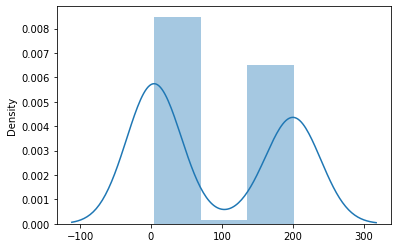

In [80]:
import seaborn as sns

sns.distplot(r)

/home/arjun/anaconda3/envs/rlenv/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

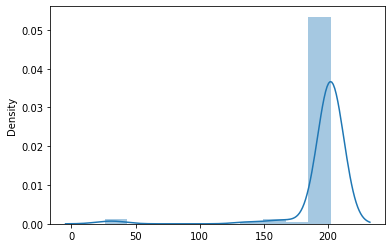

In [57]:
import seaborn as sns

sns.distplot(r)

/home/arjun/anaconda3/envs/rlenv/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

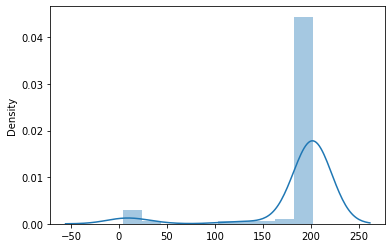

In [62]:

sns.distplot(r)

In [151]:
import sys
sys.path.append('../')

from pettingzoo.test import parallel_api_test
from src.environments import simple_pd_v0

env = dilemma_v0.env()
env = to_parallel(env)

parallel_api_test(env, num_cycles=1)


In [191]:
env = dilemma_v0.env('sd')

#env = ss.agent_indicator_v0(env)
rewards = []
env.reset()

In [227]:

obs, reward, done, info = env.last()
print(obs, reward, done, info)
rewards.append(reward)
act = model.predict(2)[0] if not done else None
env.step(1)
env.render()

1 1 False {}
Current state: Agent1: ANTI_SOCIAL , Agent2: ANTI_SOCIAL
{'player_0': 1, 'player_1': 1}



In [65]:
[0 for n in range(5)]

[0, 0, 0, 0, 0]

In [26]:
np.zeros((2,))

array([0., 0.])

In [72]:
import numpy as np

np.random.choice(2,  p=[0.5, 0.5])

1

In [35]:
np.log(1 - 0.1 - 0.9 - 0.1*0.9)

<ipython-input-35-b1cebb2cf1ce>:1: RuntimeWarning: invalid value encountered in log
  np.log(1 - 0.1 - 0.9 - 0.1*0.9)


nan

In [38]:
np.log(0.5)

-0.6931471805599453

In [40]:
1 - 0.1 - 0.9 + 0.1*0.9

0.09000000000000001

In [99]:
f = np.zeros(100)
np.insert(f, 2, 5)

array([0., 0., 5., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [191]:
np.random.choice([0,1], p=[0.5,0.5])

1

In [ ]:
# if self.prob:
        #     print('action2', action)
        #     if action == 0:
        #         action = np.random.choice([0,1], p=[0,1])
        #         if action == 1: print('flipped')

In [ ]:
https://www.researchgate.net/publication/281064730_Competitive_Centipede_Games_Zero-End_Payoffs_and_Payoff_Inequality_Deter_Reciprocal_Cooperation